<a href="https://colab.research.google.com/github/teethavattcp/teethavat_port_data/blob/main/01_Proj_Completejourney_clean%26exploredata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Direct Marketing dataset

# Import dataset

https://drive.google.com/file/d/1YdnAe0EJsSHOi6rSIJ5p0ef_sySo0MKb/view?usp=drive_link

In [ ]:
import os

In [ ]:
import time

In [ ]:
!gdown https://drive.google.com/uc?id=1YdnAe0EJsSHOi6rSIJ5p0ef_sySo0MKb

Downloading...
From (original): https://drive.google.com/uc?id=1YdnAe0EJsSHOi6rSIJ5p0ef_sySo0MKb
From (redirected): https://drive.google.com/uc?id=1YdnAe0EJsSHOi6rSIJ5p0ef_sySo0MKb&confirm=t&uuid=81dce69e-5dc4-490e-a0b0-6460a5afa2f1
To: /content/dunnhumby_The-Complete-Journey CSV.zip
100% 134M/134M [00:02<00:00, 46.3MB/s]


In [ ]:
if os.path.exists("/content/Dataset/dunnhumby_The-Complete-Journey CSV"):
  print('The files are already existed.')
else:
  !unzip "/content/dunnhumby_The-Complete-Journey CSV.zip" -d "Dataset"

Archive:  /content/dunnhumby_The-Complete-Journey CSV.zip
  inflating: Dataset/dunnhumby_The-Complete-Journey CSV/campaign_desc.csv  
  inflating: Dataset/dunnhumby_The-Complete-Journey CSV/campaign_table.csv  
  inflating: Dataset/dunnhumby_The-Complete-Journey CSV/causal_data.csv  
  inflating: Dataset/dunnhumby_The-Complete-Journey CSV/coupon.csv  
  inflating: Dataset/dunnhumby_The-Complete-Journey CSV/coupon_redempt.csv  
  inflating: Dataset/dunnhumby_The-Complete-Journey CSV/hh_demographic.csv  
  inflating: Dataset/dunnhumby_The-Complete-Journey CSV/product.csv  
  inflating: Dataset/dunnhumby_The-Complete-Journey CSV/transaction_data.csv  


# Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=a57fdb264b6c2d9f4fac940c545558510cef1d0e9384308fdf9337c013aeae9e
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
import pandasql

In [ ]:
import plotly.express as px

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

In [ ]:
import datetime as dt
from datetime import datetime

In [ ]:
from pathlib import Path

#Define fn for cleaning raw data

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
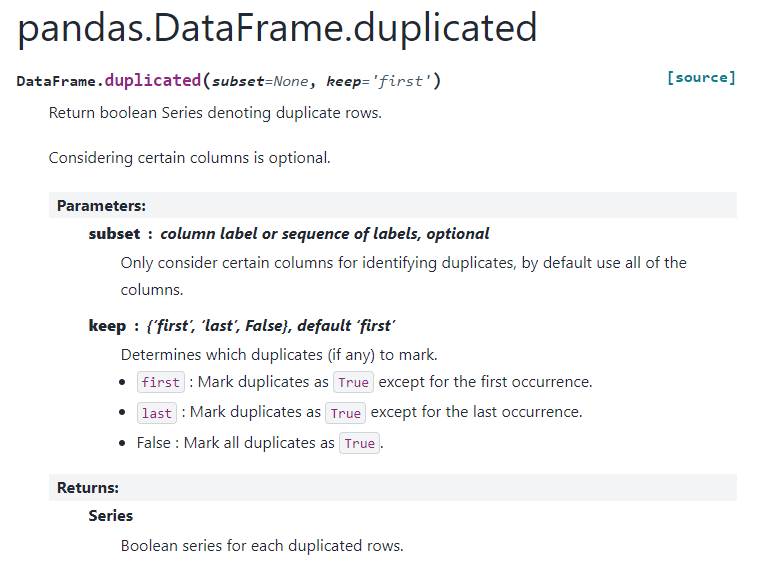

##count_total_duplicates(df)

In [ ]:
def count_total_duplicates(df):
    # Identifying duplicate rows (excluding the first occurrence)
    duplicates = df.duplicated(keep='first')

    # Summing the number of duplicate rows
    total_duplicates = duplicates.sum()

    return total_duplicates

In [ ]:
# Example usage
data = {
    'A': ['foo', 'bar', 'foo', 'baz', 'foo'],
    'B': ['one', 'one', 'two', 'two', 'one'],
    'C': [1, 2, 3, 4, 1],
    'D': [5, 6, 7, 8, 5]
}
df_test = pd.DataFrame(data)
df_test

A    B  C  D
0  foo  one  1  5
1  bar  one  2  6
2  foo  two  3  7
3  baz  two  4  8
4  foo  one  1  5

In [ ]:
total_duplicates = count_total_duplicates(df_test)
print(f'Total number of duplicate rows: {total_duplicates}')

Total number of duplicate rows: 1


##check_duplication_in_df(df)

In [ ]:
def check_duplication_in_df(df):
  total_duplicates = count_total_duplicates(df)
  if total_duplicates > 0:
    print(f"There are {total_duplicates} duplicate rows in the DataFrame.")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows were dropped.")
    print("New shape of dataframe after dropping duplicate rows:",df.shape)
  elif total_duplicates == 0:
    print("No duplicate rows found.")

## format_number(x)

In [ ]:
def format_number(x):
    if isinstance(x, float):
        if x.is_integer():
            return '{:.0f}'.format(x)  # Convert to integer if it's a whole number
        else:
            return '{:.2f}'.format(x)  # Keep as float with 2 decimal places
    return x

## explore_df(df_for_eda)

In [ ]:
def explore_df(df_for_eda):
  print("#Check shape")
  print(df_for_eda.shape,"\n")

  print("#Check duplication")
  check_duplication_in_df(df_for_eda)

  print("\n#Check missing value")
  if df_for_eda.isnull().sum().sum() == 0:
    print("No missing values found.")
  else:
    print("Missing values found:", df_for_eda.isnull().sum().sum())
    print("\nNumber of missing values:\n",df_for_eda.isnull().sum())
    print("\nPercentage of missing values:\n",df_for_eda.isnull().sum()/len(df_for_eda)*100)

  print("\n#Check data type")
  print(df_for_eda.info(),"\n")

  print("\n#Check unique value")
  print(df_for_eda.nunique(),"\n")

  print("#List of column name:\n",df_for_eda.columns.tolist())

## explore_classes_in_df(df,df_col_cat)

In [ ]:
def explore_classes_in_df(df,df_col_cat):
  for col in df_col_cat:
    print ("\n-------- %s --------" % col)
    print (df[col].value_counts())

In [ ]:
def explore_distribution_in_df(df,df_col_num):
  for col in df_col_num:
    #histogram plot
    #plt.figure(figsize=(2.5, 1.25))
    print ("\n-------- %s --------" % col)

    # Create the histogram plot to calculate the max count
    hist = sns.histplot(df[col])

    # Calculate the maximum count (frequency)
    max_count = hist.patches[0].get_height()  # Initialize with the first bar's height
    for bar in hist.patches:
        if bar.get_height() > max_count:
            max_count = bar.get_height()

    # Clear the current plot to redraw with y-axis limit
    plt.clf()

    # Create the histogram plot again
    sns.histplot(df[col])

    # Set the maximum limit for the y-axis
    plt.ylim(top=1.3 * max_count)

    # Display the plot
    plt.title(f'Histogram of {col}')
    plt.show()

    #box plot
    #plt.figure(figsize=(2.5, 1.25))
    plt.clf()
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

## deepexploredf(df,df_col_cat, df_col_num)

In [ ]:
import matplotlib.cm as cm

In [ ]:
def deepexploredf(df,df_col_cat, df_col_num):
  print("##Explore categorical data")
  if len(df_col_cat) == 0:
    print("No categorical column found.")
  else:
    explore_classes_in_df(df,df_col_cat)

  print("\n##Explore numerical data")
  if len(df_col_num) == 0:
    print("No numerical data found.")
  else:
    print("#Check statistical summary")
    print(df[df_col_num].describe().applymap(format_number).transpose().to_markdown())
    print("#Check correlation")
    #plt.figure(figsize = (2,1.25))
    #plt.rcParams.update({'font.size': 10})
    sns.heatmap(df[df_col_num].corr(), annot =True, cmap=cm.coolwarm_r, vmin=-1, vmax=1)
    plt.show()
    #sns.pairplot(df[df_col_num])
    #plt.show()

## export_to_csv(path_of_folder,file_name,df)

In [ ]:
def export_to_csv(path_of_folder,file_name,df):
  filepath = Path(str(path_of_folder)+str(file_name)+'.csv')
  filepath.parent.mkdir(parents=True, exist_ok=True)
  df.to_csv(filepath,mode = 'w', index=False)
  print(str(file_name)+'.csv has been exported successfully.')

In [ ]:
path_folder='/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set'+'/'

## explore_ranges_of_num_field(df,df_col_num)

In [ ]:
def explore_ranges_of_num_field(df,list_col_num):
  for col in df[list_col_num]:
    count_less_than_0_butsmallamount = len(df[(df[col] < 0) & (df[col] > -0.01)]) #-0.01 < value < 0
    count_less_than_0_butlargeamount = len(df[df[col] <= -0.01]) #-0.01 =< value
    count_equal_to_0 = len(df[df[col] == 0])
    count_greater_than_0_but_smallamount = len(df[(df[col] > 0)& (df[col] < 0.01)])
    count_greater_than_0_but_largeamount = len(df[(df[col] >= 0.01)])
    print(col,':')
    print(f'Count of values << 0: {count_less_than_0_butlargeamount}')
    print(f'Count of -0.01 < values < 0: {count_less_than_0_butsmallamount}')
    print(f'Count of values = 0: {count_equal_to_0}')
    print(f'Count of 0 < values < 0.01: {count_greater_than_0_but_smallamount}')
    print(f'Count of values >> 0: {count_greater_than_0_but_largeamount}')
    print('\n')

## add_status_column(df, left_col, right_col, status_col='status')

Add a status column to the DataFrame based on the comparison of two columns from left and right DataFrames.
```
 Parameters:
    - df (pd.DataFrame): The DataFrame resulting from an outer join.
    - left_col (str): The column name from the left DataFrame.
    - right_col (str): The column name from the right DataFrame.
    - status_col (str): The name of the new status column. Default is 'status'.

 Returns:
    - pd.DataFrame: The DataFrame with the added status column.

```


In [ ]:
def add_status_column(df, left_col, right_col, status_col='status'):
    conditions = [
        (df[left_col].notna()) & (df[right_col].notna()),  # Found value in both tables
        (df[left_col].notna()) & (df[right_col].isna()),   # Found value only in the left table
        (df[left_col].isna()) & (df[right_col].notna())    # Found value only in the right table
    ]

    choices = ['Found in both', 'Found only in left', 'Found only in right']

    df[status_col] = pd.Series(np.select(conditions, choices, default=None))
    return df

## dict_k2v_v2k(input_dict):

In [ ]:
def dict_k2v_v2k(input_dict):
  output_dict = {}

  for data_type, columns in input_dict.items():
    for column in columns:
        output_dict[column] = data_type

  return output_dict

## replace_valueindf(df,col_key_name,col_val_name,dict_kv_replace)

In [ ]:
def replace_valueindf(df,col_key_name,col_val_name,dict_kv_replace):
  if df[col_key_name] in dict_kv_replace.keys():
    df[col_val_name] = dict_kv_replace[df[col_key_name]]
  return df

# Prepare data

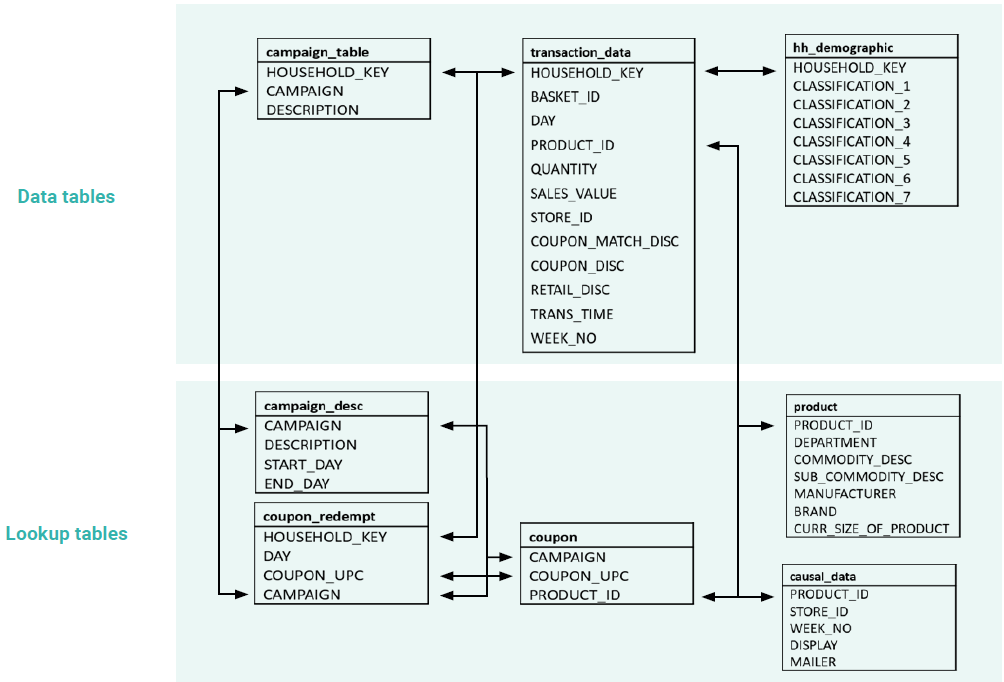

# 0.1) dim_date

## df_master_date

In [ ]:
df_master_date = pd.read_csv('/content/Dataset/dunnhumby_The-Complete-Journey CSV/transaction_data.csv', delimiter=",")
df_master_date = df_master_date[['DAY', 'WEEK_NO']].drop_duplicates().sort_values(by='DAY').reset_index()[['DAY', 'WEEK_NO']]
df_master_date = pandasql.sqldf('''SELECT
    DAY,
    WEEK_NO,
    ROW_NUMBER() OVER (PARTITION BY WEEK_NO ORDER BY DAY) AS week_count_by_day
FROM df_master_date
ORDER BY
    DAY''')
print(df_master_date.to_markdown())

|     |   DAY |   WEEK_NO |   week_count_by_day |
|----:|------:|----------:|--------------------:|
|   0 |     1 |         1 |                   1 |
|   1 |     2 |         1 |                   2 |
|   2 |     3 |         1 |                   3 |
|   3 |     4 |         1 |                   4 |
|   4 |     5 |         1 |                   5 |
|   5 |     6 |         2 |                   1 |
|   6 |     7 |         2 |                   2 |
|   7 |     8 |         2 |                   3 |
|   8 |     9 |         2 |                   4 |
|   9 |    10 |         2 |                   5 |
|  10 |    11 |         2 |                   6 |
|  11 |    12 |         2 |                   7 |
|  12 |    13 |         3 |                   1 |
|  13 |    14 |         3 |                   2 |
|  14 |    15 |         3 |                   3 |
|  15 |    16 |         3 |                   4 |
|  16 |    17 |         3 |                   5 |
|  17 |    18 |         3 |                   6 |


In [ ]:
print(pandasql.sqldf('''
SELECT
    DAY,
    WEEK_NO,
    week_count_by_day
FROM
    (SELECT
        DAY,
        WEEK_NO,
        week_count_by_day,
        ROW_NUMBER() OVER (PARTITION BY WEEK_NO ORDER BY week_count_by_day DESC) AS rn
    FROM
        df_master_date)
WHERE
    rn = 1
    ''').to_markdown())

|     |   DAY |   WEEK_NO |   week_count_by_day |
|----:|------:|----------:|--------------------:|
|   0 |     5 |         1 |                   5 |
|   1 |    12 |         2 |                   7 |
|   2 |    19 |         3 |                   7 |
|   3 |    26 |         4 |                   7 |
|   4 |    33 |         5 |                   7 |
|   5 |    40 |         6 |                   7 |
|   6 |    47 |         7 |                   7 |
|   7 |    54 |         8 |                   7 |
|   8 |    61 |         9 |                   7 |
|   9 |    68 |        10 |                   7 |
|  10 |    75 |        11 |                   7 |
|  11 |    82 |        12 |                   7 |
|  12 |    89 |        13 |                   7 |
|  13 |    96 |        14 |                   7 |
|  14 |   103 |        15 |                   7 |
|  15 |   110 |        16 |                   7 |
|  16 |   117 |        17 |                   7 |
|  17 |   124 |        18 |                   7 |


### Finding:
Each week contains 7 day

except WEEK_NO =1 that contains only 5 days

and WEEK_NO = 101 that contains only 6 days.

### Feature engineering

In [ ]:
# Define the month days as a dictionary
month_days_dict = {
    1: 31,
    2: 28,
    3: 31,
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 31,
    9: 30,
    10: 31,
    11: 30,
    12: 31
}

# Calculate cumulative days
cumulative_days = []
total_days = 0

for month_no in range(1, 13):
    total_days += month_days_dict[month_no]
    cumulative_days.append(total_days)

# Extend to a second year by adding 365 days to each
cumulative_days += [day + 365 for day in cumulative_days]

print(cumulative_days)

[31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365, 396, 424, 455, 485, 516, 546, 577, 608, 638, 669, 699, 730]


categorize(day) function:

Determine the Year:

- If day is less than or equal to 365, it belongs to year 1.
- Otherwise, it belongs to year 2.

Identify the Month:

- The function iterates over cumulative_days, which contains the end day of each month.
- It checks where the day falls within these cumulative days to determine the month_no.

Calculate DAY_NO:

- Once the month is identified, start_day is calculated as the last day of the previous month (cumulative_days[i - 1]) or 0 for the first month.
- DAY_NO is then determined by subtracting start_day from day, which gives the day number within the current month.


In [ ]:
def categorize(day):
    if day <= 365:
        year = 1
    else:
        year = 2

    month_no = 1
    day_no = day
    for i, end_day in enumerate(cumulative_days):
        if day <= end_day:
            month_no = i % 12 + 1
            start_day = cumulative_days[i - 1] if i > 0 else 0
            day_no = day - start_day
            break

    return year, month_no, day_no

In [ ]:
df_master_date['YEAR_NO'], df_master_date['MONTH_NO'], df_master_date['DAY_NO'] = zip(*df_master_date['DAY'].apply(categorize))
print(df_master_date.to_markdown())

|     |   DAY |   WEEK_NO |   week_count_by_day |   YEAR_NO |   MONTH_NO |   DAY_NO |
|----:|------:|----------:|--------------------:|----------:|-----------:|---------:|
|   0 |     1 |         1 |                   1 |         1 |          1 |        1 |
|   1 |     2 |         1 |                   2 |         1 |          1 |        2 |
|   2 |     3 |         1 |                   3 |         1 |          1 |        3 |
|   3 |     4 |         1 |                   4 |         1 |          1 |        4 |
|   4 |     5 |         1 |                   5 |         1 |          1 |        5 |
|   5 |     6 |         2 |                   1 |         1 |          1 |        6 |
|   6 |     7 |         2 |                   2 |         1 |          1 |        7 |
|   7 |     8 |         2 |                   3 |         1 |          1 |        8 |
|   8 |     9 |         2 |                   4 |         1 |          1 |        9 |
|   9 |    10 |         2 |                   5 |     

In [ ]:
df_master_date = df_master_date.rename(columns={
    'DAY': 'DAY_ID',
    'WEEK_NO': 'WEEK_ID'
})
df_master_date

DAY_ID  WEEK_ID  week_count_by_day  YEAR_NO  MONTH_NO  DAY_NO
0         1        1                  1        1         1       1
1         2        1                  2        1         1       2
2         3        1                  3        1         1       3
3         4        1                  4        1         1       4
4         5        1                  5        1         1       5
..      ...      ...                ...      ...       ...     ...
706     707      102                  2        2        12       8
707     708      102                  3        2        12       9
708     709      102                  4        2        12      10
709     710      102                  5        2        12      11
710     711      102                  6        2        12      12

[711 rows x 6 columns]

In [ ]:
df_master_date['YEAR_MOD'] = df_master_date['YEAR_NO'] + 2000
df_master_date

DAY_ID  WEEK_ID  week_count_by_day  YEAR_NO  MONTH_NO  DAY_NO  YEAR_MOD
0         1        1                  1        1         1       1      2001
1         2        1                  2        1         1       2      2001
2         3        1                  3        1         1       3      2001
3         4        1                  4        1         1       4      2001
4         5        1                  5        1         1       5      2001
..      ...      ...                ...      ...       ...     ...       ...
706     707      102                  2        2        12       8      2002
707     708      102                  3        2        12       9      2002
708     709      102                  4        2        12      10      2002
709     710      102                  5        2        12      11      2002
710     711      102                  6        2        12      12      2002

[711 rows x 7 columns]

- To resolve the issue of transforming date data from integer fields, the bug was identified in the YEAR_NO values, which were 1 and 2.
- By adding 2000 to these values, they become 2001 and 2002, respectively, resolving the transformation conflict.

Note:
- 2001: 365 days (not a leap year).
- 2002: 365 days (not a leap year).

In [ ]:
# Convert to date field
df_master_date['TRANS_date'] = pd.to_datetime(df_master_date[['YEAR_MOD', 'MONTH_NO', 'DAY_NO']].rename(columns={
    'YEAR_MOD': 'year',
    'MONTH_NO': 'month',
    'DAY_NO': 'day'
}))

In [ ]:
df_master_date

DAY_ID  WEEK_ID  week_count_by_day  YEAR_NO  MONTH_NO  DAY_NO  YEAR_MOD  \
0         1        1                  1        1         1       1      2001   
1         2        1                  2        1         1       2      2001   
2         3        1                  3        1         1       3      2001   
3         4        1                  4        1         1       4      2001   
4         5        1                  5        1         1       5      2001   
..      ...      ...                ...      ...       ...     ...       ...   
706     707      102                  2        2        12       8      2002   
707     708      102                  3        2        12       9      2002   
708     709      102                  4        2        12      10      2002   
709     710      102                  5        2        12      11      2002   
710     711      102                  6        2        12      12      2002   

    TRANS_date  
0   2001-01-01  
1   2001-01-02  
2   2001-01-03  
3   2001-01-04  
4   2001-01-05  
..         ...  
706 2002-12-08  
707 2002-12-09  
708 2002-12-10  
709 2002-12-11  
710 2002-12-12  

[711 rows x 8 columns]

In [ ]:
print(list(df_master_date.columns))

['DAY_ID', 'WEEK_ID', 'week_count_by_day', 'YEAR_NO', 'MONTH_NO', 'DAY_NO', 'YEAR_MOD', 'TRANS_date']


##Export Result

In [ ]:
export_to_csv(path_folder,'00_dim_date',df_master_date)

00_dim_date.csv has been exported successfully.


# 0.2) dim_time

## df_master_time

In [ ]:
# Create all combinations of TRANS_hh (0-23) and TRANS_mm (0-59)
TRANS_hh = list(range(24))
TRANS_mm = list(range(60))

# Generate DataFrame with all combinations
df_master_time = pd.DataFrame([(h, m) for h in TRANS_hh for m in TRANS_mm], columns=['TRANS_hh', 'TRANS_mm'])

df_master_time

TRANS_hh  TRANS_mm
0            0         0
1            0         1
2            0         2
3            0         3
4            0         4
...        ...       ...
1435        23        55
1436        23        56
1437        23        57
1438        23        58
1439        23        59

[1440 rows x 2 columns]

### Convert TRANS_hh and TRANS_mm to a time field

In [ ]:
# Convert TRANS_hh and TRANS_mm to a time field
# Use zfill to pad with zeros and ensure the correct format
df_master_time['TRANS_timestamp'] = pd.to_datetime(df_master_time['TRANS_hh'].astype(str).str.zfill(2) + df_master_time['TRANS_mm'].astype(str).str.zfill(2), format='%H%M').dt.time
df_master_time['TRANS_timestamp_rounding'] = pd.to_datetime(df_master_time['TRANS_hh'].astype(str).str.zfill(2) + '00', format='%H%M').dt.time
# Calculate TRANS_TIME as integer
df_master_time['TRANS_TIME'] = df_master_time['TRANS_hh'] * 100 + df_master_time['TRANS_mm']

df_master_time

TRANS_hh  TRANS_mm TRANS_timestamp TRANS_timestamp_rounding  TRANS_TIME
0            0         0        00:00:00                 00:00:00           0
1            0         1        00:01:00                 00:00:00           1
2            0         2        00:02:00                 00:00:00           2
3            0         3        00:03:00                 00:00:00           3
4            0         4        00:04:00                 00:00:00           4
...        ...       ...             ...                      ...         ...
1435        23        55        23:55:00                 23:00:00        2355
1436        23        56        23:56:00                 23:00:00        2356
1437        23        57        23:57:00                 23:00:00        2357
1438        23        58        23:58:00                 23:00:00        2358
1439        23        59        23:59:00                 23:00:00        2359

[1440 rows x 5 columns]

In [ ]:
df_master_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   TRANS_hh                  1440 non-null   int64 
 1   TRANS_mm                  1440 non-null   int64 
 2   TRANS_timestamp           1440 non-null   object
 3   TRANS_timestamp_rounding  1440 non-null   object
 4   TRANS_TIME                1440 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 56.4+ KB


### Feature Engineering

In [ ]:
# Function to categorize time of day
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 19:
        return 'Evening'
    else:
        return 'Night'
# Apply function to create a new column
df_master_time['TRANS_Time_of_day'] = df_master_time['TRANS_hh'].apply(categorize_time_of_day)

In [ ]:
df_master_time['TRANS_formatted_time'] = pd.to_datetime(
    df_master_time['TRANS_hh'].astype(str).str.zfill(2) +
    df_master_time['TRANS_mm'].astype(str).str.zfill(2), format='%H%M'
).dt.strftime('%-I:%M %p')

df_master_time['TRANS_formatted_time_ROUND'] = pd.to_datetime(
    df_master_time['TRANS_hh'].astype(str).str.zfill(2) +
    '00', format='%H%M'
).dt.strftime('%-I %p')
df_master_time

TRANS_hh  TRANS_mm TRANS_timestamp TRANS_timestamp_rounding  TRANS_TIME  \
0            0         0        00:00:00                 00:00:00           0   
1            0         1        00:01:00                 00:00:00           1   
2            0         2        00:02:00                 00:00:00           2   
3            0         3        00:03:00                 00:00:00           3   
4            0         4        00:04:00                 00:00:00           4   
...        ...       ...             ...                      ...         ...   
1435        23        55        23:55:00                 23:00:00        2355   
1436        23        56        23:56:00                 23:00:00        2356   
1437        23        57        23:57:00                 23:00:00        2357   
1438        23        58        23:58:00                 23:00:00        2358   
1439        23        59        23:59:00                 23:00:00        2359   

     TRANS_Time_of_day TRANS_formatted_time TRANS_formatted_time_ROUND  
0                Night             12:00 AM                      12 AM  
1                Night             12:01 AM                      12 AM  
2                Night             12:02 AM                      12 AM  
3                Night             12:03 AM                      12 AM  
4                Night             12:04 AM                      12 AM  
...                ...                  ...                        ...  
1435             Night             11:55 PM                      11 PM  
1436             Night             11:56 PM                      11 PM  
1437             Night             11:57 PM                      11 PM  
1438             Night             11:58 PM                      11 PM  
1439             Night             11:59 PM                      11 PM  

[1440 rows x 8 columns]

In [ ]:
print(list(df_master_time.columns))

['TRANS_hh', 'TRANS_mm', 'TRANS_timestamp', 'TRANS_timestamp_rounding', 'TRANS_TIME', 'TRANS_Time_of_day', 'TRANS_formatted_time', 'TRANS_formatted_time_ROUND']


In [ ]:
df_master_time = df_master_time[['TRANS_TIME','TRANS_hh', 'TRANS_mm', 'TRANS_timestamp', 'TRANS_formatted_time', 'TRANS_timestamp_rounding', 'TRANS_formatted_time_ROUND', 'TRANS_Time_of_day' ]]
df_master_time

TRANS_TIME  TRANS_hh  TRANS_mm TRANS_timestamp TRANS_formatted_time  \
0              0         0         0        00:00:00             12:00 AM   
1              1         0         1        00:01:00             12:01 AM   
2              2         0         2        00:02:00             12:02 AM   
3              3         0         3        00:03:00             12:03 AM   
4              4         0         4        00:04:00             12:04 AM   
...          ...       ...       ...             ...                  ...   
1435        2355        23        55        23:55:00             11:55 PM   
1436        2356        23        56        23:56:00             11:56 PM   
1437        2357        23        57        23:57:00             11:57 PM   
1438        2358        23        58        23:58:00             11:58 PM   
1439        2359        23        59        23:59:00             11:59 PM   

     TRANS_timestamp_rounding TRANS_formatted_time_ROUND TRANS_Time_of_day  
0                    00:00:00                      12 AM             Night  
1                    00:00:00                      12 AM             Night  
2                    00:00:00                      12 AM             Night  
3                    00:00:00                      12 AM             Night  
4                    00:00:00                      12 AM             Night  
...                       ...                        ...               ...  
1435                 23:00:00                      11 PM             Night  
1436                 23:00:00                      11 PM             Night  
1437                 23:00:00                      11 PM             Night  
1438                 23:00:00                      11 PM             Night  
1439                 23:00:00                      11 PM             Night  

[1440 rows x 8 columns]

## Export Result

In [ ]:
export_to_csv(path_folder,'00_dim_time',df_master_time)

00_dim_time.csv has been exported successfully.


#1) fact_transaction_data

## df_transaction_data

In [ ]:
df_transaction_data = pd.read_csv('/content/Dataset/dunnhumby_The-Complete-Journey CSV/transaction_data.csv', delimiter=",")
df_transaction_data

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0                 2375  26984851472    1     1004906         1         1.39   
1                 2375  26984851472    1     1033142         1         0.82   
2                 2375  26984851472    1     1036325         1         0.99   
3                 2375  26984851472    1     1082185         1         1.21   
4                 2375  26984851472    1     8160430         1         1.50   
...                ...          ...  ...         ...       ...          ...   
2595727           1598  42305362535  711       92130         1         0.99   
2595728           1598  42305362535  711      114102         1         8.89   
2595729           1598  42305362535  711      133449         1         6.99   
2595730           1598  42305362535  711     6923644         1         4.50   
2595731           1598  42305362535  711    14055192         1         6.99   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
0             364        -0.60        1631        1          0.0   
1             364         0.00        1631        1          0.0   
2             364        -0.30        1631        1          0.0   
3             364         0.00        1631        1          0.0   
4             364        -0.39        1631        1          0.0   
...           ...          ...         ...      ...          ...   
2595727      3228         0.00        1520      102          0.0   
2595728      3228         0.00        1520      102          0.0   
2595729      3228         0.00        1520      102          0.0   
2595730      3228        -0.49        1520      102          0.0   
2595731      3228         0.00        1520      102          0.0   

         COUPON_MATCH_DISC  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  
...                    ...  
2595727                0.0  
2595728                0.0  
2595729                0.0  
2595730                0.0  
2595731                0.0  

[2595732 rows x 12 columns]

## Explore data

In [ ]:
explore_df(df_transaction_data)

#Check shape
(2595732, 12) 

#Check duplication
No duplicate rows found.

#Check missing value
No missing values found.

#Check data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB
None 


#Check unique value
household_key          2500
BASKET_ID            276484
DAY                     711
PRODUCT_ID            92339
QUANTITY              11746
SALES_VALUE            5502
STORE_ID                582
RETAIL_DISC            24

In [ ]:
df_col_num = [ 'DAY', 'QUANTITY', 'SALES_VALUE', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO', 'COUPON_DISC', 'COUPON_MATCH_DISC']
df_col_cat = ['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'STORE_ID', 'TRANS_TIME', 'WEEK_NO']

##Explore categorical data

-------- household_key --------
household_key
718     6851
2459    6646
1609    6625
1111    6576
1453    6561
        ... 
1626       8
1504       7
1830       7
1897       5
494        4
Name: count, Length: 2500, dtype: int64

-------- BASKET_ID --------
BASKET_ID
30983766334    168
33347880492    161
33655186256    155
31242648741    153
28210676830    150
              ... 
40666600896      1
40666602038      1
40666602049      1
29124916509      1
32556059522      1
Name: count, Length: 276484, dtype: int64

-------- DAY --------
DAY
692    7493
691    7426
641    7066
246    6746
276    6715
       ... 
5       307
1       238
2       137
278       6
643       2
Name: count, Length: 711, dtype: int64

-------- PRODUCT_ID --------
PRODUCT_ID
1082185     29778
6534178     19820
1029743     14430
995242      12542
1106523      9826
            ...  
1200449         1
1319328         1
1346474         1
2390987         1
14055192        1
Name: count, Len

<ipython-input-21-9d781c8dea78>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df[df_col_num].describe().applymap(format_number).transpose().to_markdown())


|                   |   count |    mean |     std |     min |     25% |     50% |     75% |      max |
|:------------------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|---------:|
| DAY               | 2595732 |  388.76 |  189.72 |    1    |  229    |  390    |  553    |   711    |
| QUANTITY          | 2595732 |  100.43 | 1153.44 |    0    |    1    |    1    |    1    | 89638    |
| SALES_VALUE       | 2595732 |    3.1  |    4.18 |    0    |    1.29 |    2    |    3.49 |   840    |
| RETAIL_DISC       | 2595732 |   -0.54 |    1.25 | -180    |   -0.69 |   -0.01 |    0    |     3.99 |
| TRANS_TIME        | 2595732 | 1561.59 |  399.84 |    0    | 1308    | 1613    | 1843    |  2359    |
| WEEK_NO           | 2595732 |   56.22 |   27.1  |    1    |   33    |   56    |   80    |   102    |
| COUPON_DISC       | 2595732 |   -0.02 |    0.22 |  -55.93 |    0    |    0    |    0    |     0    |
| COUPON_MATCH_DISC | 2595732 |   -0    |    0.04 |   -7.7  |    0    |  

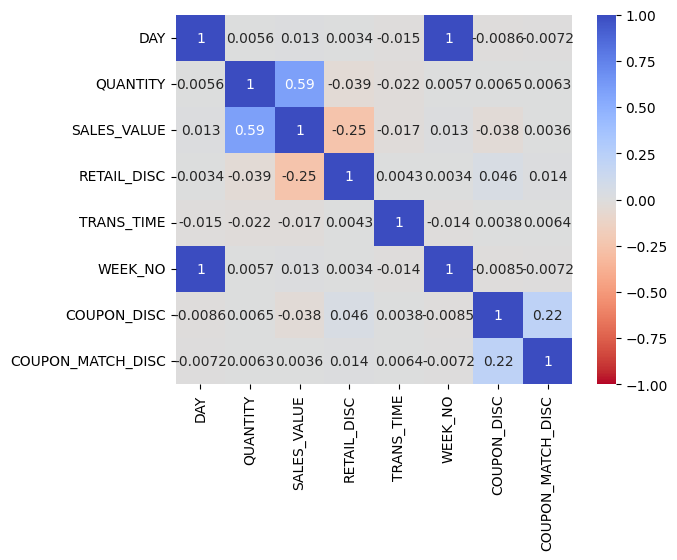

In [ ]:
deepexploredf(df_transaction_data,df_col_cat,df_col_num)

There is correlation between day to week_no & quantity to sales_value
(validate the nature of dataset)

In [ ]:
print(pandasql.sqldf('''SELECT household_key, COUNT(DISTINCT BASKET_ID),COUNT(DISTINCT DAY)
FROM df_transaction_data
GROUP BY household_key
ORDER BY COUNT(DISTINCT BASKET_ID),COUNT(DISTINCT DAY)''').to_markdown())

|      |   household_key |   COUNT(DISTINCT BASKET_ID) |   COUNT(DISTINCT DAY) |
|-----:|----------------:|----------------------------:|----------------------:|
|    0 |             494 |                           1 |                     1 |
|    1 |            1830 |                           1 |                     1 |
|    2 |            1897 |                           1 |                     1 |
|    3 |             359 |                           2 |                     2 |
|    4 |             379 |                           2 |                     2 |
|    5 |            1626 |                           2 |                     2 |
|    6 |            1727 |                           2 |                     2 |
|    7 |            2201 |                           2 |                     2 |
|    8 |            2265 |                           3 |                     2 |
|    9 |             186 |                           3 |                     3 |
|   10 |             522 |  

In [ ]:
pandasql.sqldf('''SELECT household_key,	BASKET_ID, WEEK_NO,	DAY, STORE_ID, TRANS_TIME,	COUNT(PRODUCT_ID)
FROM df_transaction_data
WHERE household_key	= "948"
GROUP BY household_key,	BASKET_ID, WEEK_NO,	DAY, STORE_ID, TRANS_TIME
ORDER BY household_key,	BASKET_ID, WEEK_NO,	DAY, STORE_ID, TRANS_TIME''')

household_key    BASKET_ID  WEEK_NO  DAY  STORE_ID  TRANS_TIME  \
0            948  27600980885        8   52       340        1418   
1            948  27601079281        8   52       446        1116   
2            948  27601557220        8   52       438        1653   
3            948  32505231021       54  372       340        1603   

   COUNT(PRODUCT_ID)  
0                 42  
1                  7  
2                 53  
3                  5

BASKET_ID is similar to id of reciept by time and date that each customer purchase in transaction.

### Explore abnormality about record that QUANTITY = 0

Another abnormality was found: why rows with quantity = 0 were recorded

SALES_VALUE = 0 may be interpretted that customer recieve free product from discount deduction

In [ ]:
#pandasql.sqldf('''SELECT COUNT(BASKET_ID) AS Row_Count
#FROM df_transaction_data
#WHERE QUANTITY =0
#''')

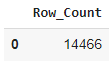

In [ ]:
#print(pandasql.sqldf('''SELECT *
#FROM df_transaction_data
#WHERE QUANTITY =0
#ORDER BY SALES_VALUE DESC
#''').head(100).to_markdown())

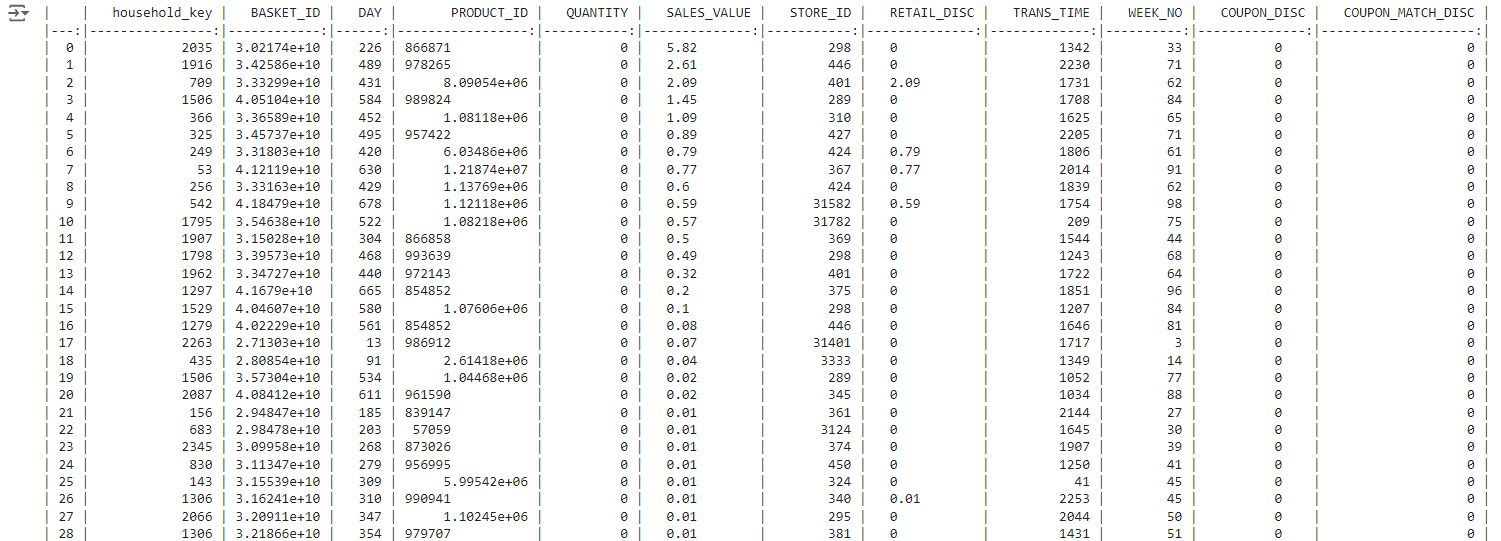

#### Finding:
- It was found that most transactions having QUANTITY = 0 have SALES_VALUE = 0.
- However, those transactions that have only SALES_VALUE >= 0.01 have unknown quantity how much should they bought the product. [may be from wrong record process]
- There are number of records that have unknown quantity and have SALES_VALUE >= 0.01 with small amount of row portion = 14466/2595732 = 0.557% of all record.
- Thus, cutting those record won't affect significantly to data analysis.

In [ ]:
14466/2595732

0.005572994438562995

##Explore categorical data

-------- household_key --------
household_key
718     6775
2459    6593
1609    6590
1111    6568
1453    6529
        ... 
522        7
1504       7
1830       7
1897       5
494        4
Name: count, Length: 2500, dtype: int64

-------- BASKET_ID --------
BASKET_ID
30983766334    168
33347880492    161
33655186256    153
31242648741    153
28210676830    150
              ... 
29602181627      1
28391620995      1
40596193164      1
33348063119      1
29141705109      1
Name: count, Length: 275889, dtype: int64

-------- DAY --------
DAY
692    7466
691    7397
641    7031
246    6721
276    6695
       ... 
5       306
1       236
2       135
278       6
643       2
Name: count, Length: 711, dtype: int64

-------- PRODUCT_ID --------
PRODUCT_ID
1082185     29757
6534178     19820
1029743     14405
995242      12528
1106523      9791
            ...  
9858788         1
10149085        1
12673028        1
6039807         1
14055192        1
Name: count, Len

<ipython-input-21-9d781c8dea78>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df[df_col_num].describe().applymap(format_number).transpose().to_markdown())


|                   |   count |    mean |     std |     min |     25% |     50% |     75% |      max |
|:------------------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|---------:|
| DAY               | 2581266 |  388.66 |  189.73 |    1    |  229    |  390    |  553    |   711    |
| QUANTITY          | 2581266 |  100.99 | 1156.64 |    1    |    1    |    1    |    1    | 89638    |
| SALES_VALUE       | 2581266 |    3.12 |    4.19 |    0    |    1.29 |    2    |    3.49 |   840    |
| RETAIL_DISC       | 2581266 |   -0.54 |    1.25 | -180    |   -0.69 |   -0.04 |    0    |     3.99 |
| TRANS_TIME        | 2581266 | 1561.61 |  399.72 |    0    | 1308    | 1613    | 1843    |  2359    |
| WEEK_NO           | 2581266 |   56.21 |   27.1  |    1    |   33    |   56    |   80    |   102    |
| COUPON_DISC       | 2581266 |   -0.01 |    0.17 |  -55.93 |    0    |    0    |    0    |     0    |
| COUPON_MATCH_DISC | 2581266 |   -0    |    0.04 |   -7.7  |    0    |  

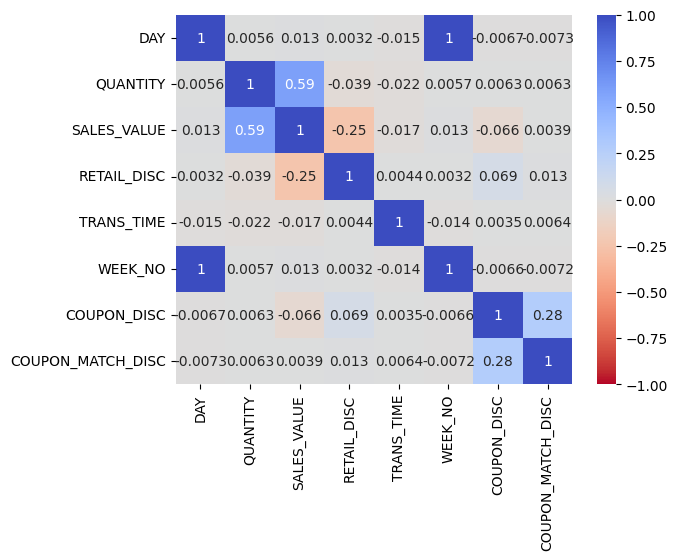

In [ ]:
df_transaction_data = df_transaction_data[(df_transaction_data['QUANTITY'] >=1)]
deepexploredf(df_transaction_data,df_col_cat,df_col_num)

### Explore abnormality about Discount attributes

RETAIL_DISC and COUPON_MATCH_DISC should have value ranging to be negative and max at 0 (nature of data written in document)

In [ ]:
# Calculate the limits for the x-axis range
min_val = df_transaction_data['RETAIL_DISC'].min()
max_val = df_transaction_data['RETAIL_DISC'].max()
x_range = [min_val * 1.01, max_val * 1.3]

# Plotting a histogram for the 'RETAIL_DISC' column
fig = px.histogram(df_transaction_data, x='RETAIL_DISC', nbins=1000, title='Histogram of RETAIL_DISC')
fig.update_layout(xaxis_title='RETAIL_DISC', yaxis_title='Frequency', xaxis=dict(range=x_range),width=800,height=600)
fig.show()

In [ ]:
# Calculate the limits for the x-axis range
min_val = df_transaction_data['COUPON_MATCH_DISC'].min()
max_val = df_transaction_data['COUPON_MATCH_DISC'].max()
x_range = [min_val * 1.01, max_val * 1.3]

# Plotting a histogram for the 'COUPON_MATCH_DISC' column
fig = px.histogram(df_transaction_data, x='COUPON_MATCH_DISC', nbins=1000, title='Histogram of COUPON_MATCH_DISC')
fig.update_layout(xaxis_title='COUPON_MATCH_DISC', yaxis_title='Frequency', xaxis=dict(range=x_range),width=800,height=600)
fig.show()

In [ ]:
# Count the number of rows meeting each condition
for col in ['RETAIL_DISC', 'COUPON_MATCH_DISC']:
  count_less_than_0_butsmallamount = len(df_transaction_data[(df_transaction_data[col] < 0) & (df_transaction_data[col] > -0.01)]) #-0.01 < value < 0
  count_less_than_0_butlargeamount = len(df_transaction_data[df_transaction_data[col] <= -0.01]) #-0.01 =< value
  count_equal_to_0 = len(df_transaction_data[df_transaction_data[col] == 0])
  count_greater_than_0_but_smallamount = len(df_transaction_data[(df_transaction_data[col] > 0)& (df_transaction_data[col] < 0.01)])
  count_greater_than_0_but_largeamount = len(df_transaction_data[(df_transaction_data[col] >= 0.01)])
  print(col,':')
  print(f'Count of values << 0: {count_less_than_0_butlargeamount}')
  print(f'Count of -0.01 < values < 0: {count_less_than_0_butsmallamount}')
  print(f'Count of values = 0: {count_equal_to_0}')
  print(f'Count of 0 < values < 0.01: {count_greater_than_0_but_smallamount}')
  print(f'Count of values >> 0: {count_greater_than_0_but_largeamount}')
  print('\n')

RETAIL_DISC :
Count of values << 0: 1303015
Count of -0.01 < values < 0: 2
Count of values = 0: 1278243
Count of 0 < values < 0.01: 4
Count of values >> 0: 2


COUPON_MATCH_DISC :
Count of values << 0: 17449
Count of -0.01 < values < 0: 0
Count of values = 0: 2563817
Count of 0 < values < 0.01: 0
Count of values >> 0: 0




#### Finding:
Awkward values happen only RETAIL_DISC so transform those awkward data to be negative and rounding those that have small value to be zero (as it not significantly count as using the impact of discount from retail).

In [ ]:
df_transaction_data[(df_transaction_data['RETAIL_DISC'] >= 0.01)]

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
1215551           1535  32478752229  370      999270         1         7.98   
1271754            623  32704598135  384     5995423         1         0.51   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
1215551       360         3.99        1852       54          0.0   
1271754       381         0.26        1950       56          0.0   

         COUPON_MATCH_DISC  
1215551                0.0  
1271754                0.0

In [ ]:
df_transaction_data[(df_transaction_data['RETAIL_DISC'] >0)].sort_values(by='RETAIL_DISC', ascending=False)

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
1215551           1535  32478752229  370      999270         1         7.98   
1271754            623  32704598135  384     5995423         1         0.51   
1292342             59  32759986795  389      835530         1         2.50   
1466571            290  33362690334  433     9575181         2         0.66   
1758882            367  34812010763  505    10456655         7         3.50   
1785852            367  35080936104  512    10456655         4         1.00   

         STORE_ID   RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
1215551       360  3.990000e+00        1852       54          0.0   
1271754       381  2.600000e-01        1950       56          0.0   
1292342       352  4.440892e-16        1903       56          0.0   
1466571       367  1.110223e-16        1723       63          0.0   
1758882       368  1.110223e-16        1413       73          0.0   
1785852       368  1.110223e-16        1537       74          0.0   

         COUPON_MATCH_DISC  
1215551                0.0  
1271754                0.0  
1292342                0.0  
1466571                0.0  
1758882                0.0  
1785852                0.0

In [ ]:
pandasql.sqldf('''SELECT *
FROM df_transaction_data
WHERE RETAIL_DISC >0
ORDER BY RETAIL_DISC DESC''').applymap(lambda x: '{:.6f}'.format(x) if isinstance(x, float) else x)

<ipython-input-62-0c3e71e416f0>:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY SALES_VALUE  \
0           1535  32478752229  370      999270         1    7.980000   
1            623  32704598135  384     5995423         1    0.510000   
2             59  32759986795  389      835530         1    2.500000   
3            290  33362690334  433     9575181         2    0.660000   
4            367  34812010763  505    10456655         7    3.500000   
5            367  35080936104  512    10456655         4    1.000000   

   STORE_ID RETAIL_DISC  TRANS_TIME  WEEK_NO COUPON_DISC COUPON_MATCH_DISC  
0       360    3.990000        1852       54    0.000000          0.000000  
1       381    0.260000        1950       56    0.000000          0.000000  
2       352    0.000000        1903       56    0.000000          0.000000  
3       367    0.000000        1723       63    0.000000          0.000000  
4       368    0.000000        1413       73    0.000000          0.000000  
5       368    0.000000        1537       74    0.000000          0.000000

#### Clean data for wrong record about discount

In [ ]:
# Replace values between 0 and 0.01 (exclusive) with 0
df_transaction_data.loc[(df_transaction_data['RETAIL_DISC'] > 0) & (df_transaction_data['RETAIL_DISC'] < 0.01), 'RETAIL_DISC'] = 0
df_transaction_data[(df_transaction_data['RETAIL_DISC'] >0)].sort_values(by='RETAIL_DISC', ascending=False)

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
1215551           1535  32478752229  370      999270         1         7.98   
1271754            623  32704598135  384     5995423         1         0.51   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
1215551       360         3.99        1852       54          0.0   
1271754       381         0.26        1950       56          0.0   

         COUPON_MATCH_DISC  
1215551                0.0  
1271754                0.0

In [ ]:
# Change the positive values to their negative counterparts
df_transaction_data.loc[df_transaction_data['RETAIL_DISC'] > 0, 'RETAIL_DISC'] *= -1
df_transaction_data[(df_transaction_data['RETAIL_DISC'] >0)].sort_values(by='RETAIL_DISC', ascending=False)

Empty DataFrame
Columns: [household_key, BASKET_ID, DAY, PRODUCT_ID, QUANTITY, SALES_VALUE, STORE_ID, RETAIL_DISC, TRANS_TIME, WEEK_NO, COUPON_DISC, COUPON_MATCH_DISC]
Index: []

All abnormal records for RETAIL_DISC have been cleaned.

#### Generate new field:

##### 'TOTAL_DISC'

In [ ]:
df_transaction_data['TOTAL_DISC'] = df_transaction_data['RETAIL_DISC'] + df_transaction_data['COUPON_MATCH_DISC']
df_transaction_data

<ipython-input-65-449eb24c8565>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0                 2375  26984851472    1     1004906         1         1.39   
1                 2375  26984851472    1     1033142         1         0.82   
2                 2375  26984851472    1     1036325         1         0.99   
3                 2375  26984851472    1     1082185         1         1.21   
4                 2375  26984851472    1     8160430         1         1.50   
...                ...          ...  ...         ...       ...          ...   
2595727           1598  42305362535  711       92130         1         0.99   
2595728           1598  42305362535  711      114102         1         8.89   
2595729           1598  42305362535  711      133449         1         6.99   
2595730           1598  42305362535  711     6923644         1         4.50   
2595731           1598  42305362535  711    14055192         1         6.99   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
0             364        -0.60        1631        1          0.0   
1             364         0.00        1631        1          0.0   
2             364        -0.30        1631        1          0.0   
3             364         0.00        1631        1          0.0   
4             364        -0.39        1631        1          0.0   
...           ...          ...         ...      ...          ...   
2595727      3228         0.00        1520      102          0.0   
2595728      3228         0.00        1520      102          0.0   
2595729      3228         0.00        1520      102          0.0   
2595730      3228        -0.49        1520      102          0.0   
2595731      3228         0.00        1520      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  
0                      0.0       -0.60  
1                      0.0        0.00  
2                      0.0       -0.30  
3                      0.0        0.00  
4                      0.0       -0.39  
...                    ...         ...  
2595727                0.0        0.00  
2595728                0.0        0.00  
2595729                0.0        0.00  
2595730                0.0       -0.49  
2595731                0.0        0.00  

[2581266 rows x 13 columns]

##### 'If_used_retail_loyalprog'

In [ ]:
df_transaction_data['If_used_retail_loyalprog'] = df_transaction_data['RETAIL_DISC'].apply(lambda x: 1 if x != 0 else 0)
df_transaction_data

<ipython-input-66-b869a3dd5f9a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0                 2375  26984851472    1     1004906         1         1.39   
1                 2375  26984851472    1     1033142         1         0.82   
2                 2375  26984851472    1     1036325         1         0.99   
3                 2375  26984851472    1     1082185         1         1.21   
4                 2375  26984851472    1     8160430         1         1.50   
...                ...          ...  ...         ...       ...          ...   
2595727           1598  42305362535  711       92130         1         0.99   
2595728           1598  42305362535  711      114102         1         8.89   
2595729           1598  42305362535  711      133449         1         6.99   
2595730           1598  42305362535  711     6923644         1         4.50   
2595731           1598  42305362535  711    14055192         1         6.99   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
0             364        -0.60        1631        1          0.0   
1             364         0.00        1631        1          0.0   
2             364        -0.30        1631        1          0.0   
3             364         0.00        1631        1          0.0   
4             364        -0.39        1631        1          0.0   
...           ...          ...         ...      ...          ...   
2595727      3228         0.00        1520      102          0.0   
2595728      3228         0.00        1520      102          0.0   
2595729      3228         0.00        1520      102          0.0   
2595730      3228        -0.49        1520      102          0.0   
2595731      3228         0.00        1520      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  
0                      0.0       -0.60                         1  
1                      0.0        0.00                         0  
2                      0.0       -0.30                         1  
3                      0.0        0.00                         0  
4                      0.0       -0.39                         1  
...                    ...         ...                       ...  
2595727                0.0        0.00                         0  
2595728                0.0        0.00                         0  
2595729                0.0        0.00                         0  
2595730                0.0       -0.49                         1  
2595731                0.0        0.00                         0  

[2581266 rows x 14 columns]

##### 'If_used_manu_coupon'

In [ ]:
df_transaction_data['If_used_manu_coupon'] = df_transaction_data['COUPON_MATCH_DISC'].apply(lambda x: 1 if x != 0 else 0)
df_transaction_data[(df_transaction_data['If_used_manu_coupon'] ==1)].sort_values(by='COUPON_MATCH_DISC', ascending=False)


<ipython-input-67-b531e92abad8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
1248786           2168  32602687628  378     1094371         1         0.98   
648564            1529  30407979614  240      955074         2         0.89   
9929               679  27191270548   19     7410362         1         1.98   
847919             393  31145150007  280      932702         4         3.94   
466456            1098  29354241642  180     8019636         1         0.40   
...                ...          ...  ...         ...       ...          ...   
1459987            909  33330093592  431      936508        11         8.80   
1736939           1110  34642102865  500      960858        10         5.00   
1465122            909  33348243956  432      936508        12         9.60   
1852265           1110  35666306112  529     1123720         8         2.20   
1108086           1754  32065046589  344     1020924        44        14.30   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
1248786       306         0.00        2056       55        -0.99   
648564        333         0.00          17       35        -1.99   
9929          447         0.00        1122        3        -0.99   
847919        427        -1.20         140       41        -1.98   
466456        343        -0.05        2139       26        -0.35   
...           ...          ...         ...      ...          ...   
1459987       321        -2.64        1729       62        -6.05   
1736939       341        -9.90        2253       72        -5.00   
1465122       321        -2.88        1935       62        -6.60   
1852265       379         0.00        1747       76        -5.80   
1108086       384         0.00        1503       50       -14.30   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
1248786              -0.01       -0.01                         0   
648564               -0.01       -0.01                         0   
9929                 -0.01       -0.01                         0   
847919               -0.02       -1.22                         1   
466456               -0.08       -0.13                         1   
...                    ...         ...                       ...   
1459987              -4.95       -7.59                         1   
1736939              -5.00      -14.90                         1   
1465122              -5.40       -8.28                         1   
1852265              -5.80       -5.80                         0   
1108086              -7.70       -7.70                         0   

         If_used_manu_coupon  
1248786                    1  
648564                     1  
9929                       1  
847919                     1  
466456                     1  
...                      ...  
1459987                    1  
1736939                    1  
1465122                    1  
1852265                    1  
1108086                    1  

[17449 rows x 15 columns]

### Check for COUPON_DISC

In [ ]:
for col in ['COUPON_DISC']:
  count_less_than_0_butsmallamount = len(df_transaction_data[(df_transaction_data[col] < 0) & (df_transaction_data[col] > -0.01)]) #-0.01 < value < 0
  count_less_than_0_butlargeamount = len(df_transaction_data[df_transaction_data[col] <= -0.01]) #-0.01 =< value
  count_equal_to_0 = len(df_transaction_data[df_transaction_data[col] == 0])
  count_greater_than_0_but_smallamount = len(df_transaction_data[(df_transaction_data[col] > 0)& (df_transaction_data[col] < 0.01)])
  count_greater_than_0_but_largeamount = len(df_transaction_data[(df_transaction_data[col] >= 0.01)])
  print(col,':')
  print(f'Count of values << 0: {count_less_than_0_butlargeamount}')
  print(f'Count of -0.01 < values < 0: {count_less_than_0_butsmallamount}')
  print(f'Count of values = 0: {count_equal_to_0}')
  print(f'Count of 0 < values < 0.01: {count_greater_than_0_but_smallamount}')
  print(f'Count of values >> 0: {count_greater_than_0_but_largeamount}')
  print('\n')

COUPON_DISC :
Count of values << 0: 31467
Count of -0.01 < values < 0: 0
Count of values = 0: 2549799
Count of 0 < values < 0.01: 0
Count of values >> 0: 0




No abnormality values for COUPON_DISC were found.

### Explore abnormality about record that SALES_VALUE = 0

In [ ]:
for col in ['SALES_VALUE']:
  count_less_than_0_butsmallamount = len(df_transaction_data[(df_transaction_data[col] < 0) & (df_transaction_data[col] > -0.01)]) #-0.01 < value < 0
  count_less_than_0_butlargeamount = len(df_transaction_data[df_transaction_data[col] <= -0.01]) #-0.01 =< value
  count_equal_to_0 = len(df_transaction_data[df_transaction_data[col] == 0])
  count_greater_than_0_but_smallamount = len(df_transaction_data[(df_transaction_data[col] > 0)& (df_transaction_data[col] < 0.01)])
  count_greater_than_0_but_largeamount = len(df_transaction_data[(df_transaction_data[col] >= 0.01)])
  print(col,':')
  print(f'Count of values << 0: {count_less_than_0_butlargeamount}')
  print(f'Count of -0.01 < values < 0: {count_less_than_0_butsmallamount}')
  print(f'Count of values = 0: {count_equal_to_0}')
  print(f'Count of 0 < values < 0.01: {count_greater_than_0_but_smallamount}')
  print(f'Count of values >> 0: {count_greater_than_0_but_largeamount}')
  print('\n')

SALES_VALUE :
Count of values << 0: 0
Count of -0.01 < values < 0: 0
Count of values = 0: 4451
Count of 0 < values < 0.01: 0
Count of values >> 0: 2576815




####Finding:
The record that SALES_VALUE = 0 seems to be suspicious.

In [ ]:
df_transaction_data[(df_transaction_data['SALES_VALUE'] < 0.01)].sort_values(by='SALES_VALUE', ascending=False)

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
766               2110  27009082349    3      837963         1          0.0   
1697330            339  34267676865  490     1010165         1          0.0   
1701675           1762  34321571366  492     1118281         1          0.0   
1700711           1506  34292089132  491     1118281         1          0.0   
1699403           2075  34291855603  491     1102185         1          0.0   
...                ...          ...  ...         ...       ...          ...   
749726             892  30822567225  255      990256         1          0.0   
750240            2107  30822636732  256     1061080         1          0.0   
751084            1003  30822711691  256     1021715         1          0.0   
751276            1463  30822740847  256      913960         1          0.0   
2593945            218  42289735899  711      928584         1          0.0   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
766           375         0.00        1547        1          0.0   
1697330       288        -2.59        2338       71          0.0   
1701675       362        -1.99        1809       71          0.0   
1700711       313        -1.99        2055       71          0.0   
1699403       361        -1.99        1015       71          0.0   
...           ...          ...         ...      ...          ...   
749726        346        -4.69        2029       37          0.0   
750240        317        -3.99        1549       37          0.0   
751084        295        -2.99        1650       37          0.0   
751276        372         0.00        2006       37          0.0   
2593945       321        -5.99        1059      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
766                    0.0        0.00                         0   
1697330                0.0       -2.59                         1   
1701675                0.0       -1.99                         1   
1700711                0.0       -1.99                         1   
1699403                0.0       -1.99                         1   
...                    ...         ...                       ...   
749726                 0.0       -4.69                         1   
750240                 0.0       -3.99                         1   
751084                 0.0       -2.99                         1   
751276                 0.0        0.00                         0   
2593945                0.0       -5.99                         1   

         If_used_manu_coupon  
766                        0  
1697330                    0  
1701675                    0  
1700711                    0  
1699403                    0  
...                      ...  
749726                     0  
750240                     0  
751084                     0  
751276                     0  
2593945                    0  

[4451 rows x 15 columns]

In [ ]:
df_transaction_data[(df_transaction_data['SALES_VALUE'] ==0) &
 ((df_transaction_data['RETAIL_DISC'] != 0) |
  (df_transaction_data['COUPON_MATCH_DISC'] != 0))].sort_values(by='SALES_VALUE', ascending=False)

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
996                568  27021090189    4      951412         1          0.0   
1778854            986  35000813609  511      893867         1          0.0   
1773323            125  34873108221  509     7442180         1          0.0   
1774389           2266  34873213764  509     1014948         1          0.0   
1774395           1367  34873213867  509     6463900         1          0.0   
...                ...          ...  ...         ...       ...          ...   
903131            2439  31343775235  293      830935         1          0.0   
903654            2162  31343822236  293     1095130         1          0.0   
904706            1438  31343930715  293      969866         1          0.0   
905046            1234  31343986495  293     9832160         1          0.0   
2593945            218  42289735899  711      928584         1          0.0   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
996           446        -1.48          35        1          0.0   
1778854       401        -3.59          22       74          0.0   
1773323       323        -4.79        2110       73          0.0   
1774389       384        -3.99        1858       73          0.0   
1774395       384        -4.79        1920       73          0.0   
...           ...          ...         ...      ...          ...   
903131        442        -2.99        1003       43          0.0   
903654        432        -1.99        1810       43          0.0   
904706        300        -2.93        1531       43          0.0   
905046        293        -2.99        1726       43          0.0   
2593945       321        -5.99        1059      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
996                    0.0       -1.48                         1   
1778854                0.0       -3.59                         1   
1773323                0.0       -4.79                         1   
1774389                0.0       -3.99                         1   
1774395                0.0       -4.79                         1   
...                    ...         ...                       ...   
903131                 0.0       -2.99                         1   
903654                 0.0       -1.99                         1   
904706                 0.0       -2.93                         1   
905046                 0.0       -2.99                         1   
2593945                0.0       -5.99                         1   

         If_used_manu_coupon  
996                        0  
1778854                    0  
1773323                    0  
1774389                    0  
1774395                    0  
...                      ...  
903131                     0  
903654                     0  
904706                     0  
905046                     0  
2593945                    0  

[3749 rows x 15 columns]

In [ ]:
df_transaction_data[(df_transaction_data['SALES_VALUE'] ==0 ) &
 ((df_transaction_data['RETAIL_DISC'] == 0) &
  (df_transaction_data['COUPON_MATCH_DISC'] == 0))].sort_values(by='SALES_VALUE', ascending=False)

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
766               2110  27009082349    3      837963         1          0.0   
1174076            842  32259423015  360     1079228         1          0.0   
1159072           1484  32204632167  356      926664         1          0.0   
1160603            371  32231026424  357      897752         1          0.0   
1161070           2317  32231103126  357      885430         1          0.0   
...                ...          ...  ...         ...       ...          ...   
449505            1188  29330026271  176      876660         1          0.0   
451258             889  29339506145  177     1053460         1          0.0   
457998            2317  29353210117  179      885430         1          0.0   
461730            2233  29353736521  180      991268         1          0.0   
2584682           1247  42263411316  709     5574954         1          0.0   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
766           375          0.0        1547        1          0.0   
1174076       318          0.0        1808       52          0.0   
1159072       359          0.0        1928       52          0.0   
1160603       427          0.0        1510       52          0.0   
1161070       372          0.0        1732       52          0.0   
...           ...          ...         ...      ...          ...   
449505        341          0.0        1705       26          0.0   
451258        388          0.0        1239       26          0.0   
457998        372          0.0         633       26          0.0   
461730        427          0.0        1346       26          0.0   
2584682       374          0.0        1505      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
766                    0.0         0.0                         0   
1174076                0.0         0.0                         0   
1159072                0.0         0.0                         0   
1160603                0.0         0.0                         0   
1161070                0.0         0.0                         0   
...                    ...         ...                       ...   
449505                 0.0         0.0                         0   
451258                 0.0         0.0                         0   
457998                 0.0         0.0                         0   
461730                 0.0         0.0                         0   
2584682                0.0         0.0                         0   

         If_used_manu_coupon  
766                        0  
1174076                    0  
1159072                    0  
1160603                    0  
1161070                    0  
...                      ...  
449505                     0  
451258                     0  
457998                     0  
461730                     0  
2584682                    0  

[702 rows x 15 columns]

#####Interpretation:
From query, it was found that:
- Those record having SALES_VALUE = 0 & (RETAIL_DISC != 0 | COUPON_MATCH_DISC !=0) can be interpretted that **the item was discounted entirely (Full Discount Applied)**, effectively making its sales value zero.
- Those record having SALES_VALUE = 0 & (RETAIL_DISC = 0 & COUPON_MATCH_DISC =0) can be interpretted that
  1.   **Data Entry Error:** There could be a mistake in the data entry where the sales value is set to zero incorrectly, but no corresponding discount is recorded.
  2.   **Promotional Giveaway without Discount:** The item was given away for free as part of a promotion, but it wasn't recorded as a discount. For example, a free sample or a promotional gift.

A "Promotional Giveaway without Discount" refers to scenarios where an item is given to customers for free as part of a marketing or promotional strategy, but this giveaway is not explicitly recorded as a discount in the sales records.

Types of Promotional Giveaways:

- Free Samples: Small portions of a product given away to let potential customers try it without cost.
- Buy One Get One Free (BOGO): Offers where a customer buys one item and receives another identical item for free.
- Gift with Purchase: Customers receive a free item when they make a purchase over a certain amount or buy a specific product.
- Contests and Sweepstakes: Free items given away as prizes in contests or sweepstakes.

Insights Application:
- Marketing Analysis: Evaluating the effectiveness of promotional campaigns.

#####'If_used_giveaway_promo'

In [ ]:
df_transaction_data['If_used_giveaway_promo'] = np.where((df_transaction_data['SALES_VALUE'] == 0) & \
            (df_transaction_data['RETAIL_DISC'] == 0) & \
            (df_transaction_data['COUPON_MATCH_DISC'] == 0), 1, 0)
df_transaction_data

<ipython-input-73-53b7f6797322>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0                 2375  26984851472    1     1004906         1         1.39   
1                 2375  26984851472    1     1033142         1         0.82   
2                 2375  26984851472    1     1036325         1         0.99   
3                 2375  26984851472    1     1082185         1         1.21   
4                 2375  26984851472    1     8160430         1         1.50   
...                ...          ...  ...         ...       ...          ...   
2595727           1598  42305362535  711       92130         1         0.99   
2595728           1598  42305362535  711      114102         1         8.89   
2595729           1598  42305362535  711      133449         1         6.99   
2595730           1598  42305362535  711     6923644         1         4.50   
2595731           1598  42305362535  711    14055192         1         6.99   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
0             364        -0.60        1631        1          0.0   
1             364         0.00        1631        1          0.0   
2             364        -0.30        1631        1          0.0   
3             364         0.00        1631        1          0.0   
4             364        -0.39        1631        1          0.0   
...           ...          ...         ...      ...          ...   
2595727      3228         0.00        1520      102          0.0   
2595728      3228         0.00        1520      102          0.0   
2595729      3228         0.00        1520      102          0.0   
2595730      3228        -0.49        1520      102          0.0   
2595731      3228         0.00        1520      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
0                      0.0       -0.60                         1   
1                      0.0        0.00                         0   
2                      0.0       -0.30                         1   
3                      0.0        0.00                         0   
4                      0.0       -0.39                         1   
...                    ...         ...                       ...   
2595727                0.0        0.00                         0   
2595728                0.0        0.00                         0   
2595729                0.0        0.00                         0   
2595730                0.0       -0.49                         1   
2595731                0.0        0.00                         0   

         If_used_manu_coupon  If_used_giveaway_promo  
0                          0                       0  
1                          0                       0  
2                          0                       0  
3                          0                       0  
4                          0                       0  
...                      ...                     ...  
2595727                    0                       0  
2595728                    0                       0  
2595729                    0                       0  
2595730                    0                       0  
2595731                    0                       0  

[2581266 rows x 16 columns]

In [ ]:
df_transaction_data[(df_transaction_data['SALES_VALUE'] ==0 ) &
 ((df_transaction_data['RETAIL_DISC'] == 0) &
  (df_transaction_data['COUPON_MATCH_DISC'] == 0))].sort_values(by='SALES_VALUE', ascending=False)

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
766               2110  27009082349    3      837963         1          0.0   
1174076            842  32259423015  360     1079228         1          0.0   
1159072           1484  32204632167  356      926664         1          0.0   
1160603            371  32231026424  357      897752         1          0.0   
1161070           2317  32231103126  357      885430         1          0.0   
...                ...          ...  ...         ...       ...          ...   
449505            1188  29330026271  176      876660         1          0.0   
451258             889  29339506145  177     1053460         1          0.0   
457998            2317  29353210117  179      885430         1          0.0   
461730            2233  29353736521  180      991268         1          0.0   
2584682           1247  42263411316  709     5574954         1          0.0   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
766           375          0.0        1547        1          0.0   
1174076       318          0.0        1808       52          0.0   
1159072       359          0.0        1928       52          0.0   
1160603       427          0.0        1510       52          0.0   
1161070       372          0.0        1732       52          0.0   
...           ...          ...         ...      ...          ...   
449505        341          0.0        1705       26          0.0   
451258        388          0.0        1239       26          0.0   
457998        372          0.0         633       26          0.0   
461730        427          0.0        1346       26          0.0   
2584682       374          0.0        1505      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
766                    0.0         0.0                         0   
1174076                0.0         0.0                         0   
1159072                0.0         0.0                         0   
1160603                0.0         0.0                         0   
1161070                0.0         0.0                         0   
...                    ...         ...                       ...   
449505                 0.0         0.0                         0   
451258                 0.0         0.0                         0   
457998                 0.0         0.0                         0   
461730                 0.0         0.0                         0   
2584682                0.0         0.0                         0   

         If_used_manu_coupon  If_used_giveaway_promo  
766                        0                       1  
1174076                    0                       1  
1159072                    0                       1  
1160603                    0                       1  
1161070                    0                       1  
...                      ...                     ...  
449505                     0                       1  
451258                     0                       1  
457998                     0                       1  
461730                     0                       1  
2584682                    0                       1  

[702 rows x 16 columns]

###Price [per unit] by product

####'Actual_card_price'

In [ ]:
df_transaction_data["Actual_card_price"]=(df_transaction_data["SALES_VALUE"]-df_transaction_data["RETAIL_DISC"]-df_transaction_data["COUPON_MATCH_DISC"])/df_transaction_data["QUANTITY"]
df_transaction_data["Actual_card_price"].describe().transpose()

<ipython-input-75-4047eb24183e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    2.581266e+06
mean     2.847519e+00
std      3.017907e+00
min      0.000000e+00
25%      1.290000e+00
50%      2.190000e+00
75%      3.490000e+00
max      5.499900e+02
Name: Actual_card_price, dtype: float64

##### Explore price from sample product_id

In [ ]:
fig = px.line(df_transaction_data[(df_transaction_data['PRODUCT_ID'] == 866871)], x='DAY', y='Actual_card_price', title='Card Price Over Time of product_id 866871', markers=True)
fig.show()

###### Finding:
Price of each product varied (dynamically) by time (not static).
Then, price analysis such as price elasticity, Time series behavior clustering will be performed in the later parts

#####Create master table for actual card price

######df_master_actual_card_price

In [ ]:
df_master_actual_card_price = df_transaction_data.groupby(['PRODUCT_ID']).agg(
    Actual_card_price_avg=('Actual_card_price', 'mean'),
    Actual_card_price_count=('Actual_card_price', 'count'),
    Actual_card_price_std=('Actual_card_price', 'std')
).sort_values(by='PRODUCT_ID').reset_index()
df_master_actual_card_price

PRODUCT_ID  Actual_card_price_avg  Actual_card_price_count  \
0           25671                   3.49                        3   
1           26081                   0.99                        1   
2           26093                   1.59                        1   
3           26190                   1.54                        1   
4           26355                   1.25                        1   
...           ...                    ...                      ...   
92010    18293142                   7.19                        1   
92011    18293439                   7.19                        1   
92012    18293696                   4.79                        1   
92013    18294080                   7.19                        1   
92014    18316298                   4.39                        1   

       Actual_card_price_std  
0                        0.0  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
...                      ...  
92010                    NaN  
92011                    NaN  
92012                    NaN  
92013                    NaN  
92014                    NaN  

[92015 rows x 4 columns]

In [ ]:
df_master_actual_card_price['Actual_card_price_std'] = df_master_actual_card_price['Actual_card_price_std'].fillna(0)
df_master_actual_card_price

PRODUCT_ID  Actual_card_price_avg  Actual_card_price_count  \
0           25671                   3.49                        3   
1           26081                   0.99                        1   
2           26093                   1.59                        1   
3           26190                   1.54                        1   
4           26355                   1.25                        1   
...           ...                    ...                      ...   
92010    18293142                   7.19                        1   
92011    18293439                   7.19                        1   
92012    18293696                   4.79                        1   
92013    18294080                   7.19                        1   
92014    18316298                   4.39                        1   

       Actual_card_price_std  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  
...                      ...  
92010                    0.0  
92011                    0.0  
92012                    0.0  
92013                    0.0  
92014                    0.0  

[92015 rows x 4 columns]

In [ ]:
explore_ranges_of_num_field(df_master_actual_card_price,['Actual_card_price_avg','Actual_card_price_std'])

Actual_card_price_avg :
Count of values << 0: 0
Count of -0.01 < values < 0: 0
Count of values = 0: 21
Count of 0 < values < 0.01: 27
Count of values >> 0: 91967


Actual_card_price_std :
Count of values << 0: 0
Count of -0.01 < values < 0: 0
Count of values = 0: 59186
Count of 0 < values < 0.01: 4762
Count of values >> 0: 28067




######Finding1:
Record that have SD=0 [after fill na for calculation error] consisted of 2 types of data:

1. Have only 1 record of Actual price.
2. Have many records but all actual price are the same.

In [ ]:
df_master_actual_card_price[(df_master_actual_card_price['Actual_card_price_count'] == 1)&(df_master_actual_card_price['Actual_card_price_std'] == 0)]

PRODUCT_ID  Actual_card_price_avg  Actual_card_price_count  \
1           26081                   0.99                        1   
2           26093                   1.59                        1   
3           26190                   1.54                        1   
4           26355                   1.25                        1   
5           26426                   2.29                        1   
...           ...                    ...                      ...   
92010    18293142                   7.19                        1   
92011    18293439                   7.19                        1   
92012    18293696                   4.79                        1   
92013    18294080                   7.19                        1   
92014    18316298                   4.39                        1   

       Actual_card_price_std  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  
5                        0.0  
...                      ...  
92010                    0.0  
92011                    0.0  
92012                    0.0  
92013                    0.0  
92014                    0.0  

[33542 rows x 4 columns]

In [ ]:
df_master_actual_card_price[(df_master_actual_card_price['Actual_card_price_count'] > 1)&(df_master_actual_card_price['Actual_card_price_std'] == 0)]

PRODUCT_ID  Actual_card_price_avg  Actual_card_price_count  \
0           25671                   3.49                        3   
9           26691                   3.25                        2   
13          27021                   1.80                        2   
17          27159                   0.27                        2   
20          27334                   4.29                        2   
...           ...                    ...                      ...   
91990    18205871                   6.79                        2   
91992    18243471                   8.99                        3   
91993    18243476                   8.99                        5   
91994    18243598                   5.88                        3   
91999    18244453                   1.29                        6   

       Actual_card_price_std  
0                        0.0  
9                        0.0  
13                       0.0  
17                       0.0  
20                       0.0  
...                      ...  
91990                    0.0  
91992                    0.0  
91993                    0.0  
91994                    0.0  
91999                    0.0  

[25644 rows x 4 columns]

In [ ]:
df_transaction_data[df_transaction_data['PRODUCT_ID']==18244453]

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
2571985           1159  42211936849  705    18244453         1         1.29   
2579322           2267  42237985898  707    18244453         1         1.29   
2582938           1159  42250921020  708    18244453         1         1.29   
2585981             27  42263612361  709    18244453         1         1.29   
2589100            636  42276431279  710    18244453         1         1.29   
2590143           1715  42276643731  710    18244453         1         1.29   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
2571985       359          0.0        1704      101          0.0   
2579322       321          0.0        1142      102          0.0   
2582938       298          0.0        1322      102          0.0   
2585981       359          0.0        2100      102          0.0   
2589100       300          0.0        1903      102          0.0   
2590143       298          0.0        2240      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
2571985                0.0         0.0                         0   
2579322                0.0         0.0                         0   
2582938                0.0         0.0                         0   
2585981                0.0         0.0                         0   
2589100                0.0         0.0                         0   
2590143                0.0         0.0                         0   

         If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  
2571985                    0                       0               1.29  
2579322                    0                       0               1.29  
2582938                    0                       0               1.29  
2585981                    0                       0               1.29  
2589100                    0                       0               1.29  
2590143                    0                       0               1.29

In [ ]:
df_master_actual_card_price[df_master_actual_card_price['Actual_card_price_avg']==0]

PRODUCT_ID  Actual_card_price_avg  Actual_card_price_count  \
5430       744587                    0.0                       19   
15021      900351                    0.0                        2   
15326      903055                    0.0                        1   
18838      933465                    0.0                        3   
21075      953087                    0.0                        1   
21447      956360                    0.0                        1   
23354      973506                    0.0                        1   
24134      981259                    0.0                        2   
26499     1002234                    0.0                        5   
27769     1013587                    0.0                       42   
30594     1038617                    0.0                        1   
32246     1053460                    0.0                      323   
35252     1080281                    0.0                        1   
37975     1105074                    0.0                       11   
41705     1138917                    0.0                        2   
44797     1416192                    0.0                        1   
51100     2673591                    0.0                        3   
51357     2846160                    0.0                        1   
53432     5574954                    0.0                       29   
82933    13417782                    0.0                        1   
83397    13512468                    0.0                        1   

       Actual_card_price_std  
5430                     0.0  
15021                    0.0  
15326                    0.0  
18838                    0.0  
21075                    0.0  
21447                    0.0  
23354                    0.0  
24134                    0.0  
26499                    0.0  
27769                    0.0  
30594                    0.0  
32246                    0.0  
35252                    0.0  
37975                    0.0  
41705                    0.0  
44797                    0.0  
51100                    0.0  
51357                    0.0  
53432                    0.0  
82933                    0.0  
83397                    0.0

######Finding2:
It was found that **all** transaction records whose PRODUCT_ID having Actual_card_price == 0 have used Giveaway promotion

In [ ]:
for i in list(df_master_actual_card_price[df_master_actual_card_price['Actual_card_price_avg']==0]['PRODUCT_ID']):
  fig = px.line(df_transaction_data[(df_transaction_data['PRODUCT_ID'] == i)], x='DAY', y='Actual_card_price', title='Card Price Over Time of product_id =' + str(i), markers=True)
  fig.show()
  print(df_transaction_data[(df_transaction_data['PRODUCT_ID'] == i)][['BASKET_ID','PRODUCT_ID','SALES_VALUE','QUANTITY', 'TOTAL_DISC','If_used_retail_loyalprog','If_used_manu_coupon','If_used_giveaway_promo','Actual_card_price']].to_markdown())

|         |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|--------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
|   70254 | 2.77736e+10 |       744587 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|  101056 | 2.79364e+10 |       744587 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|  101072 | 2.79364e+10 |       744587 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|  114266 | 2.79966e+10 |       744587 |             0 |         

|        |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|-------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 502057 | 2.95908e+10 |       900351 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
| 594240 | 3.00548e+10 |       900351 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


|         |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|--------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 1053541 | 3.18959e+10 |       903055 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


|        |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|-------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
|  73500 | 2.77856e+10 |       933465 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|  74994 | 2.77859e+10 |       933465 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
| 173907 | 2.82429e+10 |       933465 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


|        |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|-------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 245702 | 2.85375e+10 |       953087 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


|        |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|-------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 330546 | 2.88407e+10 |       956360 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


|         |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|--------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 2497498 | 4.19709e+10 |       973506 |             0 |          3 |            0 |                          0 |                     0 |                        1 |                   0 |


|       |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 65340 | 2.77449e+10 |       981259 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
| 84379 | 2.7853e+10  |       981259 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


|         |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|--------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
|  979838 | 3.16723e+10 |  1.00223e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|  979856 | 3.16723e+10 |  1.00223e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|  980059 | 3.16723e+10 |  1.00223e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|  980534 | 3.16724e+10 |  1.00223e+06 |             0 |         

|        |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|-------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
|  15441 | 2.7283e+10  |  1.01359e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|  28904 | 2.74424e+10 |  1.01359e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|  30164 | 2.74427e+10 |  1.01359e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|  30771 | 2.7443e+10  |  1.01359e+06 |             0 |          1 |  

|         |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|--------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 1353319 |   3.299e+10 |  1.03862e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


|         |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|--------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
|   22472 | 2.73533e+10 |  1.05346e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|   56243 | 2.76733e+10 |  1.05346e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|   66776 | 2.77569e+10 |  1.05346e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|   70495 | 2.77739e+10 |  1.05346e+06 |             0 |         

|         |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|--------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 1547655 | 3.36592e+10 |  1.08028e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


|        |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|-------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
|  65794 | 2.7745e+10  |  1.10507e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|  66833 | 2.77569e+10 |  1.10507e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|  67567 | 2.77571e+10 |  1.10507e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
|  68512 | 2.77689e+10 |  1.10507e+06 |             0 |          1 |  

|        |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|-------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 976077 | 3.16253e+10 |  1.13892e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
| 985616 | 3.16873e+10 |  1.13892e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


|        |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|-------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 496554 |  2.9529e+10 |  1.41619e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


|         |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|--------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
|  791162 | 3.09469e+10 |  2.67359e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
| 1748527 | 3.46749e+10 |  2.67359e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
| 2567818 | 4.22028e+10 |  2.67359e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


|        |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|-------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 233440 | 2.85057e+10 |  2.84616e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


|         |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|--------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 1725849 | 3.45768e+10 |  5.57495e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
| 1726813 | 3.45769e+10 |  5.57495e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
| 1732578 | 3.45777e+10 |  5.57495e+06 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |
| 1734507 | 3.46417e+10 |  5.57495e+06 |             0 |         

|         |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|--------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 1365218 | 3.30279e+10 |  1.34178e+07 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


|         |   BASKET_ID |   PRODUCT_ID |   SALES_VALUE |   QUANTITY |   TOTAL_DISC |   If_used_retail_loyalprog |   If_used_manu_coupon |   If_used_giveaway_promo |   Actual_card_price |
|--------:|------------:|-------------:|--------------:|-----------:|-------------:|---------------------------:|----------------------:|-------------------------:|--------------------:|
| 2242310 | 4.11244e+10 |  1.35125e+07 |             0 |          1 |            0 |                          0 |                     0 |                        1 |                   0 |


######Export result

Export this df for further analysis

In [ ]:
export_to_csv(path_folder,'dim_product_card_price',df_master_actual_card_price)

dim_product_card_price.csv has been exported successfully.


#####Explore from statistics of each price ranges

In [ ]:
explore_ranges_of_num_field(df_transaction_data,['Actual_card_price'])

Actual_card_price :
Count of values << 0: 0
Count of -0.01 < values < 0: 0
Count of values = 0: 702
Count of 0 < values < 0.01: 23153
Count of values >> 0: 2557411




######Substitute those actual price = 0 as mean from df_master_actual_card_price

######Finding1:
702 rows that have Actual_card_price = 0 occur only the transaction that If_used_giveaway_promo = 1 where some has Actual_price = 0 but some are not. Thus, replacing the actual card price for those having average actual price > 0 is essential for further analysis.

In [ ]:
df_transaction_data[(df_transaction_data['Actual_card_price'] ==0 )]

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
766               2110  27009082349    3      837963         1          0.0   
3195              2317  27081385994    8      991268         1          0.0   
9469               223  27191052060   19     1007450         1          0.0   
10489              719  27213081762   20      991268         1          0.0   
11033             1633  27231712736   21      943030         1          0.0   
...                ...          ...  ...         ...       ...          ...   
2567818           2409  42202831196  704     2673591         1          0.0   
2575678            310  42229665165  706     1053460         1          0.0   
2576385            329  42229786082  706     1051546         2          0.0   
2582487            311  42250831227  708     5574954         1          0.0   
2584682           1247  42263411316  709     5574954         1          0.0   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
766           375          0.0        1547        1          0.0   
3195          372          0.0        1059        2          0.0   
9469          297          0.0        2015        3          0.0   
10489       32004          0.0        1735        4          0.0   
11033       32004          0.0        2142        4          0.0   
...           ...          ...         ...      ...          ...   
2567818      3525          0.0        1536      101          0.0   
2575678     31582          0.0         800      102          0.0   
2576385       369          0.0        1815      102          0.0   
2582487       321          0.0        1250      102          0.0   
2584682       374          0.0        1505      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
766                    0.0         0.0                         0   
3195                   0.0         0.0                         0   
9469                   0.0         0.0                         0   
10489                  0.0         0.0                         0   
11033                  0.0         0.0                         0   
...                    ...         ...                       ...   
2567818                0.0         0.0                         0   
2575678                0.0         0.0                         0   
2576385                0.0         0.0                         0   
2582487                0.0         0.0                         0   
2584682                0.0         0.0                         0   

         If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  
766                        0                       1                0.0  
3195                       0                       1                0.0  
9469                       0                       1                0.0  
10489                      0                       1                0.0  
11033                      0                       1                0.0  
...                      ...                     ...                ...  
2567818                    0                       1                0.0  
2575678                    0                       1                0.0  
2576385                    0                       1                0.0  
2582487                    0                       1                0.0  
2584682                    0                       1                0.0  

[702 rows x 17 columns]

In [ ]:
df_transaction_data[(df_transaction_data['Actual_card_price'] ==0 ) & (df_transaction_data['If_used_giveaway_promo'] == 0)]

Empty DataFrame
Columns: [household_key, BASKET_ID, DAY, PRODUCT_ID, QUANTITY, SALES_VALUE, STORE_ID, RETAIL_DISC, TRANS_TIME, WEEK_NO, COUPON_DISC, COUPON_MATCH_DISC, TOTAL_DISC, If_used_retail_loyalprog, If_used_manu_coupon, If_used_giveaway_promo, Actual_card_price]
Index: []

In [ ]:
df_transaction_data[(df_transaction_data['Actual_card_price'] > 0 ) & (df_transaction_data['Actual_card_price'] < 0.01 )]

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
5378               932  27115512637   12     6534178       995         2.18   
5380               932  27115512702   12     6534178      1461         3.20   
6213               778  27130432788   13     6534178      2416         5.00   
6674               778  27130955980   14     6534178      2728         6.00   
7198               778  27153895714   15     6534178      8737        20.00   
...                ...          ...  ...         ...       ...          ...   
2594821           1299  42289847420  711     6534178     11360        27.03   
2594830           2124  42289851597  711     6534178     14065        33.04   
2594915           2124  42289854548  711     6534178      8900        20.91   
2594916           2019  42289855565  711     6534178      3989         9.01   
2595319           2245  42289894300  711     6534178      7860        18.46   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
5378          422        -0.01        1745        2          0.0   
5380          422        -0.01        1757        2          0.0   
6213          310        -0.24        1838        3          0.0   
6674          422        -0.27        1222        3          0.0   
7198          310        -0.01        1147        3          0.0   
...           ...          ...         ...      ...          ...   
2594821       345        -1.13        1604      102          0.0   
2594830       318        -0.01        1244      102          0.0   
2594915       318        -0.01        2042      102          0.0   
2594916       415        -0.40        1007      102          0.0   
2595319       380        -0.79        1946      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
5378                   0.0       -0.01                         1   
5380                   0.0       -0.01                         1   
6213                   0.0       -0.24                         1   
6674                   0.0       -0.27                         1   
7198                   0.0       -0.01                         1   
...                    ...         ...                       ...   
2594821                0.0       -1.13                         1   
2594830                0.0       -0.01                         1   
2594915                0.0       -0.01                         1   
2594916                0.0       -0.40                         1   
2595319                0.0       -0.79                         1   

         If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  
5378                       0                       0           0.002201  
5380                       0                       0           0.002197  
6213                       0                       0           0.002169  
6674                       0                       0           0.002298  
7198                       0                       0           0.002290  
...                      ...                     ...                ...  
2594821                    0                       0           0.002479  
2594830                    0                       0           0.002350  
2594915                    0                       0           0.002351  
2594916                    0                       0           0.002359  
2595319                    0                       0           0.002449  

[23153 rows x 17 columns]

In [ ]:
df_test = df_transaction_data[(df_transaction_data['Actual_card_price'] ==0 )].copy()
df_test_merge = df_test.merge(
    df_master_actual_card_price,
    on='PRODUCT_ID',
    how='left'
)
df_test_merge['Actual_card_price'] = df_test_merge['Actual_card_price_avg']
df_test_merge = df_test_merge.drop(columns=['Actual_card_price_avg','Actual_card_price_count',	'Actual_card_price_std'])
df_test_merge

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0             2110  27009082349    3      837963         1          0.0   
1             2317  27081385994    8      991268         1          0.0   
2              223  27191052060   19     1007450         1          0.0   
3              719  27213081762   20      991268         1          0.0   
4             1633  27231712736   21      943030         1          0.0   
..             ...          ...  ...         ...       ...          ...   
697           2409  42202831196  704     2673591         1          0.0   
698            310  42229665165  706     1053460         1          0.0   
699            329  42229786082  706     1051546         2          0.0   
700            311  42250831227  708     5574954         1          0.0   
701           1247  42263411316  709     5574954         1          0.0   

     STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
0         375          0.0        1547        1          0.0   
1         372          0.0        1059        2          0.0   
2         297          0.0        2015        3          0.0   
3       32004          0.0        1735        4          0.0   
4       32004          0.0        2142        4          0.0   
..        ...          ...         ...      ...          ...   
697      3525          0.0        1536      101          0.0   
698     31582          0.0         800      102          0.0   
699       369          0.0        1815      102          0.0   
700       321          0.0        1250      102          0.0   
701       374          0.0        1505      102          0.0   

     COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
0                  0.0   -1.372899                         0   
1                  0.0   -1.798862                         0   
2                  0.0   -0.763333                         0   
3                  0.0   -1.798862                         0   
4                  0.0   -1.885104                         0   
..                 ...         ...                       ...   
697                0.0   -0.000000                         0   
698                0.0   -0.000000                         0   
699                0.0   -0.282564                         0   
700                0.0   -0.000000                         0   
701                0.0   -0.000000                         0   

     If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  
0                      0                       1           1.372899  
1                      0                       1           1.798862  
2                      0                       1           0.763333  
3                      0                       1           1.798862  
4                      0                       1           1.885104  
..                   ...                     ...                ...  
697                    0                       1           0.000000  
698                    0                       1           0.000000  
699                    0                       1           0.282564  
700                    0                       1           0.000000  
701                    0                       1           0.000000  

[702 rows x 17 columns]

In [ ]:
df_test_merge["Actual_card_price"].describe()

count    702.000000
mean       0.694392
std        1.166527
min        0.000000
25%        0.000000
50%        0.000000
75%        1.790104
max       13.008545
Name: Actual_card_price, dtype: float64

In [ ]:
df_transaction_data['primary_key'] = df_transaction_data['household_key'].astype(str) + '_' \
    + df_transaction_data['BASKET_ID'].astype(str) + '_' + df_transaction_data['DAY'].astype(str) + '_' + df_transaction_data['PRODUCT_ID'].astype(str) + '_' + df_transaction_data['STORE_ID'].astype(str)

<ipython-input-91-951cd7a2594a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_test_merge['primary_key_df_test_merge'] = df_test_merge['household_key'].astype(str) + '_' \
    + df_test_merge['BASKET_ID'].astype(str) + '_' + df_test_merge['DAY'].astype(str) + '_' + df_test_merge['PRODUCT_ID'].astype(str) + '_' + df_test_merge['STORE_ID'].astype(str)

In [ ]:
df_transaction_data

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0                 2375  26984851472    1     1004906         1         1.39   
1                 2375  26984851472    1     1033142         1         0.82   
2                 2375  26984851472    1     1036325         1         0.99   
3                 2375  26984851472    1     1082185         1         1.21   
4                 2375  26984851472    1     8160430         1         1.50   
...                ...          ...  ...         ...       ...          ...   
2595727           1598  42305362535  711       92130         1         0.99   
2595728           1598  42305362535  711      114102         1         8.89   
2595729           1598  42305362535  711      133449         1         6.99   
2595730           1598  42305362535  711     6923644         1         4.50   
2595731           1598  42305362535  711    14055192         1         6.99   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
0             364        -0.60        1631        1          0.0   
1             364         0.00        1631        1          0.0   
2             364        -0.30        1631        1          0.0   
3             364         0.00        1631        1          0.0   
4             364        -0.39        1631        1          0.0   
...           ...          ...         ...      ...          ...   
2595727      3228         0.00        1520      102          0.0   
2595728      3228         0.00        1520      102          0.0   
2595729      3228         0.00        1520      102          0.0   
2595730      3228        -0.49        1520      102          0.0   
2595731      3228         0.00        1520      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
0                      0.0       -0.60                         1   
1                      0.0        0.00                         0   
2                      0.0       -0.30                         1   
3                      0.0        0.00                         0   
4                      0.0       -0.39                         1   
...                    ...         ...                       ...   
2595727                0.0        0.00                         0   
2595728                0.0        0.00                         0   
2595729                0.0        0.00                         0   
2595730                0.0       -0.49                         1   
2595731                0.0        0.00                         0   

         If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  \
0                          0                       0               1.99   
1                          0                       0               0.82   
2                          0                       0               1.29   
3                          0                       0               1.21   
4                          0                       0               1.89   
...                      ...                     ...                ...   
2595727                    0                       0               0.99   
2595728                    0                       0               8.89   
2595729                    0                       0               6.99   
2595730                    0                       0               4.99   
2595731                    0                       0               6.99   

                                primary_key  
0            2375_26984851472_1_1004906_364  
1            2375_26984851472_1_1033142_364  
2            2375_26984851472_1_1036325_364  
3            2375_26984851472_1_1082185_364  
4            2375_26984851472_1_8160430_364  
...                                     ...  
2595727     1598_42305362535_711_92130_3228  
2595728    1598_42305362535_711_114102_3228  
2595729    1598_42305362535_711_133449_3228  
2595730   1598_42305362535_711_6923644_3228  
2595731  1598_42305

In [ ]:
# Drop rows where primary_key is in keys_to_drop[PK in df_test_merge]
df_transaction_data = df_transaction_data[~df_transaction_data['primary_key'].isin(list(df_test_merge['primary_key_df_test_merge']))]
df_transaction_data

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0                 2375  26984851472    1     1004906         1         1.39   
1                 2375  26984851472    1     1033142         1         0.82   
2                 2375  26984851472    1     1036325         1         0.99   
3                 2375  26984851472    1     1082185         1         1.21   
4                 2375  26984851472    1     8160430         1         1.50   
...                ...          ...  ...         ...       ...          ...   
2595727           1598  42305362535  711       92130         1         0.99   
2595728           1598  42305362535  711      114102         1         8.89   
2595729           1598  42305362535  711      133449         1         6.99   
2595730           1598  42305362535  711     6923644         1         4.50   
2595731           1598  42305362535  711    14055192         1         6.99   

         STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
0             364        -0.60        1631        1          0.0   
1             364         0.00        1631        1          0.0   
2             364        -0.30        1631        1          0.0   
3             364         0.00        1631        1          0.0   
4             364        -0.39        1631        1          0.0   
...           ...          ...         ...      ...          ...   
2595727      3228         0.00        1520      102          0.0   
2595728      3228         0.00        1520      102          0.0   
2595729      3228         0.00        1520      102          0.0   
2595730      3228        -0.49        1520      102          0.0   
2595731      3228         0.00        1520      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
0                      0.0       -0.60                         1   
1                      0.0        0.00                         0   
2                      0.0       -0.30                         1   
3                      0.0        0.00                         0   
4                      0.0       -0.39                         1   
...                    ...         ...                       ...   
2595727                0.0        0.00                         0   
2595728                0.0        0.00                         0   
2595729                0.0        0.00                         0   
2595730                0.0       -0.49                         1   
2595731                0.0        0.00                         0   

         If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  \
0                          0                       0               1.99   
1                          0                       0               0.82   
2                          0                       0               1.29   
3                          0                       0               1.21   
4                          0                       0               1.89   
...                      ...                     ...                ...   
2595727                    0                       0               0.99   
2595728                    0                       0               8.89   
2595729                    0                       0               6.99   
2595730                    0                       0               4.99   
2595731                    0                       0               6.99   

                                primary_key  
0            2375_26984851472_1_1004906_364  
1            2375_26984851472_1_1033142_364  
2            2375_26984851472_1_1036325_364  
3            2375_26984851472_1_1082185_364  
4            2375_26984851472_1_8160430_364  
...                                     ...  
2595727     1598_42305362535_711_92130_3228  
2595728    1598_42305362535_711_114102_3228  
2595729    1598_42305362535_711_133449_3228  
2595730   1598_42305362535_711_6923644_3228  
2595731  1598_42305

In [ ]:
2581266-2580564

702

In [ ]:
df_transaction_data.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'TOTAL_DISC',
       'If_used_retail_loyalprog', 'If_used_manu_coupon',
       'If_used_giveaway_promo', 'Actual_card_price', 'primary_key'],
      dtype='object')

In [ ]:
df_transaction_data = df_transaction_data.drop(columns=['primary_key'])
df_test_merge = df_test_merge.drop(columns=['primary_key_df_test_merge'])
df_transaction_data = pd.concat([df_transaction_data,df_test_merge], ignore_index=True)
df_transaction_data = df_transaction_data.sort_values(by=['household_key', 'BASKET_ID', 'PRODUCT_ID']).reset_index()
df_transaction_data

index  household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  \
0          46747              1  27601281299   51      825123         1   
1          46748              1  27601281299   51      831447         1   
2          46749              1  27601281299   51      840361         1   
3          46750              1  27601281299   51      845307         1   
4          46751              1  27601281299   51      852014         1   
...          ...            ...          ...  ...         ...       ...   
2581261  2566408           2500  42250641157  708     1109947         1   
2581262  2566409           2500  42250641157  708     1117514         1   
2581263  2566410           2500  42250641157  708     8019186         1   
2581264  2566411           2500  42250641157  708    15596705         1   
2581265  2566412           2500  42250641157  708    16807289         1   

         SALES_VALUE  STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
0               3.99       436         0.00        1456        8          0.0   
1               2.99       436         0.00        1456        8          0.0   
2               1.09       436        -0.30        1456        8          0.0   
3               3.71       436        -0.62        1456        8          0.0   
4               2.79       436        -1.20        1456        8          0.0   
...              ...       ...          ...         ...      ...          ...   
2581261         3.19       447        -0.80        1620      102          0.0   
2581262         1.99       447         0.00        1620      102          0.0   
2581263         2.59       447        -1.00        1620      102          0.0   
2581264         2.77       447        -3.02        1620      102         -1.0   
2581265         1.50       447        -1.49        1620      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
0                      0.0        0.00                         0   
1                      0.0        0.00                         0   
2                      0.0       -0.30                         1   
3                      0.0       -0.62                         1   
4                      0.0       -1.20                         1   
...                    ...         ...                       ...   
2581261                0.0       -0.80                         1   
2581262                0.0        0.00                         0   
2581263                0.0       -1.00                         1   
2581264                0.0       -3.02                         1   
2581265                0.0       -1.49                         1   

         If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  
0                          0                       0               3.99  
1                          0                       0               2.99  
2                          0                       0               1.39  
3                          0                       0               4.33  
4                          0                       0               3.99  
...                      ...                     ...                ...  
2581261                    0                       0               3.99  
2581262                    0                       0               1.99  
2581263                    0                       0               3.59  
2581264                    0                       0               5.79  
2581265                    0                       0               2.99  

[2581266 rows x 18 columns]

In [ ]:
df_transaction_data[(df_transaction_data['Actual_card_price'] ==0 )]

index  household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  \
14540    2580773             18  29170456594  165     1013587         1   
18586    2581138             19  33983547611  470     1053460         1   
21513    2581036             20  32259655145  361     1053460         1   
21580    2581057             20  32556002223  374     1053460         1   
21825    2581107             20  33293456132  427     1053460         1   
...          ...            ...          ...  ...         ...       ...   
2508192  2580973           2443  31356566576  296     1053460         1   
2511949  2581088           2446  32957353762  403     1053460         1   
2541114  2581153           2465  34664525448  502     5574954         1   
2548126  2581242           2470  41970921417  687      973506         3   
2562898  2581181           2484  35666495485  529     1053460         1   

         SALES_VALUE  STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
14540            0.0       414          0.0        1544       24          0.0   
18586            0.0       422          0.0        1626       68          0.0   
21513            0.0       316          0.0         827       52          0.0   
21580            0.0       316          0.0        1730       54          0.0   
21825            0.0       316          0.0        1346       62          0.0   
...              ...       ...          ...         ...      ...          ...   
2508192          0.0       432          0.0        1558       43          0.0   
2511949          0.0       310          0.0        2003       58          0.0   
2541114          0.0       297          0.0        1157       72          0.0   
2548126          0.0       304          0.0        1705       99          0.0   
2562898          0.0       343          0.0        1816       76          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
14540                  0.0         0.0                         0   
18586                  0.0         0.0                         0   
21513                  0.0         0.0                         0   
21580                  0.0         0.0                         0   
21825                  0.0         0.0                         0   
...                    ...         ...                       ...   
2508192                0.0         0.0                         0   
2511949                0.0         0.0                         0   
2541114                0.0         0.0                         0   
2548126                0.0         0.0                         0   
2562898                0.0         0.0                         0   

         If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  
14540                      0                       1                0.0  
18586                      0                       1                0.0  
21513                      0                       1                0.0  
21580                      0                       1                0.0  
21825                      0                       1                0.0  
...                      ...                     ...                ...  
2508192                    0                       1                0.0  
2511949                    0                       1                0.0  
2541114                    0                       1                0.0  
2548126                    0                       1                0.0  
2562898                    0                       1                0.0  

[451 rows x 18 columns]

In [ ]:
df_transaction_data[(df_transaction_data['Actual_card_price'] > 0 ) & (df_transaction_data['Actual_card_price'] < 0.01 )].columns

Index(['index', 'household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'TOTAL_DISC',
       'If_used_retail_loyalprog', 'If_used_manu_coupon',
       'If_used_giveaway_promo', 'Actual_card_price'],
      dtype='object')

In [ ]:
explore_classes_in_df(df_transaction_data[(df_transaction_data['Actual_card_price'] > 0 ) & (df_transaction_data['Actual_card_price'] < 0.01 )],['PRODUCT_ID','If_used_retail_loyalprog', 'If_used_manu_coupon',
       'If_used_giveaway_promo'])


-------- PRODUCT_ID --------
PRODUCT_ID
6534178    19820
6533889     1453
6534166     1206
1404121      176
6544236      136
397896       122
480014        43
5668996       42
5703832       37
1426702       35
6410462       20
420647        15
5747420        9
1153346        8
5712216        6
731106         4
202291         4
5747233        3
707683         3
6410464        2
5716076        2
545926         2
2690723        1
5850988        1
5845857        1
2848087        1
1388206        1
Name: count, dtype: int64

-------- If_used_retail_loyalprog --------
If_used_retail_loyalprog
1    23142
0       11
Name: count, dtype: int64

-------- If_used_manu_coupon --------
If_used_manu_coupon
0    23153
Name: count, dtype: int64

-------- If_used_giveaway_promo --------
If_used_giveaway_promo
0    23153
Name: count, dtype: int64


23142 records that have Actual_price value is understandable due to incentive from manufacturer but what about those 11 records that have If_used_retail_loyalprog = 0

In [ ]:
df_transaction_data[(df_transaction_data['Actual_card_price'] > 0 ) & (df_transaction_data['Actual_card_price'] < 0.01 ) & (df_transaction_data['If_used_retail_loyalprog'] == 0 )]

index  household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  \
788719     27241            784  27421556155   37     6534178      5437   
1185809   206042           1166  28344405593  113     6534178      7247   
1252426   596203           1233  30087205344  216     6534178      9002   
1468833     9153           1455  27190875400   18     6534178      9026   
1468834    20142           1455  27352160253   31     6534178     11422   
1526595  1174157           1510  32269653755  362     6534178      6125   
1551956   311620           1532  28788229391  140     6534178     13020   
1640722    66343           1616  27756817404   65     6534178      5134   
1985481  1510576           1959  33510101062  444     5716076     30080   
2073958   858127           2040  31197803389  284     6534178      1743   
2269591   502683           2228  29602656017  191     6534178     13081   

         SALES_VALUE  STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
788719         12.50       433          0.0        1444        6          0.0   
1185809        15.50       408          0.0        1157       17          0.0   
1252426        21.51       408          0.0        1030       32          0.0   
1468833        20.03       341          0.0        1025        3          0.0   
1468834        25.00       341          0.0         947        5          0.0   
1526595        15.00       429          0.0        2027       52          0.0   
1551956        32.02       369          0.0        1746       21          0.0   
1640722        10.01       330          0.0        1654       10          0.0   
1985481        86.01       736          0.0        1348       64          0.0   
2073958         4.01       408          0.0        2121       41          0.0   
2269591        37.01       433          0.0        1309       28          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
788719                 0.0         0.0                         0   
1185809                0.0         0.0                         0   
1252426                0.0         0.0                         0   
1468833                0.0         0.0                         0   
1468834                0.0         0.0                         0   
1526595                0.0         0.0                         0   
1551956                0.0         0.0                         0   
1640722                0.0         0.0                         0   
1985481                0.0         0.0                         0   
2073958                0.0         0.0                         0   
2269591                0.0         0.0                         0   

         If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  
788719                     0                       0           0.002299  
1185809                    0                       0           0.002139  
1252426                    0                       0           0.002389  
1468833                    0                       0           0.002219  
1468834                    0                       0           0.002189  
1526595                    0                       0           0.002449  
1551956                    0                       0           0.002459  
1640722                    0                       0           0.001950  
1985481                    0                       0           0.002859  
2073958                    0                       0           0.002301  
2269591                    0                       0           0.002829

In [ ]:
suspicious_product = list(set(list(df_transaction_data[(df_transaction_data['Actual_card_price'] > 0 ) & (df_transaction_data['Actual_card_price'] < 0.01 ) & (df_transaction_data['If_used_retail_loyalprog'] == 0 )]['PRODUCT_ID'])))
suspicious_product

[6534178, 5716076]

In [ ]:
df_transaction_data[(df_transaction_data['PRODUCT_ID'] == 6534178)]

index  household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  \
3233     1734434              3  34664653346  502     6534178      6949   
5122     1671817              6  34204318909  486     6534178      9814   
5135     1691660              6  34292204460  491     6534178     12630   
5136     1708969              6  34574982422  496     6534178     13372   
5150     1728373              6  34642229272  500     6534178     11126   
...          ...            ...          ...  ...         ...       ...   
2580676  1775004           2500  35080822099  512     6534178     22119   
2580708  1827915           2500  35598061018  526     6534178     22452   
2580910  2129511           2500  40727438232  602     6534178     20716   
2580979  2242779           2500  41212010311  630     6534178     21150   
2581054  2327629           2500  41493000861  651     6534178     21028   

         SALES_VALUE  STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
3233           20.01       330        -0.69        1903       72          0.0   
5122           27.08       380        -0.98        1918       70          0.0   
5135           35.35       380        -1.26        2057       71          0.0   
5136           37.43       372        -1.34        1522       72          0.0   
5150           32.25       380        -1.12        2102       72          0.0   
...              ...       ...          ...         ...      ...          ...   
2580676        62.80       330        -0.01        1637       74          0.0   
2580708        57.01       330        -2.24        1310       76          0.0   
2580910        42.03       406        -2.07        1617       87          0.0   
2580979        46.51       330        -2.11         906       91          0.0   
2581054        43.51       327        -2.10        1243       94          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
3233                   0.0       -0.69                         1   
5122                   0.0       -0.98                         1   
5135                   0.0       -1.26                         1   
5136                   0.0       -1.34                         1   
5150                   0.0       -1.12                         1   
...                    ...         ...                       ...   
2580676                0.0       -0.01                         1   
2580708                0.0       -2.24                         1   
2580910                0.0       -2.07                         1   
2580979                0.0       -2.11                         1   
2581054                0.0       -2.10                         1   

         If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  
3233                       0                       0           0.002979  
5122                       0                       0           0.002859  
5135                       0                       0           0.002899  
5136                       0                       0           0.002899  
5150                       0                       0           0.002999  
...                      ...                     ...                ...  
2580676                    0                       0           0.002840  
2580708                    0                       0           0.002639  
2580910                    0                       0           0.002129  
2580979                    0                       0           0.002299  
2581054                    0                       0           0.002169  

[19820 rows x 18 columns]

In [ ]:
for i in suspicious_product:
  fig = px.line(df_transaction_data[(df_transaction_data['PRODUCT_ID'] == i)].groupby(['DAY']).agg(Actual_card_price=('Actual_card_price', 'mean')).sort_values(by='DAY').reset_index(), x='DAY', y='Actual_card_price', title='Card Price Over Time of product_id =' + str(i), markers=True)
  fig.show()

###### Finding2:
From observations of time series plot, those suspiciuos values might be possible.

#### Cust_paid_price (Price after discount applied)

In [ ]:
df_transaction_data["Cust_paid_price"]=(df_transaction_data["SALES_VALUE"]-df_transaction_data["COUPON_DISC"])/df_transaction_data["QUANTITY"]
df_transaction_data["Cust_paid_price"].describe().transpose()

count    2.581266e+06
mean     2.447083e+00
std      2.733531e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.960000e+00
75%      2.990000e+00
max      4.999900e+02
Name: Cust_paid_price, dtype: float64

#####Explore from ranges

In [ ]:
explore_ranges_of_num_field(df_transaction_data,['Cust_paid_price'])

Cust_paid_price :
Count of values << 0: 0
Count of -0.01 < values < 0: 0
Count of values = 0: 4408
Count of 0 < values < 0.01: 23153
Count of values >> 0: 2553705




######Finding1:
The records having 'Cust_paid_price' == 0 are categorize into 2 cases:

[1] Use giveaway_promo (customer may be not loyal member program but get it via event of shop)

[2] Use discount from retail stores and the discount deduct with actual price, resulting in net price that customer has to paid = 0

In [ ]:
df_transaction_data[(df_transaction_data['Cust_paid_price'] ==0 ) & (df_transaction_data['If_used_giveaway_promo'] == 1)]

index  household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  \
14540    2580773             18  29170456594  165     1013587         1   
18586    2581138             19  33983547611  470     1053460         1   
21513    2581036             20  32259655145  361     1053460         1   
21580    2581057             20  32556002223  374     1053460         1   
21825    2581107             20  33293456132  427     1053460         1   
...          ...            ...          ...  ...         ...       ...   
2572011  2580913           2492  30686406003  245      991268         1   
2572894  2580643           2493  28197331406  102      837963         1   
2572905  2580644           2493  28197331406  102     1079228         1   
2578856  2580963           2499  31184707464  283      885430         1   
2578979  2581068           2499  32759282508  388     1079228         1   

         SALES_VALUE  STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
14540            0.0       414          0.0        1544       24          0.0   
18586            0.0       422          0.0        1626       68          0.0   
21513            0.0       316          0.0         827       52          0.0   
21580            0.0       316          0.0        1730       54          0.0   
21825            0.0       316          0.0        1346       62          0.0   
...              ...       ...          ...         ...      ...          ...   
2572011          0.0       441          0.0        1420       36          0.0   
2572894          0.0       358          0.0        1321       15          0.0   
2572905          0.0       358          0.0        1321       15          0.0   
2578856          0.0       447          0.0        1855       41          0.0   
2578979          0.0       447          0.0        2005       56          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
14540                  0.0         0.0                         0   
18586                  0.0         0.0                         0   
21513                  0.0         0.0                         0   
21580                  0.0         0.0                         0   
21825                  0.0         0.0                         0   
...                    ...         ...                       ...   
2572011                0.0         0.0                         0   
2572894                0.0         0.0                         0   
2572905                0.0         0.0                         0   
2578856                0.0         0.0                         0   
2578979                0.0         0.0                         0   

         If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  \
14540                      0                       1           0.000000   
18586                      0                       1           0.000000   
21513                      0                       1           0.000000   
21580                      0                       1           0.000000   
21825                      0                       1           0.000000   
...                      ...                     ...                ...   
2572011                    0                       1           1.798862   
2572894                    0                       1           1.372899   
2572905                    0                       1           1.878173   
2578856                    0                       1           1.607762   
2578979                    0                       1           1.878173   

         Cust_paid_price  
14540                0.0  
18586                0.0  
21513                0.0  
21580                0.0  
21825                0.0  
...                  ...  
2572011              0.0  
2572894              0.0  
2572905              0.0  
2578856              0.0  
2578979              0.0  

[702 rows x 19 columns]

In [ ]:
df_transaction_data[(df_transaction_data['Cust_paid_price'] ==0 ) & (df_transaction_data['If_used_giveaway_promo'] == 0)]

index  household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  \
156       297593              1  28744672720  137      911409         1   
339       541718              1  30018017037  211      835618         1   
1425     2166559              1  40826640752  610      911409         1   
1924      568734              2  30035866883  208    12518330         1   
3326     2545249              3  42185261289  703      834117         1   
...          ...            ...          ...  ...         ...       ...   
2573909  1430064           2494  33239772960  425     1027168         1   
2573975  1529331           2494  33657647764  450    13776705         1   
2574186  2448774           2494  41878515935  680     6464147         1   
2579275  1794502           2499  35293550891  517     1006065         1   
2580155   996232           2500  31735296726  318     8091550         1   

         SALES_VALUE  STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
156              0.0       436        -3.99        2003       20          0.0   
339              0.0       436        -3.99        1829       31          0.0   
1425             0.0       436        -3.99        1106       88          0.0   
1924             0.0       296        -1.49        1854       30          0.0   
3326             0.0       296        -3.99        1708      101          0.0   
...              ...       ...          ...         ...      ...          ...   
2573909          0.0       333        -3.49        1618       61          0.0   
2573975          0.0       333        -2.49        1750       65          0.0   
2574186          0.0     34280        -4.79        2045       98          0.0   
2579275          0.0     31782        -3.99        1414       75          0.0   
2580155          0.0       447        -3.99        1720       46          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
156                    0.0       -3.99                         1   
339                    0.0       -3.99                         1   
1425                   0.0       -3.99                         1   
1924                   0.0       -1.49                         1   
3326                   0.0       -3.99                         1   
...                    ...         ...                       ...   
2573909                0.0       -3.49                         1   
2573975                0.0       -2.49                         1   
2574186                0.0       -4.79                         1   
2579275                0.0       -3.99                         1   
2580155                0.0       -3.99                         1   

         If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  \
156                        0                       0               3.99   
339                        0                       0               3.99   
1425                       0                       0               3.99   
1924                       0                       0               1.49   
3326                       0                       0               3.99   
...                      ...                     ...                ...   
2573909                    0                       0               3.49   
2573975                    0                       0               2.49   
2574186                    0                       0               4.79   
2579275                    0                       0               3.99   
2580155                    0                       0               3.99   

         Cust_paid_price  
156                  0.0  
339                  0.0  
1425                 0.0  
1924                 0.0  
3326                 0.0  
...                  ...  
2573909              0.0  
2573975              0.0  
2574186              0.0  
2579275              0.0  
2580155              0.0  

[3706 rows x 19 columns]

In [ ]:
explore_classes_in_df(df_transaction_data[(df_transaction_data['Cust_paid_price'] ==0 ) & (df_transaction_data['If_used_giveaway_promo'] == 0)],['PRODUCT_ID','If_used_retail_loyalprog', 'If_used_manu_coupon',
       'If_used_giveaway_promo'])


-------- PRODUCT_ID --------
PRODUCT_ID
1014948     111
1132911      74
910032       68
948384       62
1053282      52
           ... 
1098417       1
10121905      1
1006573       1
12385936      1
1006065       1
Name: count, Length: 1287, dtype: int64

-------- If_used_retail_loyalprog --------
If_used_retail_loyalprog
1    3706
Name: count, dtype: int64

-------- If_used_manu_coupon --------
If_used_manu_coupon
0    3706
Name: count, dtype: int64

-------- If_used_giveaway_promo --------
If_used_giveaway_promo
0    3706
Name: count, dtype: int64


###Last EDA

In [ ]:
df_transaction_data.columns

Index(['index', 'household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'TOTAL_DISC',
       'If_used_retail_loyalprog', 'If_used_manu_coupon',
       'If_used_giveaway_promo', 'Actual_card_price', 'Cust_paid_price'],
      dtype='object')

In [ ]:
df_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581266 entries, 0 to 2581265
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   index                     int64  
 1   household_key             int64  
 2   BASKET_ID                 int64  
 3   DAY                       int64  
 4   PRODUCT_ID                int64  
 5   QUANTITY                  int64  
 6   SALES_VALUE               float64
 7   STORE_ID                  int64  
 8   RETAIL_DISC               float64
 9   TRANS_TIME                int64  
 10  WEEK_NO                   int64  
 11  COUPON_DISC               float64
 12  COUPON_MATCH_DISC         float64
 13  TOTAL_DISC                float64
 14  If_used_retail_loyalprog  int64  
 15  If_used_manu_coupon       int64  
 16  If_used_giveaway_promo    int64  
 17  Actual_card_price         float64
 18  Cust_paid_price           float64
dtypes: float64(7), int64(12)
memory usage: 374.2 MB


In [ ]:
print(list(df_transaction_data.columns))

['index', 'household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO', 'COUPON_DISC', 'COUPON_MATCH_DISC', 'TOTAL_DISC', 'If_used_retail_loyalprog', 'If_used_manu_coupon', 'If_used_giveaway_promo', 'Actual_card_price', 'Cust_paid_price']


In [ ]:
col_cat = ['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'STORE_ID', 'TRANS_TIME', 'WEEK_NO', 'If_used_retail_loyalprog', 'If_used_manu_coupon', 'If_used_giveaway_promo']
col_num = ['QUANTITY', 'SALES_VALUE','COUPON_DISC', 'COUPON_MATCH_DISC', 'TOTAL_DISC', 'Actual_card_price', 'Cust_paid_price']

In [ ]:
explore_df(df_transaction_data)

#Check shape
(2581266, 19) 

#Check duplication
No duplicate rows found.

#Check missing value
No missing values found.

#Check data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581266 entries, 0 to 2581265
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   index                     int64  
 1   household_key             int64  
 2   BASKET_ID                 int64  
 3   DAY                       int64  
 4   PRODUCT_ID                int64  
 5   QUANTITY                  int64  
 6   SALES_VALUE               float64
 7   STORE_ID                  int64  
 8   RETAIL_DISC               float64
 9   TRANS_TIME                int64  
 10  WEEK_NO                   int64  
 11  COUPON_DISC               float64
 12  COUPON_MATCH_DISC         float64
 13  TOTAL_DISC                float64
 14  If_used_retail_loyalprog  int64  
 15  If_used_manu_coupon       int64  
 16  If_used_giveaway_promo    int64  
 17  Act

##Explore categorical data

-------- household_key --------
household_key
718     6775
2459    6593
1609    6590
1111    6568
1453    6529
        ... 
522        7
1504       7
1830       7
1897       5
494        4
Name: count, Length: 2500, dtype: int64

-------- BASKET_ID --------
BASKET_ID
30983766334    168
33347880492    161
33655186256    153
31242648741    153
28210676830    150
              ... 
31355887728      1
28257767422      1
28331490145      1
31672286981      1
41297330072      1
Name: count, Length: 275889, dtype: int64

-------- DAY --------
DAY
692    7466
691    7397
641    7031
246    6721
276    6695
       ... 
5       306
1       236
2       135
278       6
643       2
Name: count, Length: 711, dtype: int64

-------- PRODUCT_ID --------
PRODUCT_ID
1082185     29757
6534178     19820
1029743     14405
995242      12528
1106523      9791
            ...  
2197042         1
2196020         1
2190989         1
2170076         1
17901162        1
Name: count, Len

<ipython-input-21-9d781c8dea78>:13: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



|                   |   count |   mean |     std |     min |   25% |   50% |   75% |      max |
|:------------------|--------:|-------:|--------:|--------:|------:|------:|------:|---------:|
| QUANTITY          | 2581266 | 100.99 | 1156.64 |    1    |  1    |  1    |  1    | 89638    |
| SALES_VALUE       | 2581266 |   3.12 |    4.19 |    0    |  1.29 |  2    |  3.49 |   840    |
| COUPON_DISC       | 2581266 |  -0.01 |    0.17 |  -55.93 |  0    |  0    |  0    |     0    |
| COUPON_MATCH_DISC | 2581266 |  -0    |    0.04 |   -7.7  |  0    |  0    |  0    |     0    |
| TOTAL_DISC        | 2581266 |  -0.54 |    1.25 | -180    | -0.69 | -0.06 |  0    |     0    |
| Actual_card_price | 2581266 |   2.85 |    3.02 |    0    |  1.29 |  2.19 |  3.49 |   549.99 |
| Cust_paid_price   | 2581266 |   2.45 |    2.73 |    0    |  1    |  1.96 |  2.99 |   499.99 |
#Check correlation


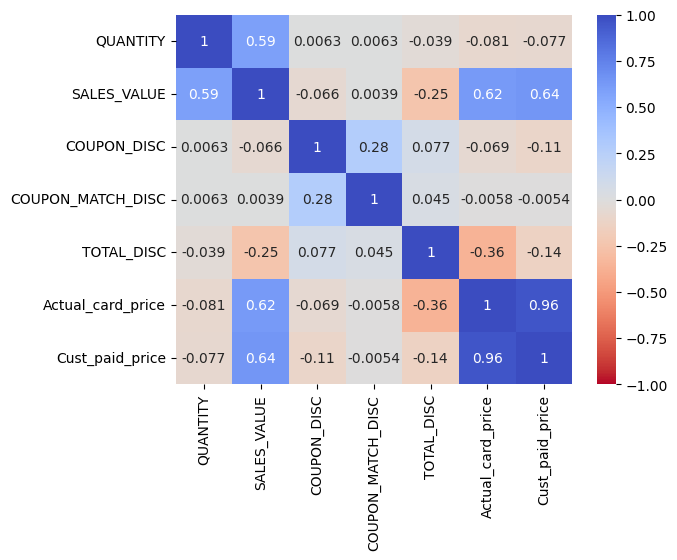

In [ ]:
deepexploredf(df_transaction_data,col_cat,col_num)

###Export result

In [ ]:
export_to_csv(path_folder,'fact_transaction_data',df_transaction_data)

fact_transaction_data.csv has been exported successfully.


# 2) dim_couponxcampaign

## df_coupon_redempt

In [ ]:
df_coupon_redempt = pd.read_csv('/content/Dataset/dunnhumby_The-Complete-Journey CSV/coupon_redempt.csv', delimiter=",")
df_coupon_redempt

household_key  DAY   COUPON_UPC  CAMPAIGN
0                 1  421  10000085364         8
1                 1  421  51700010076         8
2                 1  427  54200000033         8
3                 1  597  10000085476        18
4                 1  597  54200029176        18
...             ...  ...          ...       ...
2313           2496  592  54900050076        18
2314           2496  610  55100000013        18
2315           2500  449  53663200076         8
2316           2500  449  54300031076         8
2317           2500  624  55000013950        18

[2318 rows x 4 columns]

###Explore_data

In [ ]:
explore_df(df_coupon_redempt)

#Check shape
(2318, 4) 

#Check duplication
No duplicate rows found.

#Check missing value
No missing values found.

#Check data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  2318 non-null   int64
 1   DAY            2318 non-null   int64
 2   COUPON_UPC     2318 non-null   int64
 3   CAMPAIGN       2318 non-null   int64
dtypes: int64(4)
memory usage: 72.6 KB
None 


#Check unique value
household_key    434
DAY              328
COUPON_UPC       556
CAMPAIGN          30
dtype: int64 

#List of column name:
 ['household_key', 'DAY', 'COUPON_UPC', 'CAMPAIGN']


In [ ]:
deepexploredf(df_coupon_redempt,['household_key', 'DAY', 'COUPON_UPC', 'CAMPAIGN'],[])

##Explore categorical data

-------- household_key --------
household_key
367     35
256     33
67      33
1823    30
931     29
        ..
1928     1
460      1
1936     1
1326     1
1012     1
Name: count, Length: 434, dtype: int64

-------- DAY --------
DAY
593    47
516    39
515    38
592    37
600    34
       ..
468     1
676     1
661     1
482     1
698     1
Name: count, Length: 328, dtype: int64

-------- COUPON_UPC --------
COUPON_UPC
10000085475    63
51600070033    56
54154888076    49
10000085429    45
10000085363    42
               ..
53700021125     1
51113240041     1
55928320070     1
54110030074     1
10000089283     1
Name: count, Length: 556, dtype: int64

-------- CAMPAIGN --------
CAMPAIGN
18    653
13    629
8     372
26     73
30     64
25     61
23     60
22     47
17     45
9      43
16     43
14     34
20     33
19     29
12     26
29     24
10     15
5      13
4      11
24     10
11      8
7       7
2       5
21      5
3       2
15      2
6       1
1    

In [ ]:
df_transaction_data.columns

Index(['index', 'household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'TOTAL_DISC',
       'If_used_retail_loyalprog', 'If_used_manu_coupon',
       'If_used_giveaway_promo', 'Actual_card_price', 'Cust_paid_price'],
      dtype='object')

In [ ]:
df_coupon_redempt.columns

Index(['household_key', 'DAY', 'COUPON_UPC', 'CAMPAIGN'], dtype='object')

#### Explore about household

In [ ]:
df_transaction_data['keytrans_hh_day'] = df_transaction_data['household_key'].astype(str) + '_' + df_transaction_data['DAY'].astype(str)
df_coupon_redempt['keyredempt_hh_day'] = df_coupon_redempt['household_key'].astype(str) + '_' + df_coupon_redempt['DAY'].astype(str)

In [ ]:
df_trans_notredemptcoupon_havedisc = pandasql.sqldf('''
  SELECT *
  FROM df_transaction_data
  WHERE (keytrans_hh_day NOT IN (SELECT DISTINCT keyredempt_hh_day FROM df_coupon_redempt)) AND (TOTAL_DISC != 0 OR If_used_giveaway_promo == 1)
''')
df_trans_notredemptcoupon_havedisc

index  household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  \
0          46749              1  27601281299   51      840361         1   
1          46750              1  27601281299   51      845307         1   
2          46751              1  27601281299   51      852014         1   
3          46752              1  27601281299   51      854982         1   
4          46753              1  27601281299   51      856942         1   
...          ...            ...          ...  ...         ...       ...   
1286364  2566407           2500  42250641157  708     1085122         1   
1286365  2566408           2500  42250641157  708     1109947         1   
1286366  2566410           2500  42250641157  708     8019186         1   
1286367  2566411           2500  42250641157  708    15596705         1   
1286368  2566412           2500  42250641157  708    16807289         1   

         SALES_VALUE  STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
0               1.09       436        -0.30        1456        8          0.0   
1               3.71       436        -0.62        1456        8          0.0   
2               2.79       436        -1.20        1456        8          0.0   
3               7.19       436        -1.30        1456        8          0.0   
4               2.50       436        -0.49        1456        8          0.0   
...              ...       ...          ...         ...      ...          ...   
1286364         0.88       447        -1.31        1620      102          0.0   
1286365         3.19       447        -0.80        1620      102          0.0   
1286366         2.59       447        -1.00        1620      102          0.0   
1286367         2.77       447        -3.02        1620      102         -1.0   
1286368         1.50       447        -1.49        1620      102          0.0   

         COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
0                      0.0       -0.30                         1   
1                      0.0       -0.62                         1   
2                      0.0       -1.20                         1   
3                      0.0       -1.30                         1   
4                      0.0       -0.49                         1   
...                    ...         ...                       ...   
1286364                0.0       -1.31                         1   
1286365                0.0       -0.80                         1   
1286366                0.0       -1.00                         1   
1286367                0.0       -3.02                         1   
1286368                0.0       -1.49                         1   

         If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  \
0                          0                       0               1.39   
1                          0                       0               4.33   
2                          0                       0               3.99   
3                          0                       0               8.49   
4                          0                       0               2.99   
...                      ...                     ...                ...   
1286364                    0                       0               2.19   
1286365                    0                       0               3.99   
1286366                    0                       0               3.59   
1286367                    0                       0               5.79   
1286368                    0                       0               2.99   

         Cust_paid_price keytrans_hh_day  
0                   1.09            1_51  
1                   3.71            1_51  
2                   2.79            1_51  
3                   7.19            1_51  
4                   2.50            1_51  
...                  ...             ...  
1286364             0.88        2500_708  
1286365             3.19        2500_708  
1286366             2.59        

In [ ]:
explore_df(df_trans_notredemptcoupon_havedisc)

#Check shape
(1286369, 20) 

#Check duplication
No duplicate rows found.

#Check missing value
No missing values found.

#Check data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286369 entries, 0 to 1286368
Data columns (total 20 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   index                     1286369 non-null  int64  
 1   household_key             1286369 non-null  int64  
 2   BASKET_ID                 1286369 non-null  int64  
 3   DAY                       1286369 non-null  int64  
 4   PRODUCT_ID                1286369 non-null  int64  
 5   QUANTITY                  1286369 non-null  int64  
 6   SALES_VALUE               1286369 non-null  float64
 7   STORE_ID                  1286369 non-null  int64  
 8   RETAIL_DISC               1286369 non-null  float64
 9   TRANS_TIME                1286369 non-null  int64  
 10  WEEK_NO                   1286369 non-null  int64  
 11  COU

##Explore categorical data

-------- keytrans_hh_day --------
keytrans_hh_day
2294_267    128
248_656     116
248_199     112
19_592      110
2294_211    108
           ... 
1215_123      1
2004_152      1
303_276       1
122_452       1
466_337       1
Name: count, Length: 197217, dtype: int64

-------- household_key --------
household_key
718     5061
2459    3860
1489    3394
1795    3234
934     2915
        ... 
1035       3
1830       2
1897       2
494        1
522        1
Name: count, Length: 2500, dtype: int64

-------- BASKET_ID --------
BASKET_ID
30983766334    128
41560100381    116
29810501497    112
32007132274    105
40314544302    103
              ... 
34045442414      1
32008495432      1
31956376376      1
31944586124      1
30700387717      1
Name: count, Length: 229617, dtype: int64

-------- STORE_ID --------
STORE_ID
367     33131
406     27212
356     25002
292     23060
381     22000
        ...  
3141        1
681         1
610         1
639         1
574    

<ipython-input-21-9d781c8dea78>:13: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



|                          |   count |          mean |            std |   min |       25% |     50% |           75% |             max |
|:-------------------------|--------:|--------------:|---------------:|------:|----------:|--------:|--------------:|----------------:|
| DAY                      | 1286369 | 386.32        |  191.1         |     1 |    225    |     387 | 553           |   711           |
| QUANTITY                 | 1286369 | 200.24        | 1627.53        |     1 |      1    |       1 |   1           | 89638           |
| PRODUCT_ID               | 1286369 |   2.93137e+06 |    3.83175e+06 | 26355 | 916122    | 1024731 |   1.13626e+06 |     1.83163e+07 |
| SALES_VALUE              | 1286369 |   3.11        |    4.5         |     0 |      1.25 |       2 |   3.19        |   499.99        |
| If_used_retail_loyalprog | 1286369 |   0.99        |    0.07        |     0 |      1    |       1 |   1           |     1           |
| If_used_manu_coupon      | 1286369 |   0.01   

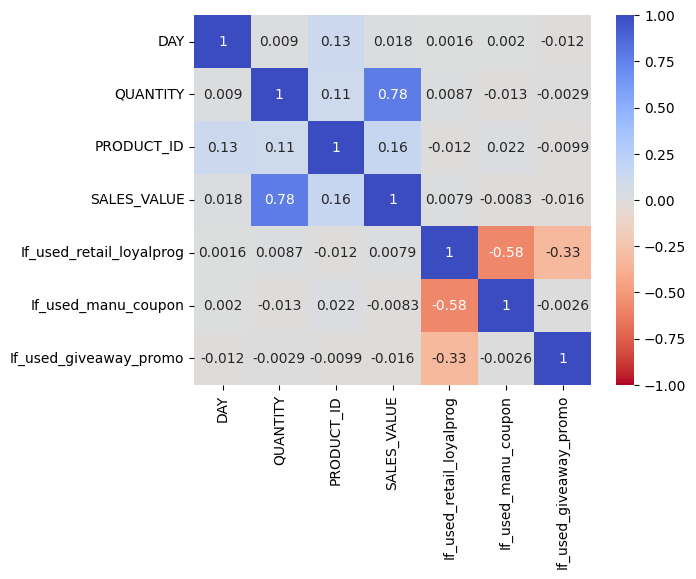

In [ ]:
deepexploredf(df_trans_notredemptcoupon_havedisc,['keytrans_hh_day','household_key', 'BASKET_ID','STORE_ID', 'DAY','If_used_retail_loyalprog','If_used_manu_coupon', 'If_used_giveaway_promo'],
 ['DAY', 'QUANTITY','PRODUCT_ID', 'SALES_VALUE', 'If_used_retail_loyalprog', 'If_used_manu_coupon', 'If_used_giveaway_promo'])

In [ ]:
df_trans_redemptcoupon_havedisc = pandasql.sqldf('''
  SELECT *
  FROM df_transaction_data
  WHERE (keytrans_hh_day IN (SELECT DISTINCT keyredempt_hh_day FROM df_coupon_redempt)) AND (TOTAL_DISC != 0 OR If_used_giveaway_promo == 1)
''')
df_trans_redemptcoupon_havedisc

index  household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  \
0      1413210              1  33192346254  421      852662         4   
1      1413211              1  33192346254  421      856942         1   
2      1413214              1  33192346254  421      893097         1   
3      1413218              1  33192346254  421      943316         2   
4      1413220              1  33192346254  421      978974         1   
...        ...            ...          ...  ...         ...       ...   
23950  2218491           2500  41062761675  624    12947679         1   
23951  2218493           2500  41062761675  624    13416937         1   
23952  2218495           2500  41062761675  624    15595945         3   
23953  2218691           2500  41062806406  624      957839         2   
23954  2218692           2500  41062806406  624     9837296         1   

       SALES_VALUE  STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  \
0             6.00       436        -1.16        1559       61         0.00   
1             2.54       436         0.00        1559       61        -0.55   
2             1.99       436        -0.50        1559       61         0.00   
3             4.55       436        -0.78        1559       61        -0.55   
4             2.00       436        -0.69        1559       61         0.00   
...            ...       ...          ...         ...      ...          ...   
23950         0.88       327        -0.12        1531       90         0.00   
23951         1.50       327        -0.39        1531       90         0.00   
23952         1.80       327        -0.57        1531       90         0.00   
23953         4.00       447        -0.98        1721       90         0.00   
23954        13.99       447        -0.80        1721       90         0.00   

       COUPON_MATCH_DISC  TOTAL_DISC  If_used_retail_loyalprog  \
0                   0.00       -1.16                         1   
1                  -0.45       -0.45                         0   
2                   0.00       -0.50                         1   
3                  -0.45       -1.23                         1   
4                   0.00       -0.69                         1   
...                  ...         ...                       ...   
23950               0.00       -0.12                         1   
23951               0.00       -0.39                         1   
23952               0.00       -0.57                         1   
23953               0.00       -0.98                         1   
23954               0.00       -0.80                         1   

       If_used_manu_coupon  If_used_giveaway_promo  Actual_card_price  \
0                        0                       0               1.79   
1                        1                       0               2.99   
2                        0                       0               2.49   
3                        1                       0               2.89   
4                        0                       0               2.69   
...                    ...                     ...                ...   
23950                    0                       0               1.00   
23951                    0                       0               1.89   
23952                    0                       0               0.79   
23953                    0                       0               2.49   
23954                    0                       0              14.79   

       Cust_paid_price keytrans_hh_day  
0                 1.50           1_421  
1                 3.09           1_421  
2                 1.99           1_421  
3                 2.55           1_421  
4                 2.00           1_421  
...                ...             ...  
23950             0.88        2500_624  
23951             1.50        2500_624  
23952             0.60        2500_624  
23953             2.00        2500_624  
23954            13.99        2500_624  

[23955 rows x 20 col

In [ ]:
explore_df(df_trans_redemptcoupon_havedisc)

#Check shape
(23955, 20) 

#Check duplication
No duplicate rows found.

#Check missing value
No missing values found.

#Check data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23955 entries, 0 to 23954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     23955 non-null  int64  
 1   household_key             23955 non-null  int64  
 2   BASKET_ID                 23955 non-null  int64  
 3   DAY                       23955 non-null  int64  
 4   PRODUCT_ID                23955 non-null  int64  
 5   QUANTITY                  23955 non-null  int64  
 6   SALES_VALUE               23955 non-null  float64
 7   STORE_ID                  23955 non-null  int64  
 8   RETAIL_DISC               23955 non-null  float64
 9   TRANS_TIME                23955 non-null  int64  
 10  WEEK_NO                   23955 non-null  int64  
 11  COUPON_DISC               23955 non

##Explore categorical data

-------- keytrans_hh_day --------
keytrans_hh_day
248_228     105
931_602     100
2489_558     77
2489_529     75
2130_528     73
           ... 
413_609       1
413_606       1
2240_466      1
397_639       1
262_431       1
Name: count, Length: 1228, dtype: int64

-------- household_key --------
household_key
889     610
979     449
2489    438
367     413
574     352
       ... 
307       2
1012      2
2185      1
262       1
1024      1
Name: count, Length: 430, dtype: int64

-------- BASKET_ID --------
BASKET_ID
30254746050    105
40727747221    100
40186331355     77
35665911616     75
35665427268     73
              ... 
30845835931      1
40826593799      1
33482327156      1
40941770956      1
40642948301      1
Name: count, Length: 1483, dtype: int64

-------- STORE_ID --------
STORE_ID
406      950
368      903
367      824
31782    805
362      673
        ... 
337       10
339        9
3479       7
381        3
715        1
Name: count, Length:

<ipython-input-21-9d781c8dea78>:13: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



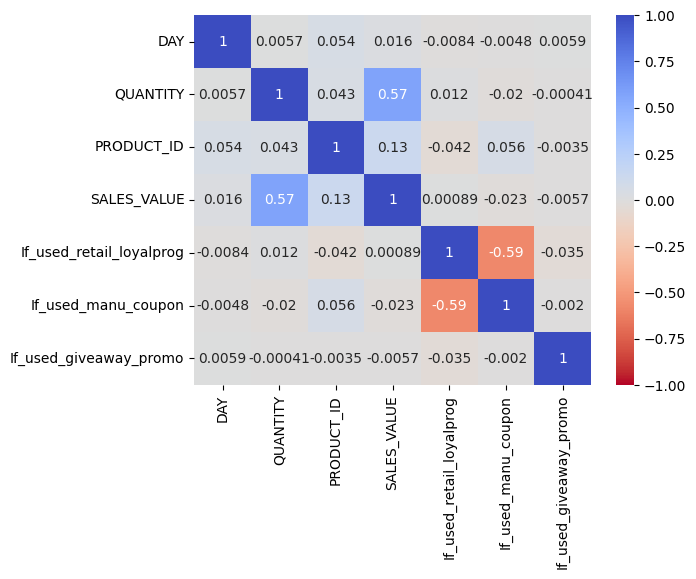

In [ ]:
deepexploredf(df_trans_redemptcoupon_havedisc,['keytrans_hh_day','household_key', 'BASKET_ID','STORE_ID', 'DAY','If_used_retail_loyalprog','If_used_manu_coupon', 'If_used_giveaway_promo'],
 ['DAY', 'QUANTITY','PRODUCT_ID', 'SALES_VALUE', 'If_used_retail_loyalprog', 'If_used_manu_coupon', 'If_used_giveaway_promo'])

#####Finding:

In [ ]:
23955/(23955+1286369)

0.01828173795183481

In [ ]:
print('From query observation, The records used discount or give away promotion consisted of 1286369 records that the coupon was not redeemed \nand only 23955 records that coupon was redeemed, computing as the ratio of = '+str(23955/(23955+1286369)*100) + ' %')

From query observation, The records used discount or give away promotion consisted of 1286369 records that the coupon was not redeemed 
and only 23955 records that coupon was redeemed, computing as the ratio of = 1.828173795183481 %


In the other word, there might not have association between redempt coupon and applied discount or promotion as the data is too much misssing about 98%.

In [ ]:
df_transaction_data = df_transaction_data.drop(columns=['index','keytrans_hh_day'])

In [ ]:
df_coupon_redempt = df_coupon_redempt.drop(columns=['keyredempt_hh_day'])

## df_coupon

In [ ]:
df_coupon = pd.read_csv('/content/Dataset/dunnhumby_The-Complete-Journey CSV/coupon.csv', delimiter=",")
df_coupon

COUPON_UPC  PRODUCT_ID  CAMPAIGN
0       10000089061       27160         4
1       10000089064       27754         9
2       10000089073       28897        12
3       51800009050       28919        28
4       52100000076       28929        25
...             ...         ...       ...
124543  10000085478    13038802        18
124544  10000085479    13039368        18
124545  10000085478    13039553        18
124546  10000085479    13776332        18
124547  10000085477    13213390        18

[124548 rows x 3 columns]

###Explore data

In [ ]:
explore_df(df_coupon)

#Check shape
(124548, 3) 

#Check duplication
There are 5164 duplicate rows in the DataFrame.
Duplicate rows were dropped.
New shape of dataframe after dropping duplicate rows: (119384, 3)

#Check missing value
No missing values found.

#Check data type
<class 'pandas.core.frame.DataFrame'>
Index: 119384 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  119384 non-null  int64
 1   PRODUCT_ID  119384 non-null  int64
 2   CAMPAIGN    119384 non-null  int64
dtypes: int64(3)
memory usage: 3.6 MB
None 


#Check unique value
COUPON_UPC     1135
PRODUCT_ID    44133
CAMPAIGN         30
dtype: int64 

#List of column name:
 ['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN']


In [ ]:
deepexploredf(df_coupon,['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], [])

##Explore categorical data

-------- COUPON_UPC --------
COUPON_UPC
10000085478    14477
10000085428    14367
10000085427     5713
10000085477     5686
10000085479     5474
               ...  
51033111276        1
10000089002        1
10000089005        1
54360010033        1
10000089033        1
Name: count, Length: 1135, dtype: int64

-------- PRODUCT_ID --------
PRODUCT_ID
12524960    13
9368501     13
12527821    13
12526314    13
12541857    13
            ..
1056778      1
1338577      1
15830909     1
950200       1
17328611     1
Name: count, Length: 44133, dtype: int64

-------- CAMPAIGN --------
CAMPAIGN
13    38075
18    37480
8     18598
24     3774
30     3530
26     3452
22     1917
14     1049
16     1025
27      931
20      837
25      826
9       825
17      767
23      767
3       740
29      689
12      620
28      535
5       443
10      393
1       383
19      375
2       301
11      278
7       259
21      242
4       200
15       55
6        18
Name: count, dtyp

One COUPON_UPC can have at least 1 product_id (1:M)

In [ ]:
pandasql.sqldf('''SELECT COUPON_UPC,COUNT(DISTINCT PRODUCT_ID) AS Count_product
FROM df_coupon
GROUP BY COUPON_UPC
ORDER BY COUNT(DISTINCT PRODUCT_ID) DESC''')

COUPON_UPC  Count_product
0     10000085478          14477
1     10000085428          14367
2     10000085427           5713
3     10000085477           5686
4     10000085479           5474
...           ...            ...
1130  10000089005              1
1131  10000089004              1
1132  10000089003              1
1133  10000089002              1
1134  10000085367              1

[1135 rows x 2 columns]

##df_campaign_table

In [ ]:
df_campaign_table = pd.read_csv('/content/Dataset/dunnhumby_The-Complete-Journey CSV/campaign_table.csv', delimiter=",")
df_campaign_table

DESCRIPTION  household_key  CAMPAIGN
0          TypeA             17        26
1          TypeA             27        26
2          TypeA            212        26
3          TypeA            208        26
4          TypeA            192        26
...          ...            ...       ...
7203       TypeC           1803        15
7204       TypeC           1082        15
7205       TypeC            942        15
7206       TypeC            855        15
7207       TypeC            334        15

[7208 rows x 3 columns]

####Explore data

In [ ]:
explore_df(df_campaign_table)

#Check shape
(7208, 3) 

#Check duplication
No duplicate rows found.

#Check missing value
No missing values found.

#Check data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB
None 


#Check unique value
DESCRIPTION         3
household_key    1584
CAMPAIGN           30
dtype: int64 

#List of column name:
 ['DESCRIPTION', 'household_key', 'CAMPAIGN']


In [ ]:
deepexploredf(df_campaign_table,['DESCRIPTION', 'household_key', 'CAMPAIGN'], [])

##Explore categorical data

-------- DESCRIPTION --------
DESCRIPTION
TypeA    3979
TypeB    2655
TypeC     574
Name: count, dtype: int64

-------- household_key --------
household_key
2317    17
2489    16
1527    15
718     15
2459    15
        ..
563      1
566      1
2021     1
2032     1
369      1
Name: count, Length: 1584, dtype: int64

-------- CAMPAIGN --------
CAMPAIGN
18    1133
13    1077
8     1076
30     361
26     332
22     276
20     244
14     224
11     214
17     202
7      198
16     188
25     187
23     183
9      176
12     170
5      166
19     130
10     123
29     118
24     100
4       81
21      65
6       65
2       48
28      17
15      17
1       13
27      12
3       12
Name: count, dtype: int64

##Explore numerical data
No numerical data found.


#### Remove redundancy column 'DESCRIPTION'

In [ ]:
df_campaign_table.drop(columns=['DESCRIPTION'], inplace=True)
df_campaign_table

household_key  CAMPAIGN
0                17        26
1                27        26
2               212        26
3               208        26
4               192        26
...             ...       ...
7203           1803        15
7204           1082        15
7205            942        15
7206            855        15
7207            334        15

[7208 rows x 2 columns]

## Merging tables

### Join tables df_coupon & df_campaign_table

Key to link = 'CAMPAIGN'

In [ ]:
#df_coupon_campaign_join = pd.merge(df_coupon, df_campaign_table, left_on='CAMPAIGN', right_on='CAMPAIGN', how='left')
#df_coupon_campaign_join

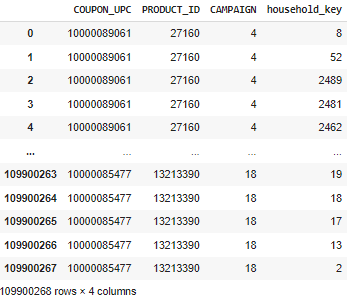

In [ ]:
#export_to_csv(path_folder,'dim_coupon_campaign_join',df_coupon_campaign_join)

###Join tables df_coupon_redempt & df_coupon

In [ ]:
df_coupon_redempt['Key_coupon_redempt'] = df_coupon_redempt['COUPON_UPC'].astype(str) + '_' + df_coupon_redempt['CAMPAIGN'].astype(str)
df_coupon['Key_coupon'] = df_coupon['COUPON_UPC'].astype(str) + '_' + df_coupon['CAMPAIGN'].astype(str)

left_on='concat_key_trans', right_on='concat_key_redempt'

In [ ]:
df_coupon_redempt_outerjoin = pd.merge(df_coupon, df_coupon_redempt, left_on='Key_coupon', right_on='Key_coupon_redempt', how='left')
df_coupon_redempt_outerjoin

COUPON_UPC_x  PRODUCT_ID  CAMPAIGN_x      Key_coupon  household_key  \
0         10000089061       27160           4   10000089061_4            NaN   
1         10000089064       27754           9   10000089064_9          321.0   
2         10000089064       27754           9   10000089064_9         1773.0   
3         10000089073       28897          12  10000089073_12         1229.0   
4         10000089073       28897          12  10000089073_12         1633.0   
...               ...         ...         ...             ...            ...   
2212501   10000085477    13213390          18  10000085477_18         1995.0   
2212502   10000085477    13213390          18  10000085477_18         2398.0   
2212503   10000085477    13213390          18  10000085477_18         2448.0   
2212504   10000085477    13213390          18  10000085477_18         2478.0   
2212505   10000085477    13213390          18  10000085477_18         2494.0   

           DAY  COUPON_UPC_y  CAMPAIGN_y Key_coupon_redempt  
0          NaN           NaN         NaN                NaN  
1        446.0  1.000009e+10         9.0      10000089064_9  
2        439.0  1.000009e+10         9.0      10000089064_9  
3        491.0  1.000009e+10        12.0     10000089073_12  
4        497.0  1.000009e+10        12.0     10000089073_12  
...        ...           ...         ...                ...  
2212501  625.0  1.000009e+10        18.0     10000085477_18  
2212502  637.0  1.000009e+10        18.0     10000085477_18  
2212503  619.0  1.000009e+10        18.0     10000085477_18  
2212504  641.0  1.000009e+10        18.0     10000085477_18  
2212505  635.0  1.000009e+10        18.0     10000085477_18  

[2212506 rows x 9 columns]

#### Add matching status column in the table

In [ ]:
df_coupon_redempt_outerjoin = add_status_column(df_coupon_redempt_outerjoin, 'Key_coupon', 'Key_coupon_redempt')
df_coupon_redempt_outerjoin

COUPON_UPC_x  PRODUCT_ID  CAMPAIGN_x      Key_coupon  household_key  \
0         10000089061       27160           4   10000089061_4            NaN   
1         10000089064       27754           9   10000089064_9          321.0   
2         10000089064       27754           9   10000089064_9         1773.0   
3         10000089073       28897          12  10000089073_12         1229.0   
4         10000089073       28897          12  10000089073_12         1633.0   
...               ...         ...         ...             ...            ...   
2212501   10000085477    13213390          18  10000085477_18         1995.0   
2212502   10000085477    13213390          18  10000085477_18         2398.0   
2212503   10000085477    13213390          18  10000085477_18         2448.0   
2212504   10000085477    13213390          18  10000085477_18         2478.0   
2212505   10000085477    13213390          18  10000085477_18         2494.0   

           DAY  COUPON_UPC_y  CAMPAIGN_y Key_coupon_redempt  \
0          NaN           NaN         NaN                NaN   
1        446.0  1.000009e+10         9.0      10000089064_9   
2        439.0  1.000009e+10         9.0      10000089064_9   
3        491.0  1.000009e+10        12.0     10000089073_12   
4        497.0  1.000009e+10        12.0     10000089073_12   
...        ...           ...         ...                ...   
2212501  625.0  1.000009e+10        18.0     10000085477_18   
2212502  637.0  1.000009e+10        18.0     10000085477_18   
2212503  619.0  1.000009e+10        18.0     10000085477_18   
2212504  641.0  1.000009e+10        18.0     10000085477_18   
2212505  635.0  1.000009e+10        18.0     10000085477_18   

                     status  
0        Found only in left  
1             Found in both  
2             Found in both  
3             Found in both  
4             Found in both  
...                     ...  
2212501       Found in both  
2212502       Found in both  
2212503       Found in both  
2212504       Found in both  
2212505       Found in both  

[2212506 rows x 10 columns]

In [ ]:
df_coupon_redempt_outerjoin[df_coupon_redempt_outerjoin['status']=="Found only in left"]

COUPON_UPC_x  PRODUCT_ID  CAMPAIGN_x      Key_coupon  household_key  \
0         10000089061       27160           4   10000089061_4            NaN   
13        51800009050       28919          28  51800009050_28            NaN   
28        52100026076       28929          28  52100026076_28            NaN   
29        52100020075       28929           1   52100020075_1            NaN   
44        52100026076       29096          28  52100026076_28            NaN   
...               ...         ...         ...             ...            ...   
1432862   10000089281      926597          18  10000089281_18            NaN   
1432863   10000089281     1547254          18  10000089281_18            NaN   
1432864   10000089282     1109352          18  10000089282_18            NaN   
1432865   10000089282       71127          18  10000089282_18            NaN   
2210178   53700067076    15715904          26  53700067076_26            NaN   

         DAY  COUPON_UPC_y  CAMPAIGN_y Key_coupon_redempt              status  
0        NaN           NaN         NaN                NaN  Found only in left  
13       NaN           NaN         NaN                NaN  Found only in left  
28       NaN           NaN         NaN                NaN  Found only in left  
29       NaN           NaN         NaN                NaN  Found only in left  
44       NaN           NaN         NaN                NaN  Found only in left  
...      ...           ...         ...                ...                 ...  
1432862  NaN           NaN         NaN                NaN  Found only in left  
1432863  NaN           NaN         NaN                NaN  Found only in left  
1432864  NaN           NaN         NaN                NaN  Found only in left  
1432865  NaN           NaN         NaN                NaN  Found only in left  
2210178  NaN           NaN         NaN                NaN  Found only in left  

[15844 rows x 10 columns]

In [ ]:
df_coupon_redempt_outerjoin[df_coupon_redempt_outerjoin['status']=="Found only in left"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 15844 entries, 0 to 2210178
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   COUPON_UPC_x        15844 non-null  int64  
 1   PRODUCT_ID          15844 non-null  int64  
 2   CAMPAIGN_x          15844 non-null  int64  
 3   Key_coupon          15844 non-null  object 
 4   household_key       0 non-null      float64
 5   DAY                 0 non-null      float64
 6   COUPON_UPC_y        0 non-null      float64
 7   CAMPAIGN_y          0 non-null      float64
 8   Key_coupon_redempt  0 non-null      object 
 9   status              15844 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 1.3+ MB


In [ ]:
df_coupon_redempt_outerjoin[df_coupon_redempt_outerjoin['status']=="Found only in right"]

Empty DataFrame
Columns: [COUPON_UPC_x, PRODUCT_ID, CAMPAIGN_x, Key_coupon, household_key, DAY, COUPON_UPC_y, CAMPAIGN_y, Key_coupon_redempt, status]
Index: []

#####Finding:
- df_coupon_redempt is subset of df_coupon where the difference is df_coupon is the table that stores coupon data that must be redempted by each household transaction, corresponding to nature of dataset described in the document.
- df_coupon_redempt is subset of df_coupon, meaning that there is no coupon that is mentioned in this table but not found in df_coupon.

In [ ]:
df_coupon_redempt_outerjoin[df_coupon_redempt_outerjoin['status']=="Found in both"]

COUPON_UPC_x  PRODUCT_ID  CAMPAIGN_x      Key_coupon  household_key  \
1         10000089064       27754           9   10000089064_9          321.0   
2         10000089064       27754           9   10000089064_9         1773.0   
3         10000089073       28897          12  10000089073_12         1229.0   
4         10000089073       28897          12  10000089073_12         1633.0   
5         10000089073       28897          12  10000089073_12         1856.0   
...               ...         ...         ...             ...            ...   
2212501   10000085477    13213390          18  10000085477_18         1995.0   
2212502   10000085477    13213390          18  10000085477_18         2398.0   
2212503   10000085477    13213390          18  10000085477_18         2448.0   
2212504   10000085477    13213390          18  10000085477_18         2478.0   
2212505   10000085477    13213390          18  10000085477_18         2494.0   

           DAY  COUPON_UPC_y  CAMPAIGN_y Key_coupon_redempt         status  
1        446.0  1.000009e+10         9.0      10000089064_9  Found in both  
2        439.0  1.000009e+10         9.0      10000089064_9  Found in both  
3        491.0  1.000009e+10        12.0     10000089073_12  Found in both  
4        497.0  1.000009e+10        12.0     10000089073_12  Found in both  
5        492.0  1.000009e+10        12.0     10000089073_12  Found in both  
...        ...           ...         ...                ...            ...  
2212501  625.0  1.000009e+10        18.0     10000085477_18  Found in both  
2212502  637.0  1.000009e+10        18.0     10000085477_18  Found in both  
2212503  619.0  1.000009e+10        18.0     10000085477_18  Found in both  
2212504  641.0  1.000009e+10        18.0     10000085477_18  Found in both  
2212505  635.0  1.000009e+10        18.0     10000085477_18  Found in both  

[2196662 rows x 10 columns]

In [ ]:
2196662 + 15844

2212506

#####'Is_coupon_redempt'

In [ ]:
df_coupon_redempt_outerjoin['Is_coupon_redempt'] = df_coupon_redempt_outerjoin['status'].apply(lambda x: 1 if x == 'Found in both' else 0)
df_coupon_redempt_outerjoin

COUPON_UPC_x  PRODUCT_ID  CAMPAIGN_x      Key_coupon  household_key  \
0         10000089061       27160           4   10000089061_4            NaN   
1         10000089064       27754           9   10000089064_9          321.0   
2         10000089064       27754           9   10000089064_9         1773.0   
3         10000089073       28897          12  10000089073_12         1229.0   
4         10000089073       28897          12  10000089073_12         1633.0   
...               ...         ...         ...             ...            ...   
2212501   10000085477    13213390          18  10000085477_18         1995.0   
2212502   10000085477    13213390          18  10000085477_18         2398.0   
2212503   10000085477    13213390          18  10000085477_18         2448.0   
2212504   10000085477    13213390          18  10000085477_18         2478.0   
2212505   10000085477    13213390          18  10000085477_18         2494.0   

           DAY  COUPON_UPC_y  CAMPAIGN_y Key_coupon_redempt  \
0          NaN           NaN         NaN                NaN   
1        446.0  1.000009e+10         9.0      10000089064_9   
2        439.0  1.000009e+10         9.0      10000089064_9   
3        491.0  1.000009e+10        12.0     10000089073_12   
4        497.0  1.000009e+10        12.0     10000089073_12   
...        ...           ...         ...                ...   
2212501  625.0  1.000009e+10        18.0     10000085477_18   
2212502  637.0  1.000009e+10        18.0     10000085477_18   
2212503  619.0  1.000009e+10        18.0     10000085477_18   
2212504  641.0  1.000009e+10        18.0     10000085477_18   
2212505  635.0  1.000009e+10        18.0     10000085477_18   

                     status  Is_coupon_redempt  
0        Found only in left                  0  
1             Found in both                  1  
2             Found in both                  1  
3             Found in both                  1  
4             Found in both                  1  
...                     ...                ...  
2212501       Found in both                  1  
2212502       Found in both                  1  
2212503       Found in both                  1  
2212504       Found in both                  1  
2212505       Found in both                  1  

[2212506 rows x 11 columns]

In [ ]:
print(list(df_coupon_redempt_outerjoin.columns))

['COUPON_UPC_x', 'PRODUCT_ID', 'CAMPAIGN_x', 'Key_coupon', 'household_key', 'DAY', 'COUPON_UPC_y', 'CAMPAIGN_y', 'Key_coupon_redempt', 'status', 'Is_coupon_redempt']


In [ ]:
df_coupon_redempt_outerjoin = df_coupon_redempt_outerjoin.drop(columns=['COUPON_UPC_y', 'Key_coupon','CAMPAIGN_y', 'Key_coupon_redempt', 'status'])

In [ ]:
df_coupon_redempt_outerjoin

COUPON_UPC_x  PRODUCT_ID  CAMPAIGN_x  household_key    DAY  \
0         10000089061       27160           4            NaN    NaN   
1         10000089064       27754           9          321.0  446.0   
2         10000089064       27754           9         1773.0  439.0   
3         10000089073       28897          12         1229.0  491.0   
4         10000089073       28897          12         1633.0  497.0   
...               ...         ...         ...            ...    ...   
2212501   10000085477    13213390          18         1995.0  625.0   
2212502   10000085477    13213390          18         2398.0  637.0   
2212503   10000085477    13213390          18         2448.0  619.0   
2212504   10000085477    13213390          18         2478.0  641.0   
2212505   10000085477    13213390          18         2494.0  635.0   

         Is_coupon_redempt  
0                        0  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
2212501                  1  
2212502                  1  
2212503                  1  
2212504                  1  
2212505                  1  

[2212506 rows x 6 columns]

In [ ]:
df_coupon_redempt_outerjoin.rename(columns={
    'COUPON_UPC_x': 'COUPON_UPC',
    'CAMPAIGN_x': 'CAMPAIGN',
    'household_key': 'household_key_redempt',
    'DAY': 'DAY_redempt'
}, inplace=True)
df_coupon_redempt_outerjoin

COUPON_UPC  PRODUCT_ID  CAMPAIGN  household_key_redempt  \
0        10000089061       27160         4                    NaN   
1        10000089064       27754         9                  321.0   
2        10000089064       27754         9                 1773.0   
3        10000089073       28897        12                 1229.0   
4        10000089073       28897        12                 1633.0   
...              ...         ...       ...                    ...   
2212501  10000085477    13213390        18                 1995.0   
2212502  10000085477    13213390        18                 2398.0   
2212503  10000085477    13213390        18                 2448.0   
2212504  10000085477    13213390        18                 2478.0   
2212505  10000085477    13213390        18                 2494.0   

         DAY_redempt  Is_coupon_redempt  
0                NaN                  0  
1              446.0                  1  
2              439.0                  1  
3              491.0                  1  
4              497.0                  1  
...              ...                ...  
2212501        625.0                  1  
2212502        637.0                  1  
2212503        619.0                  1  
2212504        641.0                  1  
2212505        635.0                  1  

[2212506 rows x 6 columns]

### Export result

In [ ]:
export_to_csv(path_folder,'dim_coupon_redempt_outerjoin',df_coupon_redempt_outerjoin)

dim_coupon_redempt_outerjoin.csv has been exported successfully.


# 3) dim_campaign

###df_campaign_desc

In [ ]:
df_campaign_desc = pd.read_csv('/content/Dataset/dunnhumby_The-Complete-Journey CSV/campaign_desc.csv', delimiter=",")
df_campaign_desc

DESCRIPTION  CAMPAIGN  START_DAY  END_DAY
0        TypeB        24        659      719
1        TypeC        15        547      708
2        TypeB        25        659      691
3        TypeC        20        615      685
4        TypeB        23        646      684
5        TypeB        21        624      656
6        TypeB        22        624      656
7        TypeA        18        587      642
8        TypeB        19        603      635
9        TypeB        17        575      607
10       TypeC        14        531      596
11       TypeB        16        561      593
12       TypeA        13        504      551
13       TypeB        11        477      523
14       TypeB        12        477      509
15       TypeB        10        463      495
16       TypeB         9        435      467
17       TypeA         8        412      460
18       TypeB         7        398      432
19       TypeC         6        393      425
20       TypeC         3        356      412
21       TypeB         5        377      411
22       TypeB         4        372      404
23       TypeB         1        346      383
24       TypeB         2        351      383
25       TypeA        30        323      369
26       TypeB        29        281      334
27       TypeB        28        259      320
28       TypeC        27        237      300
29       TypeA        26        224      264

In [ ]:
explore_df(df_campaign_desc)

#Check shape
(30, 4) 

#Check duplication
No duplicate rows found.

#Check missing value
No missing values found.

#Check data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DESCRIPTION  30 non-null     object
 1   CAMPAIGN     30 non-null     int64 
 2   START_DAY    30 non-null     int64 
 3   END_DAY      30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB
None 


#Check unique value
DESCRIPTION     3
CAMPAIGN       30
START_DAY      27
END_DAY        28
dtype: int64 

#List of column name:
 ['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY']


In [ ]:
deepexploredf(df_campaign_desc,['DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY'], [])

##Explore categorical data

-------- DESCRIPTION --------
DESCRIPTION
TypeB    19
TypeC     6
TypeA     5
Name: count, dtype: int64

-------- CAMPAIGN --------
CAMPAIGN
24    1
15    1
27    1
28    1
29    1
30    1
2     1
1     1
4     1
5     1
3     1
6     1
7     1
8     1
9     1
10    1
12    1
11    1
13    1
16    1
14    1
17    1
19    1
18    1
22    1
21    1
23    1
20    1
25    1
26    1
Name: count, dtype: int64

-------- START_DAY --------
START_DAY
659    2
624    2
477    2
398    1
237    1
259    1
281    1
323    1
351    1
346    1
372    1
377    1
356    1
393    1
435    1
412    1
547    1
463    1
504    1
561    1
531    1
575    1
603    1
587    1
646    1
615    1
224    1
Name: count, dtype: int64

-------- END_DAY --------
END_DAY
656    2
383    2
719    1
467    1
300    1
320    1
334    1
369    1
404    1
411    1
412    1
425    1
432    1
460    1
495    1
708    1
509    1
523    1
551    1
593    1
596    1
607    1
635    1
642    1
684   

#4) dim_hh_demographic

### df_hh_demographic

In [ ]:
df_hh_demographic = pd.read_csv('/content/Dataset/dunnhumby_The-Complete-Journey CSV/hh_demographic.csv', delimiter=",")
df_hh_demographic

classification_1 classification_2 classification_3 HOMEOWNER_DESC  \
0         Age Group6                X           Level4      Homeowner   
1         Age Group4                X           Level5      Homeowner   
2         Age Group2                Y           Level3        Unknown   
3         Age Group2                Y           Level6      Homeowner   
4         Age Group4                Z           Level5      Homeowner   
..               ...              ...              ...            ...   
796       Age Group3                Y           Level5      Homeowner   
797       Age Group4                X           Level6      Homeowner   
798       Age Group4                Y           Level4        Unknown   
799       Age Group2                Y           Level5      Homeowner   
800       Age Group2                Y           Level1        Unknown   

    classification_5 classification_4 KID_CATEGORY_DESC  household_key  
0             Group5                2      None/Unknown              1  
1             Group5                2      None/Unknown              7  
2             Group4                3                 1              8  
3             Group4                4                 2             13  
4             Group3                1      None/Unknown             16  
..               ...              ...               ...            ...  
796           Group5                2      None/Unknown           2494  
797           Group6                3                 1           2496  
798           Group2                1      None/Unknown           2497  
799           Group5                2      None/Unknown           2498  
800           Group4                3                 1           2499  

[801 rows x 8 columns]

In [ ]:
explore_df(df_hh_demographic)

#Check shape
(801, 8) 

#Check duplication
No duplicate rows found.

#Check missing value
No missing values found.

#Check data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   classification_1   801 non-null    object
 1   classification_2   801 non-null    object
 2   classification_3   801 non-null    object
 3   HOMEOWNER_DESC     801 non-null    object
 4   classification_5   801 non-null    object
 5   classification_4   801 non-null    object
 6   KID_CATEGORY_DESC  801 non-null    object
 7   household_key      801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB
None 


#Check unique value
classification_1       6
classification_2       3
classification_3      12
HOMEOWNER_DESC         5
classification_5       6
classification_4       5
KID_CATEGORY_DESC      4
household_key        801
dtype: int64 


In [ ]:
deepexploredf(df_hh_demographic, ['classification_1', 'classification_2', 'classification_3', 'HOMEOWNER_DESC', 'classification_5', 'classification_4', 'KID_CATEGORY_DESC', 'household_key'], [])

##Explore categorical data

-------- classification_1 --------
classification_1
Age Group4    288
Age Group3    194
Age Group2    142
Age Group6     72
Age Group5     59
Age Group1     46
Name: count, dtype: int64

-------- classification_2 --------
classification_2
Y    344
X    340
Z    117
Name: count, dtype: int64

-------- classification_3 --------
classification_3
Level5     192
Level4     172
Level6      96
Level3      77
Level2      74
Level1      61
Level8      38
Level7      34
Level9      30
Level12     11
Level10     11
Level11      5
Name: count, dtype: int64

-------- HOMEOWNER_DESC --------
HOMEOWNER_DESC
Homeowner          504
Unknown            233
Renter              42
Probable Renter     11
Probable Owner      11
Name: count, dtype: int64

-------- classification_5 --------
classification_5
Group5    255
Group4    187
Group3    144
Group2     95
Group6     73
Group1     47
Name: count, dtype: int64

-------- classification_4 --------
classification_4
2     318
1    

###Finding:


In [ ]:
801/2500*100

32.04

This table can only perform data analysis task only 32.04% of all household.

# 5) dim_product

##df_prod_demandpattern

In [ ]:
df_transaction_data = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/202406_CompleteJourneyProj/data set/fact_transaction_data.csv', delimiter=",")
df_trans = df_transaction_data.copy()[['DAY','PRODUCT_ID','QUANTITY']]
df_trans

DAY  PRODUCT_ID  QUANTITY
0         51      825123         1
1         51      831447         1
2         51      840361         1
3         51      845307         1
4         51      852014         1
...      ...         ...       ...
2581261  708     1109947         1
2581262  708     1117514         1
2581263  708     8019186         1
2581264  708    15596705         1
2581265  708    16807289         1

[2581266 rows x 3 columns]

###Prepare data

In [ ]:
df_trans_grpby = df_trans.groupby(['PRODUCT_ID','DAY']).agg(
    QUANTITY_TOTAL=('QUANTITY', 'sum')
    ).sort_values(by=['PRODUCT_ID','DAY']).reset_index()
df_trans_grpby

PRODUCT_ID  DAY  QUANTITY_TOTAL
0             25671  157               1
1             25671  247               1
2             25671  410               4
3             26081  250               1
4             26093  458               1
...             ...  ...             ...
1842347    18293142  710               1
1842348    18293439  702               1
1842349    18293696  709               1
1842350    18294080  711               1
1842351    18316298  710               1

[1842352 rows x 3 columns]

In [ ]:
df_trans_grpby = df_trans_grpby.groupby(['PRODUCT_ID']).agg(
    total_demand_buckets=('DAY', 'count'),
    period_min=('DAY', 'min'),
    period_max=('DAY', 'max'),
    QUANTITY_avg=('QUANTITY_TOTAL', 'mean'),
    QUANTITY_sd=('QUANTITY_TOTAL', 'std')
).sort_values(by='PRODUCT_ID').reset_index()
df_trans_grpby

PRODUCT_ID  total_demand_buckets  period_min  period_max  QUANTITY_avg  \
0           25671                     3         157         410           2.0   
1           26081                     1         250         250           1.0   
2           26093                     1         458         458           1.0   
3           26190                     1         238         238           1.0   
4           26355                     1         242         242           2.0   
...           ...                   ...         ...         ...           ...   
92010    18293142                     1         710         710           1.0   
92011    18293439                     1         702         702           1.0   
92012    18293696                     1         709         709           1.0   
92013    18294080                     1         711         711           1.0   
92014    18316298                     1         710         710           1.0   

       QUANTITY_sd  
0         1.732051  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
92010          NaN  
92011          NaN  
92012          NaN  
92013          NaN  
92014          NaN  

[92015 rows x 6 columns]

In [ ]:
df_trans_grpby.describe()

PRODUCT_ID  total_demand_buckets    period_min    period_max  \
count  9.201500e+04          92015.000000  92015.000000  92015.000000   
mean   5.321553e+06             20.022301    256.261512    493.975634   
std    5.357064e+06             52.294734    205.139596    206.300770   
min    2.567100e+04              1.000000      1.000000      1.000000   
25%    9.703130e+05              1.000000     79.000000    327.000000   
50%    1.614050e+06              3.000000    201.000000    560.000000   
75%    9.682045e+06             13.000000    410.000000    684.000000   
max    1.831630e+07            708.000000    711.000000    711.000000   

        QUANTITY_avg    QUANTITY_sd  
count   92015.000000   58344.000000  
mean        8.697477       4.451853  
std      1066.730207     492.788924  
min         1.000000       0.000000  
25%         1.000000       0.000000  
50%         1.000000       0.309143  
75%         1.250000       0.605070  
max    313360.573082  114081.515838

#### Compute ADI & CV^2

- The Average Demand Interval (ADI) measures the demand regularity in time by computing the average interval between two demands.
- The square of the Coefficient of Variation (CV²) measures the variation in quantities.

In [ ]:
df_trans_grpby['ADI'] = (df_trans_grpby['period_max'] - df_trans_grpby['period_min']+1)/df_trans_grpby['total_demand_buckets']
df_trans_grpby['CV_sqr'] = (df_trans_grpby['QUANTITY_sd'] / df_trans_grpby['QUANTITY_avg'])**2
df_trans_grpby['CV_sqr'] = df_trans_grpby['CV_sqr'].fillna(0)
df_trans_grpby

PRODUCT_ID  total_demand_buckets  period_min  period_max  QUANTITY_avg  \
0           25671                     3         157         410           2.0   
1           26081                     1         250         250           1.0   
2           26093                     1         458         458           1.0   
3           26190                     1         238         238           1.0   
4           26355                     1         242         242           2.0   
...           ...                   ...         ...         ...           ...   
92010    18293142                     1         710         710           1.0   
92011    18293439                     1         702         702           1.0   
92012    18293696                     1         709         709           1.0   
92013    18294080                     1         711         711           1.0   
92014    18316298                     1         710         710           1.0   

       QUANTITY_sd        ADI  CV_sqr  
0         1.732051  84.666667    0.75  
1              NaN   1.000000    0.00  
2              NaN   1.000000    0.00  
3              NaN   1.000000    0.00  
4              NaN   1.000000    0.00  
...            ...        ...     ...  
92010          NaN   1.000000    0.00  
92011          NaN   1.000000    0.00  
92012          NaN   1.000000    0.00  
92013          NaN   1.000000    0.00  
92014          NaN   1.000000    0.00  

[92015 rows x 8 columns]

In [ ]:
df_trans_grpby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92015 entries, 0 to 92014
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PRODUCT_ID            92015 non-null  int64  
 1   total_demand_buckets  92015 non-null  int64  
 2   period_min            92015 non-null  int64  
 3   period_max            92015 non-null  int64  
 4   QUANTITY_avg          92015 non-null  float64
 5   QUANTITY_sd           58344 non-null  float64
 6   ADI                   92015 non-null  float64
 7   CV_sqr                92015 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 5.6 MB


In [ ]:
df_trans_grpby.describe()

PRODUCT_ID  total_demand_buckets    period_min    period_max  \
count  9.201500e+04          92015.000000  92015.000000  92015.000000   
mean   5.321553e+06             20.022301    256.261512    493.975634   
std    5.357064e+06             52.294734    205.139596    206.300770   
min    2.567100e+04              1.000000      1.000000      1.000000   
25%    9.703130e+05              1.000000     79.000000    327.000000   
50%    1.614050e+06              3.000000    201.000000    560.000000   
75%    9.682045e+06             13.000000    410.000000    684.000000   
max    1.831630e+07            708.000000    711.000000    711.000000   

        QUANTITY_avg    QUANTITY_sd           ADI        CV_sqr  
count   92015.000000   58344.000000  92015.000000  92015.000000  
mean        8.697477       4.451853     27.982608      0.093308  
std      1066.730207     492.788924     42.550109      0.205904  
min         1.000000       0.000000      1.000000      0.000000  
25%         1.000000       0.000000      1.000000      0.000000  
50%         1.000000       0.309143      9.000000      0.000000  
75%         1.250000       0.605070     37.750000      0.124444  
max    313360.573082  114081.515838    342.500000      7.624052

### Categorize demand pattern

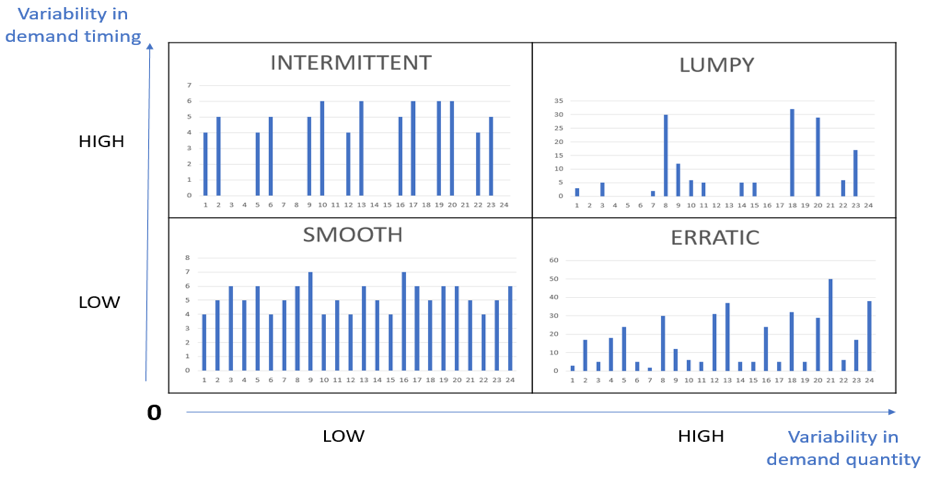![image.png]( )

Based on these 2 dimensions, the literature classifies the demand profiles into 4 different categories:

- Smooth demand (ADI < 1.32 and CV² < 0.49). The demand is very regular in time and in quantity. It is therefore easy to forecast and you won’t have trouble reaching a low forecasting error level.
- Intermittent demand (ADI >= 1.32 and CV² < 0.49). The demand history shows very little variation in demand quantity but a high variation in the interval between two demands. Though specific forecasting methods tackle intermittent demands, the forecast error margin is considerably higher.
- Erratic demand (ADI < 1.32 and CV² >= 0.49). The demand has regular occurrences in time with high quantity variations. Your forecast accuracy remains shaky.
- Lumpy demand (ADI >= 1.32 and CV² >= 0.49). The demand is characterized by a large variation in quantity and in time. It is actually impossible to produce a reliable forecast, no matter which forecasting tools you use. This particular type of demand pattern is unforecastable.

https://frepple.com/blog/demand-classification/

In [ ]:
# Define the conditions
conditions = [
    (df_trans_grpby['ADI'] < 1.32) & (df_trans_grpby['CV_sqr'] < 0.49),  # Smooth
    (df_trans_grpby['ADI'] >= 1.32) & (df_trans_grpby['CV_sqr'] < 0.49),  # Intermittent
    (df_trans_grpby['ADI'] < 1.32) & (df_trans_grpby['CV_sqr'] >= 0.49),  # Erratic
    (df_trans_grpby['ADI'] >= 1.32) & (df_trans_grpby['CV_sqr'] >= 0.49)   # Lumpy
]

# Define the corresponding labels
labels = ['Smooth', 'Intermittent', 'Erratic', 'Lumpy']

# Create the new column 'demand_profile'
df_trans_grpby['demand_pattern'] = np.select(conditions, labels, default='Unknown')
df_trans_grpby

PRODUCT_ID  total_demand_buckets  period_min  period_max  QUANTITY_avg  \
0           25671                     3         157         410           2.0   
1           26081                     1         250         250           1.0   
2           26093                     1         458         458           1.0   
3           26190                     1         238         238           1.0   
4           26355                     1         242         242           2.0   
...           ...                   ...         ...         ...           ...   
92010    18293142                     1         710         710           1.0   
92011    18293439                     1         702         702           1.0   
92012    18293696                     1         709         709           1.0   
92013    18294080                     1         711         711           1.0   
92014    18316298                     1         710         710           1.0   

       QUANTITY_sd        ADI  CV_sqr demand_pattern  
0         1.732051  84.666667    0.75          Lumpy  
1              NaN   1.000000    0.00         Smooth  
2              NaN   1.000000    0.00         Smooth  
3              NaN   1.000000    0.00         Smooth  
4              NaN   1.000000    0.00         Smooth  
...            ...        ...     ...            ...  
92010          NaN   1.000000    0.00         Smooth  
92011          NaN   1.000000    0.00         Smooth  
92012          NaN   1.000000    0.00         Smooth  
92013          NaN   1.000000    0.00         Smooth  
92014          NaN   1.000000    0.00         Smooth  

[92015 rows x 9 columns]

In [ ]:
# Create scatter plot with Plotly
fig = px.scatter(
    df_trans_grpby,
    x='CV_sqr',
    y='ADI',
    color='demand_pattern',
    hover_data={'PRODUCT_ID': True},
    labels={'CV_sqr': 'CV Squared', 'ADI': 'ADI'},
    title='Scatter Plot of ADI vs CV Squared by Demand Pattern'
)

# Add reference lines
fig.add_vline(x=0.49, line_dash="dash", line_color="red", annotation_text="X=0.49")
fig.add_hline(y=1.32, line_dash="dash", line_color="blue", annotation_text="Y=1.32")

# Update layout for better visibility
fig.update_layout(
    xaxis_title='CV Squared',
    yaxis_title='ADI',
    legend_title='Demand Pattern',
    plot_bgcolor='white'
)

# Show plot
fig.show()

In [ ]:
df_trans_grpby.groupby(['demand_pattern']).agg(
    PRODUCT_ID_count=('PRODUCT_ID', 'count')
).sort_values(by='demand_pattern').reset_index()

demand_pattern  PRODUCT_ID_count
0        Erratic               103
1   Intermittent             54232
2          Lumpy              3741
3         Smooth             33939

In [ ]:
103+54232+3741+33939

92015

###Result

In [ ]:
df_prod_demandpattern = df_trans_grpby.copy()[['PRODUCT_ID', 'ADI',	'CV_sqr', 'demand_pattern']]
df_prod_demandpattern

PRODUCT_ID        ADI  CV_sqr demand_pattern
0           25671  84.666667    0.75          Lumpy
1           26081   1.000000    0.00         Smooth
2           26093   1.000000    0.00         Smooth
3           26190   1.000000    0.00         Smooth
4           26355   1.000000    0.00         Smooth
...           ...        ...     ...            ...
92010    18293142   1.000000    0.00         Smooth
92011    18293439   1.000000    0.00         Smooth
92012    18293696   1.000000    0.00         Smooth
92013    18294080   1.000000    0.00         Smooth
92014    18316298   1.000000    0.00         Smooth

[92015 rows x 4 columns]

## df_product

In [ ]:
df_product = pd.read_csv('/content/Dataset/dunnhumby_The-Complete-Journey CSV/product.csv', delimiter=",")
df_product

PRODUCT_ID  MANUFACTURER    DEPARTMENT     BRAND  \
0           25671             2       GROCERY  National   
1           26081             2  MISC. TRANS.  National   
2           26093            69        PASTRY   Private   
3           26190            69       GROCERY   Private   
4           26355            69       GROCERY   Private   
...           ...           ...           ...       ...   
92348    18293142          6384       DRUG GM  National   
92349    18293439          6393       DRUG GM  National   
92350    18293696          6406       DRUG GM  National   
92351    18294080          6442       DRUG GM  National   
92352    18316298           764       GROCERY  National   

                 COMMODITY_DESC           SUB_COMMODITY_DESC  \
0                      FRZN ICE          ICE - CRUSHED/CUBED   
1      NO COMMODITY DESCRIPTION  NO SUBCOMMODITY DESCRIPTION   
2                         BREAD         BREAD:ITALIAN/FRENCH   
3          FRUIT - SHELF STABLE                  APPLE SAUCE   
4                 COOKIES/CONES            SPECIALTY COOKIES   
...                         ...                          ...   
92348                 BOOKSTORE              PAPERBACK BOOKS   
92349                 BOOKSTORE            CHILDRENS LOW END   
92350                 BOOKSTORE        PAPERBACK BEST SELLER   
92351                 BOOKSTORE              PAPERBACK BOOKS   
92352              PAPER TOWELS       PAPER TOWELS & HOLDERS   

      CURR_SIZE_OF_PRODUCT  
0                    22 LB  
1                           
2                           
3                    50 OZ  
4                    14 OZ  
...                    ...  
92348                       
92349                       
92350                       
92351                       
92352                       

[92353 rows x 7 columns]

####Explore data

In [ ]:
explore_df(df_product)

#Check shape
(92353, 7) 

#Check duplication
No duplicate rows found.

#Check missing value
No missing values found.

#Check data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB
None 


#Check unique value
PRODUCT_ID              92353
MANUFACTURER             6476
DEPARTMENT                 44
BRAND                       2
COMMODITY_DESC            308
SUB_COMMODITY_DESC       2383
CURR_SIZE_OF_PRODUCT     4345
dtype: int64 

#Lis

In [ ]:
deepexploredf(df_product,['PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'], [])

##Explore categorical data

-------- PRODUCT_ID --------
PRODUCT_ID
25671       1
7466993     1
7466983     1
7466980     1
7466977     1
           ..
1039630     1
1039627     1
1039612     1
1039600     1
18316298    1
Name: count, Length: 92353, dtype: int64

-------- MANUFACTURER --------
MANUFACTURER
69      12676
2        1411
5423     1376
764      1332
1407     1210
        ...  
4980        1
5452        1
4163        1
3707        1
2227        1
Name: count, Length: 6476, dtype: int64

-------- DEPARTMENT --------
DEPARTMENT
GROCERY            39021
DRUG GM            31529
PRODUCE             3118
COSMETICS           3011
NUTRITION           2914
MEAT                2544
MEAT-PCKGD          2427
DELI                2354
PASTRY              2149
FLORAL               938
SEAFOOD-PCKGD        563
MISC. TRANS.         490
SPIRITS              377
SEAFOOD              369
GARDEN CENTER        128
RESTAURANT           102
MISC SALES TRAN       88
SALAD BAR             48
COUP/ST

#####Finding
There are only 92353 PRODUCT_ID in df_product compared to 92015 PRODUCT_ID in df_transaction_data, infering that some data in df_product will not be used in actual transaction. Thus eliminating some PRODUCT_ID might reduce process of data cleaning.

#####Explore PRODUCT_ID in df_fact_transaction_data vs. df_dim_product

In [ ]:
product_in_df_transaction_data = df_transaction_data[['PRODUCT_ID']].copy().drop_duplicates()
product_in_df_transaction_data

PRODUCT_ID
0            825123
1            831447
2            840361
3            845307
4            852014
...             ...
2581110     9803639
2581114    17328953
2581197    16099957
2581207    17899041
2581208    17901162

[92015 rows x 1 columns]

### Join table btw df_product & df_prod_demandpattern

####df_dim_product_master

In [ ]:
df_dim_product_master = df_product.merge(df_prod_demandpattern, on='PRODUCT_ID', how='inner')
df_dim_product_master.drop_duplicates(inplace=True)
df_dim_product_master

PRODUCT_ID  MANUFACTURER    DEPARTMENT     BRAND  \
0           25671             2       GROCERY  National   
1           26081             2  MISC. TRANS.  National   
2           26093            69        PASTRY   Private   
3           26190            69       GROCERY   Private   
4           26355            69       GROCERY   Private   
...           ...           ...           ...       ...   
92010    18293142          6384       DRUG GM  National   
92011    18293439          6393       DRUG GM  National   
92012    18293696          6406       DRUG GM  National   
92013    18294080          6442       DRUG GM  National   
92014    18316298           764       GROCERY  National   

                 COMMODITY_DESC           SUB_COMMODITY_DESC  \
0                      FRZN ICE          ICE - CRUSHED/CUBED   
1      NO COMMODITY DESCRIPTION  NO SUBCOMMODITY DESCRIPTION   
2                         BREAD         BREAD:ITALIAN/FRENCH   
3          FRUIT - SHELF STABLE                  APPLE SAUCE   
4                 COOKIES/CONES            SPECIALTY COOKIES   
...                         ...                          ...   
92010                 BOOKSTORE              PAPERBACK BOOKS   
92011                 BOOKSTORE            CHILDRENS LOW END   
92012                 BOOKSTORE        PAPERBACK BEST SELLER   
92013                 BOOKSTORE              PAPERBACK BOOKS   
92014              PAPER TOWELS       PAPER TOWELS & HOLDERS   

      CURR_SIZE_OF_PRODUCT        ADI  CV_sqr demand_pattern  
0                    22 LB  84.666667    0.75          Lumpy  
1                            1.000000    0.00         Smooth  
2                            1.000000    0.00         Smooth  
3                    50 OZ   1.000000    0.00         Smooth  
4                    14 OZ   1.000000    0.00         Smooth  
...                    ...        ...     ...            ...  
92010                        1.000000    0.00         Smooth  
92011                        1.000000    0.00         Smooth  
92012                        1.000000    0.00         Smooth  
92013                        1.000000    0.00         Smooth  
92014                        1.000000    0.00         Smooth  

[92015 rows x 10 columns]

####Handling missing values

From deep exploration of data, it was found that there are some missing values with coerce (space bar) but are not significantly large amount. Then it will be handled in the following part.

#####Identify null values as ' '

In [ ]:
col_with_coerce = ['DEPARTMENT', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT']

In [ ]:
for i in col_with_coerce:
  df_dim_product_master[i] = df_dim_product_master[i].replace({' ': pd.NA, '': pd.NA})

In [ ]:
explore_df(df_dim_product_master)

#Check shape
(92015, 10) 

#Check duplication
No duplicate rows found.

#Check missing value
Missing values found: 30392

Number of missing values:
 PRODUCT_ID                  0
MANUFACTURER                0
DEPARTMENT                  0
BRAND                       0
COMMODITY_DESC              0
SUB_COMMODITY_DESC          0
CURR_SIZE_OF_PRODUCT    30392
ADI                         0
CV_sqr                      0
demand_pattern              0
dtype: int64

Percentage of missing values:
 PRODUCT_ID               0.000000
MANUFACTURER             0.000000
DEPARTMENT               0.000000
BRAND                    0.000000
COMMODITY_DESC           0.000000
SUB_COMMODITY_DESC       0.000000
CURR_SIZE_OF_PRODUCT    33.029397
ADI                      0.000000
CV_sqr                   0.000000
demand_pattern           0.000000
dtype: float64

#Check data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92015 entries, 0 to 92014
Data columns (total 10 columns):
 #   Column             

#####Handling null values

In [ ]:
df_dim_product_master[df_dim_product_master['DEPARTMENT'].isnull()]

Empty DataFrame
Columns: [PRODUCT_ID, MANUFACTURER, DEPARTMENT, BRAND, COMMODITY_DESC, SUB_COMMODITY_DESC, CURR_SIZE_OF_PRODUCT, ADI, CV_sqr, demand_pattern]
Index: []

######Finding:
All product having null value for department were not sold in transaction over 2-year period.

In [ ]:
df_dim_product_master['DEPARTMENT'] = df_dim_product_master['DEPARTMENT'].fillna('UNKNOWN DEPARTMENT')
df_dim_product_master['COMMODITY_DESC'] = df_dim_product_master['COMMODITY_DESC'].fillna('NO COMMODITY DESCRIPTION')
df_dim_product_master['SUB_COMMODITY_DESC'] = df_dim_product_master['SUB_COMMODITY_DESC'].fillna('NO SUB_COMMODITY_DESC DESCRIPTION')
df_dim_product_master['CURR_SIZE_OF_PRODUCT'] = df_dim_product_master['CURR_SIZE_OF_PRODUCT'].fillna('NO SIZE DESCRIPTION')
df_dim_product_master['demand_pattern'] = df_dim_product_master['demand_pattern'].fillna('Unknown')

Clean data in SUB_COMMIDITY_DESC

In [ ]:
# Remove the '*' character from the SUB_COMMODITY_DESC column
df_dim_product_master['SUB_COMMODITY_DESC'] = df_dim_product_master['SUB_COMMODITY_DESC'].str.replace('*', '', regex=False)

In [ ]:
df_dim_product_master['SUB_COMMODITY_DESC'].sort_values().unique()

array(['20 BIKES', '4-20 BOYS TEAM SPORT', 'ABRASIVES', ..., 'YOGURT',
       'YOGURT MULTI-PACKS', 'YOGURT NOT MULTI-PACKS'], dtype=object)

## Feature engineering

####'MAIN_PRODUCT_CATEGORY'

Based on the observation, the field DEPARTMENT having 41 classes is too much in detail on categorizing product. Thus, the new field 'MAIN_PRODUCT_CATEGORY' is added by consolidating the department of each product based on their similarities or logical groupings.

In [ ]:
print(list(df_dim_product_master['DEPARTMENT'].sort_values().unique()))

['AUTOMOTIVE', 'CHARITABLE CONT', 'CHEF SHOPPE', 'CNTRL/STORE SUP', 'COSMETICS', 'COUP/STR & MFG', 'DAIRY DELI', 'DELI', 'DELI/SNACK BAR', 'DRUG GM', 'ELECT &PLUMBING', 'FLORAL', 'FROZEN GROCERY', 'GARDEN CENTER', 'GM MERCH EXP', 'GRO BAKERY', 'GROCERY', 'HBC', 'HOUSEWARES', 'KIOSK-GAS', 'MEAT', 'MEAT-PCKGD', 'MEAT-WHSE', 'MISC SALES TRAN', 'MISC. TRANS.', 'NUTRITION', 'PASTRY', 'PHARMACY SUPPLY', 'PHOTO', 'PORK', 'POSTAL CENTER', 'PROD-WHS SALES', 'PRODUCE', 'RESTAURANT', 'RX', 'SALAD BAR', 'SEAFOOD', 'SEAFOOD-PCKGD', 'SPIRITS', 'TOYS', 'TRAVEL & LEISUR', 'VIDEO', 'VIDEO RENTAL']


In [ ]:
category_mapping = {
    'Food & Beverages': [
        'GROCERY', 'PRODUCE', 'DELI', 'PASTRY', 'MEAT', 'MEAT-PCKGD', 'SEAFOOD', 'SEAFOOD-PCKGD',
        'FROZEN GROCERY', 'SALAD BAR', 'DAIRY DELI', 'CHEF SHOPPE', 'GRO BAKERY', 'PORK', 'MEAT-WHSE',
        'DELI/SNACK BAR', 'SPIRITS', 'NUTRITION', 'RESTAURANT','TRAVEL & LEISUR', 'POSTAL CENTER'
    ],
    'Health & Beauty': [
         'DRUG GM', 'COSMETICS', 'RX', 'PHARMACY SUPPLY', 'HBC'
    ],
    'Media & Entertainment': [
        'PHOTO', 'VIDEO RENTAL', 'VIDEO'
    ],
    'Other': [
        'MISC. TRANS.', 'MISC SALES TRAN','UNKNOWN DEPARTMENT'
    ],
    'Travel & Services': [
         'KIOSK-GAS', 'AUTOMOTIVE'
    ],
    'Household & Garden': [
        'HOUSEWARES', 'FLORAL', 'GARDEN CENTER'
    ],
    'Marketing & Merchandise': [
        'GM MERCH EXP', 'TOYS', 'PROD-WHS SALES', 'CNTRL/STORE SUP', 'COUP/STR & MFG', 'CHARITABLE CONT', 'ELECT &PLUMBING'
    ]
}
category_mapping = dict_k2v_v2k(category_mapping)
category_mapping

{'GROCERY': 'Food & Beverages',
 'PRODUCE': 'Food & Beverages',
 'DELI': 'Food & Beverages',
 'PASTRY': 'Food & Beverages',
 'MEAT': 'Food & Beverages',
 'MEAT-PCKGD': 'Food & Beverages',
 'SEAFOOD': 'Food & Beverages',
 'SEAFOOD-PCKGD': 'Food & Beverages',
 'FROZEN GROCERY': 'Food & Beverages',
 'SALAD BAR': 'Food & Beverages',
 'DAIRY DELI': 'Food & Beverages',
 'CHEF SHOPPE': 'Food & Beverages',
 'GRO BAKERY': 'Food & Beverages',
 'PORK': 'Food & Beverages',
 'MEAT-WHSE': 'Food & Beverages',
 'DELI/SNACK BAR': 'Food & Beverages',
 'SPIRITS': 'Food & Beverages',
 'NUTRITION': 'Food & Beverages',
 'RESTAURANT': 'Food & Beverages',
 'TRAVEL & LEISUR': 'Food & Beverages',
 'POSTAL CENTER': 'Food & Beverages',
 'DRUG GM': 'Health & Beauty',
 'COSMETICS': 'Health & Beauty',
 'RX': 'Health & Beauty',
 'PHARMACY SUPPLY': 'Health & Beauty',
 'HBC': 'Health & Beauty',
 'PHOTO': 'Media & Entertainment',
 'VIDEO RENTAL': 'Media & Entertainment',
 'VIDEO': 'Media & Entertainment',
 'MISC. TRANS.

In [ ]:
df_dim_product_master[df_dim_product_master['DEPARTMENT'] == 'ELECT &PLUMBING']

PRODUCT_ID  MANUFACTURER       DEPARTMENT     BRAND COMMODITY_DESC  \
3215      312652           764  ELECT &PLUMBING  National         COUPON   

     SUB_COMMODITY_DESC CURR_SIZE_OF_PRODUCT  ADI  CV_sqr demand_pattern  
3215          DONATIONS  NO SIZE DESCRIPTION  1.0     0.0         Smooth

In [ ]:
df_dim_product_master['MAIN_PRODUCT_CATEGORY'] = df_dim_product_master['DEPARTMENT'].map(category_mapping)
df_dim_product_master

PRODUCT_ID  MANUFACTURER    DEPARTMENT     BRAND  \
0           25671             2       GROCERY  National   
1           26081             2  MISC. TRANS.  National   
2           26093            69        PASTRY   Private   
3           26190            69       GROCERY   Private   
4           26355            69       GROCERY   Private   
...           ...           ...           ...       ...   
92010    18293142          6384       DRUG GM  National   
92011    18293439          6393       DRUG GM  National   
92012    18293696          6406       DRUG GM  National   
92013    18294080          6442       DRUG GM  National   
92014    18316298           764       GROCERY  National   

                 COMMODITY_DESC           SUB_COMMODITY_DESC  \
0                      FRZN ICE          ICE - CRUSHED/CUBED   
1      NO COMMODITY DESCRIPTION  NO SUBCOMMODITY DESCRIPTION   
2                         BREAD         BREAD:ITALIAN/FRENCH   
3          FRUIT - SHELF STABLE                  APPLE SAUCE   
4                 COOKIES/CONES            SPECIALTY COOKIES   
...                         ...                          ...   
92010                 BOOKSTORE              PAPERBACK BOOKS   
92011                 BOOKSTORE            CHILDRENS LOW END   
92012                 BOOKSTORE        PAPERBACK BEST SELLER   
92013                 BOOKSTORE              PAPERBACK BOOKS   
92014              PAPER TOWELS       PAPER TOWELS & HOLDERS   

      CURR_SIZE_OF_PRODUCT        ADI  CV_sqr demand_pattern  \
0                    22 LB  84.666667    0.75          Lumpy   
1      NO SIZE DESCRIPTION   1.000000    0.00         Smooth   
2      NO SIZE DESCRIPTION   1.000000    0.00         Smooth   
3                    50 OZ   1.000000    0.00         Smooth   
4                    14 OZ   1.000000    0.00         Smooth   
...                    ...        ...     ...            ...   
92010  NO SIZE DESCRIPTION   1.000000    0.00         Smooth   
92011  NO SIZE DESCRIPTION   1.000000    0.00         Smooth   
92012  NO SIZE DESCRIPTION   1.000000    0.00         Smooth   
92013  NO SIZE DESCRIPTION   1.000000    0.00         Smooth   
92014  NO SIZE DESCRIPTION   1.000000    0.00         Smooth   

      MAIN_PRODUCT_CATEGORY  
0          Food & Beverages  
1                     Other  
2          Food & Beverages  
3          Food & Beverages  
4          Food & Beverages  
...                     ...  
92010       Health & Beauty  
92011       Health & Beauty  
92012       Health & Beauty  
92013       Health & Beauty  
92014      Food & Beverages  

[92015 rows x 11 columns]

In [ ]:
pandasql.sqldf('''
  SELECT DISTINCT MAIN_PRODUCT_CATEGORY,COUNT(PRODUCT_ID)
  FROM df_dim_product_master
  GROUP BY MAIN_PRODUCT_CATEGORY
  ORDER BY MAIN_PRODUCT_CATEGORY
''')

MAIN_PRODUCT_CATEGORY  COUNT(PRODUCT_ID)
0         Food & Beverages              55973
1          Health & Beauty              34364
2       Household & Garden               1045
3  Marketing & Merchandise                 53
4    Media & Entertainment                  7
5                    Other                555
6        Travel & Services                 18

In [ ]:
print(pandasql.sqldf('''
  SELECT *
  FROM df_dim_product_master
  WHERE MAIN_PRODUCT_CATEGORY IS NULL
''').to_markdown())

| PRODUCT_ID   | MANUFACTURER   | DEPARTMENT   | BRAND   | COMMODITY_DESC   | SUB_COMMODITY_DESC   | CURR_SIZE_OF_PRODUCT   | ADI   | CV_sqr   | demand_pattern   | MAIN_PRODUCT_CATEGORY   |
|--------------|----------------|--------------|---------|------------------|----------------------|------------------------|-------|----------|------------------|-------------------------|


### 'DEPARTMENT_FULLNAME'

In [ ]:
department_fullname = {
    'AUTOMOTIVE': 'Automotive products and accessories',
    'CHARITABLE CONT': 'Charitable contributions and donations',
    'CHEF SHOPPE': 'Specialty cooking and kitchen items',
    'CNTRL/STORE SUP': 'Central and store supplies for operational needs',
    'COSMETICS': 'Beauty and personal care products',
    'COUP/STR & MFG': 'Coupons, store promotions, and manufacturing-related items',
    'DAIRY DELI': 'Dairy products and deli items',
    'DELI': 'Deli meats, cheeses, and prepared foods',
    'DELI/SNACK BAR': 'Deli items and snack bar products',
    'DRUG GM': 'General pharmacy and over-the-counter medications',
    'ELECT &PLUMBING': 'Electrical supplies and plumbing materials',
    'FLORAL': 'Flowers and floral arrangements',
    'FROZEN GROCERY': 'Frozen food items, including frozen meals and vegetables',
    'GARDEN CENTER': 'Garden supplies, plants, and outdoor items',
    'GM MERCH EXP': 'General merchandise expenditures',
    'GRO BAKERY': 'Bakery items, including bread and baked goods',
    'GROCERY': 'General food and grocery items, including staples and packaged goods',
    'HBC': 'Health and beauty care items',
    'HOUSEWARES': 'Household items and kitchenware',
    'KIOSK-GAS': 'Gasoline and kiosk services',
    'MEAT': 'Fresh meat products',
    'MEAT-PCKGD': 'Packaged meat products',
    'MEAT-WHSE': 'Wholesale meat products',
    'MISC SALES TRAN': 'Miscellaneous sales transactions',
    'MISC. TRANS.': 'Miscellaneous transactions not categorized elsewhere',
    'NUTRITION': 'Nutritional supplements and health-related products',
    'PASTRY': 'Baked goods and pastries',
    'PHARMACY SUPPLY': 'Pharmacy supplies and medical products',
    'PHOTO': 'Photography services and products',
    'PORK': 'Pork products and cuts',
    'POSTAL CENTER': 'Postal services and related products',
    'PROD-WHS SALES': 'Product warehouse sales and inventory',
    'PRODUCE': 'Fresh fruits and vegetables',
    'RESTAURANT': 'Dining and restaurant services',
    'RX': 'Prescription medications',
    'SALAD BAR': 'Prepared salads and salad ingredients',
    'SEAFOOD': 'Fresh seafood and fish',
    'SEAFOOD-PCKGD': 'Packaged seafood products',
    'SPIRITS': 'Alcoholic beverages and spirits',
    'TOYS': 'Toys and games for children and collectors',
    'TRAVEL & LEISUR': 'Travel-related items and leisure products',
    'UNKNOWN DEPARTMENT': 'Department with an unknown or unspecified category',
    'VIDEO': 'Video products, including DVDs and digital media',
    'VIDEO RENTAL': 'Rental services for videos and movies'
}


In [ ]:
df_dim_product_master['DEPARTMENT_FULLNAME'] = df_dim_product_master['DEPARTMENT'].map(department_fullname)
col_list_order = ['PRODUCT_ID', 'MANUFACTURER', 'BRAND','MAIN_PRODUCT_CATEGORY',
                  'DEPARTMENT', 'DEPARTMENT_FULLNAME',  'COMMODITY_DESC',
                  'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT',
                  'ADI', 'CV_sqr', 'demand_pattern']
df_dim_product_master = df_dim_product_master[col_list_order]
df_dim_product_master

PRODUCT_ID  MANUFACTURER     BRAND MAIN_PRODUCT_CATEGORY    DEPARTMENT  \
0           25671             2  National      Food & Beverages       GROCERY   
1           26081             2  National                 Other  MISC. TRANS.   
2           26093            69   Private      Food & Beverages        PASTRY   
3           26190            69   Private      Food & Beverages       GROCERY   
4           26355            69   Private      Food & Beverages       GROCERY   
...           ...           ...       ...                   ...           ...   
92010    18293142          6384  National       Health & Beauty       DRUG GM   
92011    18293439          6393  National       Health & Beauty       DRUG GM   
92012    18293696          6406  National       Health & Beauty       DRUG GM   
92013    18294080          6442  National       Health & Beauty       DRUG GM   
92014    18316298           764  National      Food & Beverages       GROCERY   

                                     DEPARTMENT_FULLNAME  \
0      General food and grocery items, including stap...   
1      Miscellaneous transactions not categorized els...   
2                               Baked goods and pastries   
3      General food and grocery items, including stap...   
4      General food and grocery items, including stap...   
...                                                  ...   
92010  General pharmacy and over-the-counter medications   
92011  General pharmacy and over-the-counter medications   
92012  General pharmacy and over-the-counter medications   
92013  General pharmacy and over-the-counter medications   
92014  General food and grocery items, including stap...   

                 COMMODITY_DESC           SUB_COMMODITY_DESC  \
0                      FRZN ICE          ICE - CRUSHED/CUBED   
1      NO COMMODITY DESCRIPTION  NO SUBCOMMODITY DESCRIPTION   
2                         BREAD         BREAD:ITALIAN/FRENCH   
3          FRUIT - SHELF STABLE                  APPLE SAUCE   
4                 COOKIES/CONES            SPECIALTY COOKIES   
...                         ...                          ...   
92010                 BOOKSTORE              PAPERBACK BOOKS   
92011                 BOOKSTORE            CHILDRENS LOW END   
92012                 BOOKSTORE        PAPERBACK BEST SELLER   
92013                 BOOKSTORE              PAPERBACK BOOKS   
92014              PAPER TOWELS       PAPER TOWELS & HOLDERS   

      CURR_SIZE_OF_PRODUCT        ADI  CV_sqr demand_pattern  
0                    22 LB  84.666667    0.75          Lumpy  
1      NO SIZE DESCRIPTION   1.000000    0.00         Smooth  
2      NO SIZE DESCRIPTION   1.000000    0.00         Smooth  
3                    50 OZ   1.000000    0.00         Smooth  
4                    14 OZ   1.000000    0.00         Smooth  
...                    ...        ...     ...            ...  
92010  NO SIZE DESCRIPTION   1.000000    0.00         Smooth  
92011  NO SIZE DESCRIPTION   1.000000    0.00         Smooth  
92012  NO SIZE DESCRIPTION   1.000000    0.00         Smooth  
92013  NO SIZE DESCRIPTION   1.000000    0.00         Smooth  
92014  NO SIZE DESCRIPTION   1.000000    0.00         Smooth  

[92015 rows x 12 columns]

## Export

In [ ]:
export_to_csv(path_folder,'dim_product_master',df_dim_product_master)

dim_product_master.csv has been exported successfully.


#6) dim_casual_data

###df_casual_data

In [ ]:
df_casual_data = pd.read_csv('/content/Dataset/dunnhumby_The-Complete-Journey CSV/causal_data.csv', delimiter=",")
df_casual_data

PRODUCT_ID  STORE_ID  WEEK_NO display mailer
0              26190       286       70       0      A
1              26190       288       70       0      A
2              26190       289       70       0      A
3              26190       292       70       0      A
4              26190       293       70       0      A
...              ...       ...      ...     ...    ...
36786519    18203921       439      100       1      0
36786520    18203921       439      101       1      0
36786521    18243471       415      101       3      0
36786522    18243476       415      101       3      0
36786523    18244453       345      101       7      0

[36786524 rows x 5 columns]

In [ ]:
explore_df(df_casual_data)

#Check shape
(36786524, 5) 

#Check duplication
No duplicate rows found.

#Check missing value
No missing values found.

#Check data type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36786524 entries, 0 to 36786523
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   PRODUCT_ID  int64 
 1   STORE_ID    int64 
 2   WEEK_NO     int64 
 3   display     object
 4   mailer      object
dtypes: int64(3), object(2)
memory usage: 1.4+ GB
None 


#Check unique value
PRODUCT_ID    68377
STORE_ID        115
WEEK_NO          93
display          10
mailer           11
dtype: int64 

#List of column name:
 ['PRODUCT_ID', 'STORE_ID', 'WEEK_NO', 'display', 'mailer']


In [ ]:
deepexploredf(df_casual_data,['PRODUCT_ID', 'STORE_ID', 'WEEK_NO', 'display', 'mailer'], [])

##Explore categorical data

-------- PRODUCT_ID --------
PRODUCT_ID
1330973     7083
661300      7083
1622371     7083
2588411     7083
2017356     7083
            ... 
9880717        1
1067239        1
941052         1
1067391        1
18244453       1
Name: count, Length: 68377, dtype: int64

-------- STORE_ID --------
STORE_ID
369      469670
420      444806
335      408820
315      399410
448      398734
          ...  
415       72689
34280     62480
34037     16785
440        3193
411        1200
Name: count, Length: 115, dtype: int64

-------- WEEK_NO --------
WEEK_NO
63     589575
77     574668
68     564037
94     562207
16     542902
        ...  
65     334160
19     324302
101    320720
36     311556
88     308952
Name: count, Length: 93, dtype: int64

-------- display --------
display
0    21038745
9     2699467
5     2575289
7     2362118
3     2073738
6     1816021
2     1812840
1     1102141
A      713180
4      592985
Name: count, dtype: int64

-------- mailer -------